# Synthetic Test
Given a synthetic signal called 'my_data', the folder `custom_data` should contain two files:
1. `custom_data/my_data.csv` for the timeseries
2. `custom_data/my_data_truth.csv` for the anomalies.

The following example showcases `my_data = synthetic_5`

In [21]:
from time import time
from tqdm import tqdm 
import site
import sys
import pandas as pd 
import numpy as np
import ast 
import matplotlib.pyplot as plt
import glob
import ast

site.addsitedir('Orion/')
site.addsitedir('MLPrimitives/')
site.addsitedir('mSSA/')


from orion.benchmark import benchmark, _summarize_results_datasets
from Orion.orion.evaluation import CONTEXTUAL_METRICS as METRICS
from Orion.orion.evaluation import contextual_confusion_matrix
from functools import partial

def _summarize_results_datasets_category(df):
    """ Summarize the result of benchmark.

    The table is summarized for  the number of anomalies detected, and
    the average f1 score acheived by that pipeline across datasets.
    """
    def return_cm(x):
        if isinstance(x, int):
            return (0, 0, 0)

        elif len(x) > 3:
            return x[1:]

        return x



#     df['status'] = df['status'].apply(get_status)
    df['confusion_matrix'] = [str(x) for x in df['confusion_matrix'] ]
    df['confusion_matrix'] = df['confusion_matrix'].apply(ast.literal_eval)
    df['confusion_matrix'] = df['confusion_matrix'].apply(return_cm)
    df[['fp', 'fn', 'tp']] = pd.DataFrame(df['confusion_matrix'].tolist(), index=df.index)

    # calculate f1 score
    df_ = df.groupby(['dataset', 'pipeline','category'])[['fp', 'fn', 'tp']].sum().reset_index()

    precision = df_['tp'] / (df_['tp'] + df_['fp'])
    recall = df_['tp'] / (df_['tp'] + df_['fn'])
    df_['f1'] = 2 * (precision * recall) / (precision + recall + 1e-10)
    return df_


In [2]:
if ('accuracy' in METRICS): del METRICS['accuracy']
METRICS['confusion_matrix'] = contextual_confusion_matrix
metrics = {k: partial(fun, weighted=False) for k, fun in METRICS.items()}

def make_hyperparams(datasets, rank):
    hyperparams = {}
    rank_dict = {"mssa": {"orion.primitives.mssa.mSSATAD#1": {"rank": rank}}}
    for k in datasets:
        hyperparams[k] = rank_dict
    return hyperparams




['synthetic_highrank_h11_2',
 'synthetic_highrank_h4_6',
 'synthetic_lowrank_h14_6',
 'synthetic_lowrank_h1_1',
 'synthetic_highrank_h13_0',
 'synthetic_highrank_h6_4',
 'synthetic_lowrank_h3_3',
 'synthetic_lowrank_h5_5',
 'synthetic_lowrank_h10_2',
 'synthetic_lowrank_h9_8',
 'synthetic_highrank_h2_0',
 'synthetic_lowrank_h12_0',
 'synthetic_lowrank_h7_7',
 'synthetic_lowrank_h7_6',
 'synthetic_lowrank_h12_1',
 'synthetic_highrank_h2_1',
 'synthetic_lowrank_h9_9',
 'synthetic_lowrank_h10_3',
 'synthetic_lowrank_h5_4',
 'synthetic_lowrank_h3_2',
 'synthetic_highrank_h6_5',
 'synthetic_highrank_h13_1',
 'synthetic_lowrank_h1_0',
 'synthetic_lowrank_h14_7',
 'synthetic_highrank_h4_7',
 'synthetic_highrank_h11_3',
 'synthetic_highrank_h11_1',
 'synthetic_highrank_h4_5',
 'synthetic_lowrank_h14_5',
 'synthetic_lowrank_h1_2',
 'synthetic_highrank_h8_8',
 'synthetic_highrank_h13_3',
 'synthetic_highrank_h6_7',
 'synthetic_lowrank_h3_0',
 'synthetic_lowrank_h5_6',
 'synthetic_lowrank_h10_1',

Starting dataset custom with 281 signals..
HYPERPARAMS {'orion.primitives.mssa.mSSATAD#1': {'rank': 2}}
Scoring pipeline mssa on signal synthetic_highrank_h11_2 (test split: False)


2
281
{'custom': ['synthetic_highrank_h11_2', 'synthetic_highrank_h4_6', 'synthetic_lowrank_h14_6', 'synthetic_lowrank_h1_1', 'synthetic_highrank_h13_0', 'synthetic_highrank_h6_4', 'synthetic_lowrank_h3_3', 'synthetic_lowrank_h5_5', 'synthetic_lowrank_h10_2', 'synthetic_lowrank_h9_8', 'synthetic_highrank_h2_0', 'synthetic_lowrank_h12_0', 'synthetic_lowrank_h7_7', 'synthetic_lowrank_h7_6', 'synthetic_lowrank_h12_1', 'synthetic_highrank_h2_1', 'synthetic_lowrank_h9_9', 'synthetic_lowrank_h10_3', 'synthetic_lowrank_h5_4', 'synthetic_lowrank_h3_2', 'synthetic_highrank_h6_5', 'synthetic_highrank_h13_1', 'synthetic_lowrank_h1_0', 'synthetic_lowrank_h14_7', 'synthetic_highrank_h4_7', 'synthetic_highrank_h11_3', 'synthetic_highrank_h11_1', 'synthetic_highrank_h4_5', 'synthetic_lowrank_h14_5', 'synthetic_lowrank_h1_2', 'synthetic_highrank_h8_8', 'synthetic_highrank_h13_3', 'synthetic_highrank_h6_7', 'synthetic_lowrank_h3_0', 'synthetic_lowrank_h5_6', 'synthetic_lowrank_h10_1', 'synthetic_highra

Scoring pipeline mssa on signal synthetic_highrank_h4_6 (test split: False)


TRUTH
   start   end
0    121   122
1   1596  1597
ANOMS
   start   end     score
0    335   435  0.239439
1   1867  1967  0.138133
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.073788
1             2 -0.118845
2             3  0.061635
3             4  0.038031
4             5  0.336268
...         ...       ...
2495       2496  0.130441
2496       2497  0.360522
2497       2498 -0.191155
2498       2499 -0.010236
2499       2500  0.037353

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.073788
1             2 -0.118845
2             3  0.061635
3             4  0.038031
4             5  0.336268
...         ...       ...
2495       2496  0.130441
2496       2497  0.360522
2497       2498 -0.191155
2498       2499 -0.010236
2499       2500  0.037353

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h14_6 (test split: False)


TRUTH
   start   end
0   1162  1163
1   1204  1205
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.186843
1             2  0.451468
2             3  0.827743
3             4  1.060459
4             5  2.113672
...         ...       ...
2495       2496 -3.689924
2496       2497 -4.729638
2497       2498 -4.963850
2498       2499 -5.315444
2499       2500 -5.950682

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.186843
1             2  0.451468
2             3  0.827743
3             4  1.060459
4             5  2.113672
...         ...       ...
2495       2496 -3.689924
2496       2497 -4.729638
2497       2498 -4.963850
2498       2499 -5.315444
2499       2500 -5.950682

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h1_1 (test split: False)


TRUTH
   start   end
0    806   807
1   1319  1320
2   1996  1997
3   2311  2312
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.032308
1             2 -0.028906
2             3 -0.065086
3             4  0.017078
4             5 -0.036108
...         ...       ...
2495       2496 -0.344716
2496       2497 -0.146806
2497       2498 -0.193544
2498       2499 -0.037929
2499       2500 -0.005110

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.032308
1             2 -0.028906
2             3 -0.065086
3             4  0.017078
4             5 -0.036108
...         ...       ...
2495       2496 -0.344716
2496       2497 -0.146806
2497       2498 -0.193544
2498       2499 -0.037929
2499       2500 -0.005110

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_highrank_h13_0 (test split: False)


TRUTH
   start   end
0   1966  1967
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.108222
1             2 -0.161376
2             3 -0.132402
3             4  0.157849
4             5 -0.150155
...         ...       ...
2495       2496 -0.314402
2496       2497 -0.403572
2497       2498 -0.104756
2498       2499  0.209437
2499       2500  0.049698

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.108222
1             2 -0.161376
2             3 -0.132402
3             4  0.157849
4             5 -0.150155
...         ...       ...
2495       2496 -0.314402
2496       2497 -0.403572
2497       2498 -0.104756
2498       2499  0.209437
2499       2500  0.049698

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_highrank_h6_4 (test split: False)


TRUTH
   start   end
0    845   846
1   2357  2358
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.004986
1             2  0.045439
2             3  0.368176
3             4 -0.165508
4             5 -0.072606
...         ...       ...
2495       2496 -0.429235
2496       2497  0.213321
2497       2498 -0.093932
2498       2499 -0.120524
2499       2500 -0.009706

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.004986
1             2  0.045439
2             3  0.368176
3             4 -0.165508
4             5 -0.072606
...         ...       ...
2495       2496 -0.429235
2496       2497  0.213321
2497       2498 -0.093932
2498       2499 -0.120524
2499       2500 -0.009706

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h3_3 (test split: False)


TRUTH
   start   end
0    409   410
1   1497  1498
2   1648  1649
3   1692  1693
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.544362
1             2  0.323705
2             3  0.219154
3             4  0.390150
4             5  1.139042
...         ...       ...
2495       2496 -0.368028
2496       2497 -0.749233
2497       2498 -0.872069
2498       2499 -0.993482
2499       2500 -0.890808

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.544362
1             2  0.323705
2             3  0.219154
3             4  0.390150
4             5  1.139042
...         ...       ...
2495       2496 -0.368028
2496       2497 -0.749233
2497       2498 -0.872069
2498       2499 -0.993482
2499       2500 -0.890808

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h5_5 (test split: False)


TRUTH
   start   end
0    419   420
1    430   431
2    561   562
3    576   577
4    909   910
5   2383  2384
ANOMS
   start  end     score
0    381  481  0.819612
SCORES:  {'f1': 0.49999999995, 'recall': 0.33333333332777776, 'precision': 0.99999999995, 'confusion_matrix': (None, 0, 4, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.123340
1             2  0.057733
2             3  0.417854
3             4  0.421724
4             5  0.259642
...         ...       ...
2495       2496  1.118985
2496       2497  1.192998
2497       2498  0.863036
2498       2499  1.475586
2499       2500  1.404722

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.123340
1             2  0.057733
2             3  0.417854
3             4  0.421724
4             5  0.259642
...         ...       ...
2495       2496  1.118985
2496       2497  1.192998
2497       2498  0.863036
2498       2499  1.475586
2499       2500  1.404722

[

Scoring pipeline mssa on signal synthetic_lowrank_h10_2 (test split: False)


TRUTH
   start   end
0    474   475
1    652   653
2   1241  1242
3   1352  1353
4   2001  2002
ANOMS
   start   end     score
0    603   703  8.762911
1   1249  1403  3.351754
SCORES:  {'f1': 0.5714285713714286, 'recall': 0.399999999992, 'precision': 0.99999999995, 'confusion_matrix': (None, 0, 3, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.011346
1             2  0.327196
2             3 -0.071165
3             4  0.269666
4             5  0.422419
...         ...       ...
2495       2496  0.280480
2496       2497  0.120943
2497       2498 -0.309325
2498       2499 -0.169643
2499       2500 -0.117030

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.011346
1             2  0.327196
2             3 -0.071165
3             4  0.269666
4             5  0.422419
...         ...       ...
2495       2496  0.280480
2496       2497  0.120943
2497       2498 -0.309325
2498       2499 -0.169643
2499       2500 

Scoring pipeline mssa on signal synthetic_lowrank_h9_8 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.247218
1             2  0.442494
2             3  1.482849
3             4  1.880547
4             5  2.263314
...         ...       ...
2495       2496 -0.420646
2496       2497  0.274586
2497       2498  0.214340
2498       2499  0.824947
2499       2500  1.285682

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.247218
1             2  0.442494
2             3  1.482849
3             4  1.880547
4             5  2.263314
...         ...       ...
2495       2496 -0.420646
2496       2497  0.274586
2497       2498  0.214340
2498       2499  0.824947
2499       2500  1.285682

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_highrank_h2_0 (test split: False)


TRUTH
   start   end
0    999  1000
1   1124  1125
2   1269  1270
3   1559  1560
4   2084  2085
5   2380  2381
ANOMS
   start  end     score
0    252  452  0.308883
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.321941
1             2  0.127662
2             3 -0.260057
3             4 -0.197697
4             5  0.055224
...         ...       ...
2495       2496  0.013378
2496       2497 -0.124211
2497       2498 -0.001198
2498       2499 -0.566882
2499       2500 -0.086797

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.321941
1             2  0.127662
2             3 -0.260057
3             4 -0.197697
4             5  0.055224
...         ...       ...
2495       2496  0.013378
2496       2497 -0.124211
2497       2498 -0.001198
2498       2499 -0.566882
2499       2500 -0.086797

[2500 rows x 2 columns]
no split
no s

Scoring pipeline mssa on signal synthetic_lowrank_h12_0 (test split: False)


TRUTH
   start  end
0    143  144
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.010330
1             2 -0.820928
2             3 -0.850253
3             4 -1.472295
4             5 -1.806522
...         ...       ...
2495       2496 -0.568348
2496       2497 -1.245313
2497       2498 -0.768066
2498       2499 -0.637691
2499       2500 -0.715227

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.010330
1             2 -0.820928
2             3 -0.850253
3             4 -1.472295
4             5 -1.806522
...         ...       ...
2495       2496 -0.568348
2496       2497 -1.245313
2497       2498 -0.768066
2498       2499 -0.637691
2499       2500 -0.715227

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h7_7 (test split: False)


TRUTH
   start   end
0   1139  1140
1   1376  1377
ANOMS
   start   end     score
0   1434  1541  0.719376
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.073916
1             2 -0.399344
2             3 -1.057264
3             4 -1.340031
4             5 -2.420294
...         ...       ...
2495       2496  2.193659
2496       2497  2.847340
2497       2498  3.253171
2498       2499  3.367835
2499       2500  3.917333

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.073916
1             2 -0.399344
2             3 -1.057264
3             4 -1.340031
4             5 -2.420294
...         ...       ...
2495       2496  2.193659
2496       2497  2.847340
2497       2498  3.253171
2498       2499  3.367835
2499       2500  3.917333

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h7_6 (test split: False)


TRUTH
   start   end
0   1008  1009
1   1126  1127
2   1452  1453
3   1881  1882
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.400685
1             2  0.086183
2             3  0.086548
3             4 -0.086465
4             5  0.186148
...         ...       ...
2495       2496  0.756386
2496       2497  0.247903
2497       2498 -0.835930
2498       2499 -1.172421
2499       2500 -1.712797

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.400685
1             2  0.086183
2             3  0.086548
3             4 -0.086465
4             5  0.186148
...         ...       ...
2495       2496  0.756386
2496       2497  0.247903
2497       2498 -0.835930
2498       2499 -1.172421
2499       2500 -1.712797

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h12_1 (test split: False)


TRUTH
   start   end
0   1331  1332
1   2443  2444
ANOMS
   start   end     score
0   1400  1500  0.106033
1   2394  2494  0.525762
SCORES:  {'f1': 0.499999999925, 'recall': 0.499999999975, 'precision': 0.499999999975, 'confusion_matrix': (None, 1, 1, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.231650
1             2  0.829777
2             3  1.875454
3             4  2.928613
4             5  3.060312
...         ...       ...
2495       2496  1.120105
2496       2497  2.117218
2497       2498  2.353865
2498       2499  2.867935
2499       2500  3.624145

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.231650
1             2  0.829777
2             3  1.875454
3             4  2.928613
4             5  3.060312
...         ...       ...
2495       2496  1.120105
2496       2497  2.117218
2497       2498  2.353865
2498       2499  2.867935
2499       2500  3.624145

[2500 rows x 2 columns]
no split
no s

Scoring pipeline mssa on signal synthetic_highrank_h2_1 (test split: False)


TRUTH
   start  end
0    509  510
1    520  521
ANOMS
   start   end     score
0   1800  1900  0.121837
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.111888
1             2  0.361019
2             3 -0.281356
3             4  0.156753
4             5 -0.642997
...         ...       ...
2495       2496  0.167219
2496       2497  0.035807
2497       2498  0.086597
2498       2499 -0.200603
2499       2500  0.104452

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.111888
1             2  0.361019
2             3 -0.281356
3             4  0.156753
4             5 -0.642997
...         ...       ...
2495       2496  0.167219
2496       2497  0.035807
2497       2498  0.086597
2498       2499 -0.200603
2499       2500  0.104452

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h9_9 (test split: False)


TRUTH
   start   end
0   1076  1077
1   1230  1231
2   1458  1459
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.122527
1             2  0.371403
2             3  0.612258
3             4  0.920222
4             5  1.221537
...         ...       ...
2495       2496 -0.324481
2496       2497 -0.407727
2497       2498 -0.695358
2498       2499 -1.478584
2499       2500 -1.916679

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.122527
1             2  0.371403
2             3  0.612258
3             4  0.920222
4             5  1.221537
...         ...       ...
2495       2496 -0.324481
2496       2497 -0.407727
2497       2498 -0.695358
2498       2499 -1.478584
2499       2500 -1.916679

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h10_3 (test split: False)


TRUTH
   start  end
0    808  809
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.253418
1             2 -0.170314
2             3 -0.358117
3             4 -0.397246
4             5 -0.893764
...         ...       ...
2495       2496  1.983656
2496       2497  1.623128
2497       2498  1.130951
2498       2499  0.890411
2499       2500  1.085308

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.253418
1             2 -0.170314
2             3 -0.358117
3             4 -0.397246
4             5 -0.893764
...         ...       ...
2495       2496  1.983656
2496       2497  1.623128
2497       2498  1.130951
2498       2499  0.890411
2499       2500  1.085308

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h5_4 (test split: False)


TRUTH
   start   end
0    239   240
1   1661  1662
ANOMS
   start   end    score
0   1247  1400  0.47201
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.203304
1             2  0.374705
2             3  0.659736
3             4  0.490330
4             5  0.824704
...         ...       ...
2495       2496  1.623345
2496       2497  2.118915
2497       2498  2.170810
2498       2499  2.196226
2499       2500  1.866352

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.203304
1             2  0.374705
2             3  0.659736
3             4  0.490330
4             5  0.824704
...         ...       ...
2495       2496  1.623345
2496       2497  2.118915
2497       2498  2.170810
2498       2499  2.196226
2499       2500  1.866352

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_lowrank_h3_2 (test split: False)


TRUTH
   start   end
0    306   307
1   2295  2296
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.479785
1             2  0.558043
2             3  1.111244
3             4  1.712356
4             5  2.399128
...         ...       ...
2495       2496  2.585496
2496       2497  2.027294
2497       2498  0.879147
2498       2499  0.719562
2499       2500 -0.076117

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.479785
1             2  0.558043
2             3  1.111244
3             4  1.712356
4             5  2.399128
...         ...       ...
2495       2496  2.585496
2496       2497  2.027294
2497       2498  0.879147
2498       2499  0.719562
2499       2500 -0.076117

[2500 rows x 2 columns]
no split
no split


Scoring pipeline mssa on signal synthetic_highrank_h6_5 (test split: False)


TRUTH
   start   end
0   1165  1166
1   1924  1925
2   2110  2111
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.526722
1             2 -0.141364
2             3 -0.337824
3             4 -0.180656
4             5 -0.347404
...         ...       ...
2495       2496  0.608367
2496       2497 -0.496786
2497       2498 -0.147156
2498       2499 -0.055827
2499       2500  0.011797

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.526722
1             2 -0.141364
2             3 -0.337824
3             4 -0.180656
4             5 -0.347404
...         ...       ...
2495       2496  0.608367
2496       2497 -0.496786
2497       2498 -0.147156
2498       2499 -0.055827
2499       2500  0.011797

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h13_1 (test split: False)


TRUTH
   start   end
0    736   737
1   1145  1146
2   1675  1676
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.102211
1             2 -0.103398
2             3 -0.168586
3             4 -0.229174
4             5 -0.400992
...         ...       ...
2495       2496 -0.600899
2496       2497 -0.152762
2497       2498 -0.453858
2498       2499  0.074431
2499       2500 -0.144966

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.102211
1             2 -0.103398
2             3 -0.168586
3             4 -0.229174
4             5 -0.400992
...         ...       ...
2495       2496 -0.600899
2496       2497 -0.152762
2497       2498 -0.453858
2498       2499  0.074431
2499       2500 -0.144966

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h1_0 (test split: False)


TRUTH
   start  end
0    273  274
1    753  754
2    951  952
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.117202
1             2 -0.130352
2             3 -0.162329
3             4 -0.149754
4             5 -0.684932
...         ...       ...
2495       2496  1.021675
2496       2497  0.926204
2497       2498  0.431897
2498       2499  0.232287
2499       2500  0.978475

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.117202
1             2 -0.130352
2             3 -0.162329
3             4 -0.149754
4             5 -0.684932
...         ...       ...
2495       2496  1.021675
2496       2497  0.926204
2497       2498  0.431897
2498       2499  0.232287
2499       2500  0.978475

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h14_7 (test split: False)


TRUTH
   start   end
0   1390  1391
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.029819
1             2 -0.702301
2             3 -0.752980
3             4 -0.512516
4             5 -0.431717
...         ...       ...
2495       2496  1.237732
2496       2497  0.947494
2497       2498  1.179184
2498       2499  1.169650
2499       2500  1.049701

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.029819
1             2 -0.702301
2             3 -0.752980
3             4 -0.512516
4             5 -0.431717
...         ...       ...
2495       2496  1.237732
2496       2497  0.947494
2497       2498  1.179184
2498       2499  1.169650
2499       2500  1.049701

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h4_7 (test split: False)


TRUTH
   start   end
0    470   471
1    656   657
2   1424  1425
3   1649  1650
4   1845  1846
5   2023  2024
6   2068  2069
7   2074  2075
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 8, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.206654
1             2 -0.259656
2             3  0.210790
3             4  0.086987
4             5 -0.404797
...         ...       ...
2495       2496 -0.368009
2496       2497  0.259946
2497       2498 -0.022807
2498       2499  0.078566
2499       2500 -0.211746

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.206654
1             2 -0.259656
2             3  0.210790
3             4  0.086987
4             5 -0.404797
...         ...       ...
2495       2496 -0.368009
2496       2497  0.259946
2497       2498 -0.022807
2498       2499  0.078566
2499       2500 -0.211746



/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h11_3 (test split: False)


TRUTH
   start   end
0   2098  2099
1   2353  2354
ANOMS
   start   end     score
0   1285  1385  0.497868
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.037653
1             2 -0.141197
2             3 -0.121152
3             4 -0.260343
4             5 -0.338495
...         ...       ...
2495       2496 -0.250817
2496       2497 -0.146784
2497       2498  0.026752
2498       2499 -0.344687
2499       2500  0.117527

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.037653
1             2 -0.141197
2             3 -0.121152
3             4 -0.260343
4             5 -0.338495
...         ...       ...
2495       2496 -0.250817
2496       2497 -0.146784
2497       2498  0.026752
2498       2499 -0.344687
2499       2500  0.117527

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h11_1 (test split: False)


TRUTH
   start   end
0     66    67
1    618   619
2   1256  1257
3   1378  1379
4   1739  1740
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.447219
1             2 -0.149181
2             3 -0.258057
3             4 -0.508109
4             5 -0.034740
...         ...       ...
2495       2496  0.026192
2496       2497  0.068360
2497       2498 -0.202935
2498       2499 -0.294203
2499       2500  0.067519

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.447219
1             2 -0.149181
2             3 -0.258057
3             4 -0.508109
4             5 -0.034740
...         ...       ...
2495       2496  0.026192
2496       2497  0.068360
2497       2498 -0.202935
2498       2499 -0.294203
2499       2500  0.067519

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h4_5 (test split: False)


TRUTH
   start  end
0     88   89
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.402818
1             2  0.259516
2             3  0.109432
3             4  0.374908
4             5  0.228404
...         ...       ...
2495       2496 -0.211369
2496       2497 -0.084401
2497       2498 -0.015826
2498       2499 -0.022865
2499       2500  0.334324

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.402818
1             2  0.259516
2             3  0.109432
3             4  0.374908
4             5  0.228404
...         ...       ...
2495       2496 -0.211369
2496       2497 -0.084401
2497       2498 -0.015826
2498       2499 -0.022865
2499       2500  0.334324

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h14_5 (test split: False)


TRUTH
   start   end
0     13    14
1   1251  1252
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.296626
1             2  0.058639
2             3 -0.148972
3             4 -0.137947
4             5  0.035451
...         ...       ...
2495       2496  0.755705
2496       2497  1.713758
2497       2498  2.499031
2498       2499  3.224345
2499       2500  4.156016

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.296626
1             2  0.058639
2             3 -0.148972
3             4 -0.137947
4             5  0.035451
...         ...       ...
2495       2496  0.755705
2496       2497  1.713758
2497       2498  2.499031
2498       2499  3.224345
2499       2500  4.156016

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h1_2 (test split: False)


TRUTH
   start   end
0    320   321
1    524   525
2    961   962
3   2175  2176
ANOMS
   start   end     score
0   1773  1879  0.184667
1   2122  2229  0.284651
SCORES:  {'f1': 0.33333333327777775, 'recall': 0.24999999999375, 'precision': 0.499999999975, 'confusion_matrix': (None, 1, 3, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.048689
1             2 -0.079386
2             3 -0.323143
3             4 -0.212592
4             5 -0.249132
...         ...       ...
2495       2496  0.480138
2496       2497  0.412297
2497       2498  0.059942
2498       2499  0.002624
2499       2500 -0.032695

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.048689
1             2 -0.079386
2             3 -0.323143
3             4 -0.212592
4             5 -0.249132
...         ...       ...
2495       2496  0.480138
2496       2497  0.412297
2497       2498  0.059942
2498       2499  0.002624
2499       2500 -0.032695



/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h8_8 (test split: False)


TRUTH
   start   end
0     37    38
1    993   994
2   1170  1171
3   1756  1757
ANOMS
   start   end     score
0   1121  1221  3.246229
SCORES:  {'f1': 0.39999999995200003, 'recall': 0.24999999999375, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 3, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.140580
1             2  0.080013
2             3  0.028230
3             4  0.014870
4             5  0.181268
...         ...       ...
2495       2496 -0.110265
2496       2497  0.382007
2497       2498 -0.006598
2498       2499 -0.140067
2499       2500 -0.198530

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.140580
1             2  0.080013
2             3  0.028230
3             4  0.014870
4             5  0.181268
...         ...       ...
2495       2496 -0.110265
2496       2497  0.382007
2497       2498 -0.006598
2498       2499 -0.140067
2499       2500 -0.198530

[2500 rows x 2 columns]
no 

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h13_3 (test split: False)


TRUTH
   start   end
0    230   231
1   1928  1929
2   1973  1974
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.369067
1             2 -0.066249
2             3 -0.211001
3             4  0.393487
4             5  0.275153
...         ...       ...
2495       2496 -0.578363
2496       2497 -0.539841
2497       2498 -0.738505
2498       2499  0.008651
2499       2500 -0.281878

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.369067
1             2 -0.066249
2             3 -0.211001
3             4  0.393487
4             5  0.275153
...         ...       ...
2495       2496 -0.578363
2496       2497 -0.539841
2497       2498 -0.738505
2498       2499  0.008651
2499       2500 -0.281878

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h6_7 (test split: False)


TRUTH
   start   end
0   1624  1625
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.193124
1             2 -0.193004
2             3 -0.099761
3             4  0.482533
4             5  0.325242
...         ...       ...
2495       2496  0.165600
2496       2497 -0.006613
2497       2498 -0.044168
2498       2499 -0.089531
2499       2500 -0.041748

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.193124
1             2 -0.193004
2             3 -0.099761
3             4  0.482533
4             5  0.325242
...         ...       ...
2495       2496  0.165600
2496       2497 -0.006613
2497       2498 -0.044168
2498       2499 -0.089531
2499       2500 -0.041748

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h3_0 (test split: False)


TRUTH
   start   end
0    224   225
1   1957  1958
2   2225  2226
3   2484  2485
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.101829
1             2  0.027712
2             3 -0.584980
3             4 -0.445176
4             5 -0.636354
...         ...       ...
2495       2496 -0.521654
2496       2497 -0.499104
2497       2498 -0.769347
2498       2499 -0.743761
2499       2500 -0.897049

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.101829
1             2  0.027712
2             3 -0.584980
3             4 -0.445176
4             5 -0.636354
...         ...       ...
2495       2496 -0.521654
2496       2497 -0.499104
2497       2498 -0.769347
2498       2499 -0.743761
2499       2500 -0.897049

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h5_6 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.168777
1             2  0.025021
2             3  0.388430
3             4  0.266511
4             5  0.676392
...         ...       ...
2495       2496 -4.204118
2496       2497 -3.616197
2497       2498 -3.247267
2498       2499 -3.189840
2499       2500 -2.515026

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.168777
1             2  0.025021
2             3  0.388430
3             4  0.266511
4             5  0.676392
...         ...       ...
2495       2496 -4.204118
2496       2497 -3.616197
2497       2498 -3.247267
2498       2499 -3.189840
2499       2500 -2.515026

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h10_1 (test split: False)


TRUTH
   start  end
0    101  102
1    762  763
ANOMS
   start   end     score
0   1999  2099  0.320176
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.188007
1             2  0.091780
2             3 -0.107860
3             4 -0.086817
4             5  0.079807
...         ...       ...
2495       2496  2.398060
2496       2497  2.516185
2497       2498  2.762800
2498       2499  2.718938
2499       2500  2.655704

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.188007
1             2  0.091780
2             3 -0.107860
3             4 -0.086817
4             5  0.079807
...         ...       ...
2495       2496  2.398060
2496       2497  2.516185
2497       2498  2.762800
2498       2499  2.718938
2499       2500  2.655704

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h2_3 (test split: False)


TRUTH
   start  end
0    592  593
ANOMS
   start   end     score
0    550   650  0.099563
1   1653  1753  0.155020
SCORES:  {'f1': 0.6666666665777777, 'recall': 0.9999999999, 'precision': 0.499999999975, 'confusion_matrix': (None, 1, 0, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.176026
1             2 -0.206133
2             3 -0.114275
3             4 -0.291258
4             5 -0.041440
...         ...       ...
2495       2496 -0.469645
2496       2497  0.203464
2497       2498  0.095297
2498       2499 -0.167457
2499       2500 -0.172757

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.176026
1             2 -0.206133
2             3 -0.114275
3             4 -0.291258
4             5 -0.041440
...         ...       ...
2495       2496 -0.469645
2496       2497  0.203464
2497       2498  0.095297
2498       2499 -0.167457
2499       2500 -0.172757

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h12_3 (test split: False)


TRUTH
   start   end
0    474   475
1   1337  1338
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.143357
1             2  0.113029
2             3  0.628989
3             4  1.104591
4             5  1.173431
...         ...       ...
2495       2496  0.875352
2496       2497  0.532212
2497       2498  0.468503
2498       2499  0.507950
2499       2500  0.468499

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.143357
1             2  0.113029
2             3  0.628989
3             4  1.104591
4             5  1.173431
...         ...       ...
2495       2496  0.875352
2496       2497  0.532212
2497       2498  0.468503
2498       2499  0.507950
2499       2500  0.468499

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h7_4 (test split: False)


TRUTH
   start   end
0    242   243
1   1102  1103
2   1817  1818
ANOMS
   start   end     score
0    850   950  0.249251
1   1351  1451  0.036964
2   1718  1900  0.681575
SCORES:  {'f1': 0.3333333332722222, 'recall': 0.3333333333222222, 'precision': 0.3333333333222222, 'confusion_matrix': (None, 2, 2, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.036037
1             2 -0.342214
2             3 -0.433237
3             4 -0.675887
4             5 -0.737760
...         ...       ...
2495       2496  2.341651
2496       2497  1.796727
2497       2498  1.103530
2498       2499  0.760864
2499       2500 -0.149434

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.036037
1             2 -0.342214
2             3 -0.433237
3             4 -0.675887
4             5 -0.737760
...         ...       ...
2495       2496  2.341651
2496       2497  1.796727
2497       2498  1.103530
2498       2499  0.760864
2499       2

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h7_5 (test split: False)


TRUTH
   start   end
0    596   597
1   1293  1294
2   2464  2465
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.173623
1             2 -0.515322
2             3  0.062645
3             4  0.134191
4             5  0.276385
...         ...       ...
2495       2496 -3.084972
2496       2497 -3.465538
2497       2498 -3.414112
2498       2499 -3.822330
2499       2500 -3.902233

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.173623
1             2 -0.515322
2             3  0.062645
3             4  0.134191
4             5  0.276385
...         ...       ...
2495       2496 -3.084972
2496       2497 -3.465538
2497       2498 -3.414112
2498       2499 -3.822330
2499       2500 -3.902233

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h12_2 (test split: False)


TRUTH
   start   end
0     51    52
1    170   171
2   1146  1147
ANOMS
   start  end     score
0     51  152  0.250198
SCORES:  {'f1': 0.4999999999375, 'recall': 0.3333333333222222, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 2, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.250283
1             2 -0.834111
2             3 -0.949802
3             4 -1.410945
4             5 -1.663672
...         ...       ...
2495       2496  0.678283
2496       2497  1.388388
2497       2498  1.449123
2498       2499  2.266649
2499       2500  2.430134

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.250283
1             2 -0.834111
2             3 -0.949802
3             4 -1.410945
4             5 -1.663672
...         ...       ...
2495       2496  0.678283
2496       2497  1.388388
2497       2498  1.449123
2498       2499  2.266649
2499       2500  2.430134

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h2_2 (test split: False)


TRUTH
   start   end
0    870   871
1   2230  2231
2   2385  2386
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.029696
1             2  0.099730
2             3 -0.287565
3             4 -0.313248
4             5  0.049510
...         ...       ...
2495       2496 -0.095693
2496       2497  0.076021
2497       2498  0.190915
2498       2499  0.003696
2499       2500 -0.046691

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.029696
1             2  0.099730
2             3 -0.287565
3             4 -0.313248
4             5  0.049510
...         ...       ...
2495       2496 -0.095693
2496       2497  0.076021
2497       2498  0.190915
2498       2499  0.003696
2499       2500 -0.046691

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h10_0 (test split: False)


TRUTH
   start   end
0    338   339
1    785   786
2   1104  1105
3   1232  1233
4   2046  2047
5   2262  2263
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.181184
1             2 -0.760663
2             3 -1.206925
3             4 -1.932152
4             5 -2.752318
...         ...       ...
2495       2496 -0.961980
2496       2497 -1.299308
2497       2498 -0.988148
2498       2499 -0.694782
2499       2500 -0.560335

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.181184
1             2 -0.760663
2             3 -1.206925
3             4 -1.932152
4             5 -2.752318
...         ...       ...
2495       2496 -0.961980
2496       2497 -1.299308
2497       2498 -0.988148
2498       2499 -0.694782
2499       2500 -0.560335

[2500 rows x 2 columns]
no spl

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h5_7 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.074248
1             2  0.196277
2             3  0.432872
3             4  0.930623
4             5  0.962079
...         ...       ...
2495       2496 -0.352909
2496       2497 -0.401024
2497       2498  0.088282
2498       2499  0.185425
2499       2500  0.976820

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.074248
1             2  0.196277
2             3  0.432872
3             4  0.930623
4             5  0.962079
...         ...       ...
2495       2496 -0.352909
2496       2497 -0.401024
2497       2498  0.088282
2498       2499  0.185425
2499       2500  0.976820

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h3_1 (test split: False)


TRUTH
   start   end
0   1257  1258
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.016343
1             2 -0.391046
2             3  0.333871
3             4 -0.127119
4             5  0.528774
...         ...       ...
2495       2496 -2.496483
2496       2497 -2.182151
2497       2498 -2.128333
2498       2499 -2.352267
2499       2500 -2.208635

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.016343
1             2 -0.391046
2             3  0.333871
3             4 -0.127119
4             5  0.528774
...         ...       ...
2495       2496 -2.496483
2496       2497 -2.182151
2497       2498 -2.128333
2498       2499 -2.352267
2499       2500 -2.208635

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h6_6 (test split: False)


TRUTH
   start   end
0    179   180
1    758   759
2   2199  2200
3   2295  2296
4   2413  2414
ANOMS
   start   end     score
0    130   230  1.284792
1   2148  2250  1.158285
SCORES:  {'f1': 0.5714285713714286, 'recall': 0.399999999992, 'precision': 0.99999999995, 'confusion_matrix': (None, 0, 3, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.247374
1             2  0.224220
2             3  0.073501
3             4  0.011329
4             5 -0.090540
...         ...       ...
2495       2496  0.057135
2496       2497  0.024853
2497       2498  0.189079
2498       2499  0.027862
2499       2500 -0.335959

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.247374
1             2  0.224220
2             3  0.073501
3             4  0.011329
4             5 -0.090540
...         ...       ...
2495       2496  0.057135
2496       2497  0.024853
2497       2498  0.189079
2498       2499  0.027862
2499       2500 

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h13_2 (test split: False)


TRUTH
   start   end
0      9    10
1    162   163
2    224   225
3    231   232
4    584   585
5   1821  1822
6   1854  1855
7   2339  2340
ANOMS
   start   end     score
0    976  1076  0.739883
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 8, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.007149
1             2 -0.094216
2             3  0.324461
3             4  0.155415
4             5  0.348531
...         ...       ...
2495       2496  0.133735
2496       2497  0.305317
2497       2498  0.083163
2498       2499  0.009006
2499       2500  0.057896

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.007149
1             2 -0.094216
2             3  0.324461
3             4  0.155415
4             5  0.348531
...         ...       ...
2495       2496  0.133735
2496       2497  0.305317
2497       2498  0.083163
2498       2499  0.009006
2499       2500  0.057896

[2500

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h8_9 (test split: False)


TRUTH
   start  end
0    251  252
1    353  354
ANOMS
   start   end     score
0    742   842  0.468605
1   1797  1897  0.308619
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.355792
1             2 -0.209976
2             3 -0.583672
3             4 -0.205993
4             5  0.144446
...         ...       ...
2495       2496 -0.056973
2496       2497  0.142809
2497       2498  0.167965
2498       2499 -0.093724
2499       2500 -0.051905

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.355792
1             2 -0.209976
2             3 -0.583672
3             4 -0.205993
4             5  0.144446
...         ...       ...
2495       2496 -0.056973
2496       2497  0.142809
2497       2498  0.167965
2498       2499 -0.093724
2499       2500 -0.051905

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h1_3 (test split: False)


TRUTH
   start   end
0     30    31
1    773   774
2    999  1000
3   1362  1363
4   1610  1611
5   1783  1784
6   2424  2425
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 7, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.150106
1             2 -0.139887
2             3 -0.544013
3             4 -0.403398
4             5 -0.648068
...         ...       ...
2495       2496 -0.601704
2496       2497 -0.278327
2497       2498 -0.602925
2498       2499 -0.235178
2499       2500  0.334547

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.150106
1             2 -0.139887
2             3 -0.544013
3             4 -0.403398
4             5 -0.648068
...         ...       ...
2495       2496 -0.601704
2496       2497 -0.278327
2497       2498 -0.602925
2498       2499 -0.235178
2499       2500  0.334547

[2500 rows x 2 

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h14_4 (test split: False)


TRUTH
   start   end
0    160   161
1    823   824
2    861   862
3   1564  1565
4   1640  1641
5   1870  1871
6   2337  2338
7   2345  2346
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 8, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.269004
1             2 -0.222813
2             3 -0.511904
3             4 -1.390668
4             5 -1.009759
...         ...       ...
2495       2496  2.010016
2496       2497  1.109397
2497       2498  0.453193
2498       2499 -0.205618
2499       2500 -1.197628

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.269004
1             2 -0.222813
2             3 -0.511904
3             4 -1.390668
4             5 -1.009759
...         ...       ...
2495       2496  2.010016
2496       2497  1.109397
2497       2498  0.453193
2498       2499 -0.205618
2499       2500 -1.197628



/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h4_4 (test split: False)


TRUTH
   start   end
0    722   723
1   1312  1313
ANOMS
   start  end    score
0    250  350  0.23057
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.089176
1             2 -0.207664
2             3  0.021074
3             4  0.088926
4             5 -0.524043
...         ...       ...
2495       2496 -0.105944
2496       2497 -0.100127
2497       2498 -0.198375
2498       2499  0.298207
2499       2500 -0.256132

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.089176
1             2 -0.207664
2             3  0.021074
3             4  0.088926
4             5 -0.524043
...         ...       ...
2495       2496 -0.105944
2496       2497 -0.100127
2497       2498 -0.198375
2498       2499  0.298207
2499       2500 -0.256132

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h11_0 (test split: False)


TRUTH
   start   end
0    396   397
1    441   442
2   1901  1902
ANOMS
   start   end     score
0    903  1055  0.175043
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.484245
1             2  0.162175
2             3  0.175337
3             4  0.045469
4             5  0.211285
...         ...       ...
2495       2496 -0.250177
2496       2497 -0.265360
2497       2498  0.097096
2498       2499  0.088797
2499       2500 -0.075082

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.484245
1             2  0.162175
2             3  0.175337
3             4  0.045469
4             5  0.211285
...         ...       ...
2495       2496 -0.250177
2496       2497 -0.265360
2497       2498  0.097096
2498       2499  0.088797
2499       2500 -0.075082

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h11_4 (test split: False)


TRUTH
   start   end
0     26    27
1    305   306
2    463   464
3   1779  1780
4   2063  2064
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.307528
1             2  0.043202
2             3 -0.164566
3             4 -0.068064
4             5 -0.077764
...         ...       ...
2495       2496  0.015577
2496       2497  0.165226
2497       2498 -0.041823
2498       2499  0.103272
2499       2500  0.149139

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.307528
1             2  0.043202
2             3 -0.164566
3             4 -0.068064
4             5 -0.077764
...         ...       ...
2495       2496  0.015577
2496       2497  0.165226
2497       2498 -0.041823
2498       2499  0.103272
2499       2500  0.149139

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h14_0 (test split: False)


TRUTH
   start   end
0   1349  1350
1   2482  2483
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.180077
1             2 -0.557067
2             3 -1.329017
3             4 -1.277346
4             5 -2.189035
...         ...       ...
2495       2496 -2.726589
2496       2497 -3.179450
2497       2498 -3.317909
2498       2499 -3.385169
2499       2500 -3.198364

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.180077
1             2 -0.557067
2             3 -1.329017
3             4 -1.277346
4             5 -2.189035
...         ...       ...
2495       2496 -2.726589
2496       2497 -3.179450
2497       2498 -3.317909
2498       2499 -3.385169
2499       2500 -3.198364

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h1_7 (test split: False)


TRUTH
   start   end
0    415   416
1    639   640
2   1508  1509
3   1626  1627
4   1884  1885
ANOMS
   start  end    score
0    590  690  1.85928
SCORES:  {'f1': 0.3333333332944444, 'recall': 0.199999999996, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 4, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.533037
1             2 -0.103859
2             3  0.209583
3             4 -0.103323
4             5 -0.152074
...         ...       ...
2495       2496  0.571062
2496       2497  0.404433
2497       2498  0.562854
2498       2499  0.379363
2499       2500  0.645206

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.533037
1             2 -0.103859
2             3  0.209583
3             4 -0.103323
4             5 -0.152074
...         ...       ...
2495       2496  0.571062
2496       2497  0.404433
2497       2498  0.562854
2498       2499  0.379363
2499       2500  0.645206

[2500 rows x 2 colu

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h4_0 (test split: False)


TRUTH
   start   end
0    249   250
1   1369  1370
2   2415  2416
ANOMS
   start   end     score
0   1320  1420  0.662592
SCORES:  {'f1': 0.4999999999375, 'recall': 0.3333333333222222, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 2, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.410299
1             2 -0.108149
2             3  0.374762
3             4 -0.292961
4             5  0.065309
...         ...       ...
2495       2496 -0.153991
2496       2497 -0.136300
2497       2498  0.031346
2498       2499 -0.020878
2499       2500 -0.322142

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.410299
1             2 -0.108149
2             3  0.374762
3             4 -0.292961
4             5  0.065309
...         ...       ...
2495       2496 -0.153991
2496       2497 -0.136300
2497       2498  0.031346
2498       2499 -0.020878
2499       2500 -0.322142

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h13_6 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
   start  end     score
0     40  140  0.985806
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.086482
1             2 -0.038121
2             3 -0.389284
3             4 -0.305817
4             5 -0.464004
...         ...       ...
2495       2496 -0.152341
2496       2497 -0.098280
2497       2498 -0.335168
2498       2499  0.017895
2499       2500 -0.207494

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.086482
1             2 -0.038121
2             3 -0.389284
3             4 -0.305817
4             5 -0.464004
...         ...       ...
2495       2496 -0.152341
2496       2497 -0.098280
2497       2498 -0.335168
2498       2499  0.017895
2499       2500 -0.207494

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h3_5 (test split: False)


TRUTH
   start   end
0   1328  1329
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.084754
1             2  0.712977
2             3  1.062327
3             4  2.033395
4             5  2.348426
...         ...       ...
2495       2496  3.570540
2496       2497  3.511265
2497       2498  2.519625
2498       2499  2.008014
2499       2500  1.340133

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.084754
1             2  0.712977
2             3  1.062327
3             4  2.033395
4             5  2.348426
...         ...       ...
2495       2496  3.570540
2496       2497  3.511265
2497       2498  2.519625
2498       2499  2.008014
2499       2500  1.340133

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h6_2 (test split: False)


TRUTH
   start   end
0   2105  2106
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.277234
1             2  0.027467
2             3  0.320320
3             4 -0.104366
4             5  0.128726
...         ...       ...
2495       2496  0.229015
2496       2497  0.124710
2497       2498  0.361819
2498       2499 -0.359554
2499       2500  0.091485

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.277234
1             2  0.027467
2             3  0.320320
3             4 -0.104366
4             5  0.128726
...         ...       ...
2495       2496  0.229015
2496       2497  0.124710
2497       2498  0.361819
2498       2499 -0.359554
2499       2500  0.091485

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h5_3 (test split: False)


TRUTH
   start   end
0   1057  1058
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.103908
1             2 -0.299655
2             3 -1.002986
3             4 -1.535886
4             5 -1.696056
...         ...       ...
2495       2496  2.483740
2496       2497  2.054717
2497       2498  1.366281
2498       2499  0.811860
2499       2500  0.698780

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.103908
1             2 -0.299655
2             3 -1.002986
3             4 -1.535886
4             5 -1.696056
...         ...       ...
2495       2496  2.483740
2496       2497  2.054717
2497       2498  1.366281
2498       2499  0.811860
2499       2500  0.698780

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h10_4 (test split: False)


TRUTH
   start   end
0   1430  1431
ANOMS
   start   end     score
0    798   900  0.094480
1   1147  1247  0.050331
2   1381  1481  5.443615
SCORES:  {'f1': 0.4999999999375, 'recall': 0.9999999999, 'precision': 0.3333333333222222, 'confusion_matrix': (None, 2, 0, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.356429
1             2 -0.364110
2             3 -0.313312
3             4 -0.438105
4             5 -0.670836
...         ...       ...
2495       2496  1.950350
2496       2497  3.410582
2497       2498  4.402296
2498       2499  5.243732
2499       2500  6.210719

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.356429
1             2 -0.364110
2             3 -0.313312
3             4 -0.438105
4             5 -0.670836
...         ...       ...
2495       2496  1.950350
2496       2497  3.410582
2497       2498  4.402296
2498       2499  5.243732
2499       2500  6.210719

[2500 rows x 2 columns]


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h12_6 (test split: False)


TRUTH
   start   end
0    224   225
1    919   920
2   1195  1196
3   1314  1315
4   2107  2108
5   2436  2437
6   2494  2495
ANOMS
   start   end     score
0    451   552  0.334224
1   1851  1952  0.840150
2   2052  2158  0.148227
3   2387  2487  0.085779
SCORES:  {'f1': 0.36363636358347107, 'recall': 0.2857142857102041, 'precision': 0.4999999999875, 'confusion_matrix': (None, 2, 5, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.037466
1             2 -0.070439
2             3 -0.129256
3             4 -0.208987
4             5 -0.105974
...         ...       ...
2495       2496  1.625088
2496       2497  1.194196
2497       2498  1.022938
2498       2499  0.390585
2499       2500  0.350373

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.037466
1             2 -0.070439
2             3 -0.129256
3             4 -0.208987
4             5 -0.105974
...         ...       ...
2495       2496  1.625088
2496   

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h7_1 (test split: False)


TRUTH
   start   end
0    965   966
1   1071  1072
2   1131  1132
3   1354  1355
4   2040  2041
5   2165  2166
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.026087
1             2 -0.277232
2             3 -0.750121
3             4 -0.788844
4             5 -0.945190
...         ...       ...
2495       2496 -0.168380
2496       2497 -0.015728
2497       2498 -0.445289
2498       2499 -0.060079
2499       2500  0.430170

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.026087
1             2 -0.277232
2             3 -0.750121
3             4 -0.788844
4             5 -0.945190
...         ...       ...
2495       2496 -0.168380
2496       2497 -0.015728
2497       2498 -0.445289
2498       2499 -0.060079
2499       2500  0.430170

[2500 rows x 2 columns]
no spl

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h2_6 (test split: False)


TRUTH
   start   end
0   1800  1801
1   2112  2113
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.167307
1             2  0.115948
2             3 -0.049738
3             4 -0.276410
4             5 -0.143194
...         ...       ...
2495       2496  0.018721
2496       2497  0.092342
2497       2498 -0.322562
2498       2499 -0.212325
2499       2500 -0.121113

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.167307
1             2  0.115948
2             3 -0.049738
3             4 -0.276410
4             5 -0.143194
...         ...       ...
2495       2496  0.018721
2496       2497  0.092342
2497       2498 -0.322562
2498       2499 -0.212325
2499       2500 -0.121113

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h2_7 (test split: False)


TRUTH
   start   end
0   1024  1025
1   2050  2051
2   2100  2101
3   2217  2218
ANOMS
   start  end     score
0     42  142  0.848323
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.399828
1             2  0.315053
2             3 -0.192156
3             4 -0.028244
4             5  0.062936
...         ...       ...
2495       2496 -0.008529
2496       2497 -0.068198
2497       2498  0.015160
2498       2499 -0.114380
2499       2500 -0.292669

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.399828
1             2  0.315053
2             3 -0.192156
3             4 -0.028244
4             5  0.062936
...         ...       ...
2495       2496 -0.008529
2496       2497 -0.068198
2497       2498  0.015160
2498       2499 -0.114380
2499       2500 -0.292669

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h7_0 (test split: False)


TRUTH
   start   end
0    682   683
1    890   891
2   1305  1306
3   1459  1460
ANOMS
   start  end     score
0    127  227  0.398487
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.176042
1             2 -0.480934
2             3 -1.395896
3             4 -1.964624
4             5 -2.245213
...         ...       ...
2495       2496  2.120530
2496       2497  1.319525
2497       2498  0.990201
2498       2499  0.380692
2499       2500 -0.377936

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.176042
1             2 -0.480934
2             3 -1.395896
3             4 -1.964624
4             5 -2.245213
...         ...       ...
2495       2496  2.120530
2496       2497  1.319525
2497       2498  0.990201
2498       2499  0.380692
2499       2500 -0.377936

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h12_7 (test split: False)


TRUTH
   start   end
0    846   847
1   1010  1011
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.177681
1             2  0.220286
2             3  1.010272
3             4  1.380028
4             5  1.588489
...         ...       ...
2495       2496  1.282944
2496       2497  1.271317
2497       2498  1.523353
2498       2499  1.612273
2499       2500  1.734219

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.177681
1             2  0.220286
2             3  1.010272
3             4  1.380028
4             5  1.588489
...         ...       ...
2495       2496  1.282944
2496       2497  1.271317
2497       2498  1.523353
2498       2499  1.612273
2499       2500  1.734219

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h10_5 (test split: False)


TRUTH
   start   end
0      8     9
1    456   457
2   2289  2290
ANOMS
   start   end     score
0      1    59  0.826651
1   2073  2198  0.517086
SCORES:  {'f1': 0.399999999936, 'recall': 0.3333333333222222, 'precision': 0.499999999975, 'confusion_matrix': (None, 1, 2, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.073513
1             2 -0.001478
2             3  0.559455
3             4  1.063834
4             5  1.156955
...         ...       ...
2495       2496  3.617206
2496       2497  3.435781
2497       2498  3.234526
2498       2499  3.186284
2499       2500  2.908063

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.073513
1             2 -0.001478
2             3  0.559455
3             4  1.063834
4             5  1.156955
...         ...       ...
2495       2496  3.617206
2496       2497  3.435781
2497       2498  3.234526
2498       2499  3.186284
2499       2500  2.908063

[2500 rows x 2 col

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h5_2 (test split: False)


TRUTH
   start   end
0    477   477
1    478   479
2   1565  1566
3   1718  1719
4   1922  1923
ANOMS
   start  end    score
0     48  250  0.39084
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.190227
1             2  0.281895
2             3  0.534838
3             4  0.715010
4             5  0.539811
...         ...       ...
2495       2496 -0.470038
2496       2497 -0.302529
2497       2498 -0.831663
2498       2499 -0.681555
2499       2500 -0.932060

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.190227
1             2  0.281895
2             3  0.534838
3             4  0.715010
4             5  0.539811
...         ...       ...
2495       2496 -0.470038
2496       2497 -0.302529
2497       2498 -0.831663
2498       2499 -0.681555
2499       2500 -0.932060

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h6_3 (test split: False)


TRUTH
   start   end
0    289   290
1   1922  1923
ANOMS
   start   end     score
0   2403  2500  0.411467
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.144996
1             2  0.189252
2             3  0.061553
3             4 -0.103225
4             5 -0.074365
...         ...       ...
2495       2496 -0.099149
2496       2497  0.248023
2497       2498  0.078202
2498       2499 -0.304045
2499       2500 -0.269618

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.144996
1             2  0.189252
2             3  0.061553
3             4 -0.103225
4             5 -0.074365
...         ...       ...
2495       2496 -0.099149
2496       2497  0.248023
2497       2498  0.078202
2498       2499 -0.304045
2499       2500 -0.269618

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h3_4 (test split: False)


TRUTH
   start   end
0    552   553
1    772   773
2   1921  1922
ANOMS
   start   end     score
0   1380  1480  0.649128
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.067444
1             2  0.338697
2             3  0.119982
3             4  0.232608
4             5 -0.263037
...         ...       ...
2495       2496  0.831364
2496       2497  1.513015
2497       2498  1.100450
2498       2499  0.823403
2499       2500  0.597140

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.067444
1             2  0.338697
2             3  0.119982
3             4  0.232608
4             5 -0.263037
...         ...       ...
2495       2496  0.831364
2496       2497  1.513015
2497       2498  1.100450
2498       2499  0.823403
2499       2500  0.597140

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h13_7 (test split: False)


TRUTH
   start   end
0   2070  2071
1   2248  2249
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.023037
1             2  0.000540
2             3 -0.197546
3             4  0.204852
4             5  0.003345
...         ...       ...
2495       2496 -0.301876
2496       2497 -0.034110
2497       2498 -0.242342
2498       2499 -0.183669
2499       2500 -0.046084

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.023037
1             2  0.000540
2             3 -0.197546
3             4  0.204852
4             5  0.003345
...         ...       ...
2495       2496 -0.301876
2496       2497 -0.034110
2497       2498 -0.242342
2498       2499 -0.183669
2499       2500 -0.046084

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h4_1 (test split: False)


TRUTH
   start   end
0   2356  2357
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.169460
1             2  0.012977
2             3 -0.281884
3             4 -0.265098
4             5  0.016816
...         ...       ...
2495       2496 -0.247709
2496       2497 -0.148860
2497       2498 -0.129876
2498       2499  0.150787
2499       2500  0.192119

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.169460
1             2  0.012977
2             3 -0.281884
3             4 -0.265098
4             5  0.016816
...         ...       ...
2495       2496 -0.247709
2496       2497 -0.148860
2497       2498 -0.129876
2498       2499  0.150787
2499       2500  0.192119

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h1_6 (test split: False)


TRUTH
   start   end
0    633   634
1   1531  1532
2   1681  1682
3   2183  2184
4   2299  2300
ANOMS
   start   end     score
0    244   344  0.497030
1    948  1048  0.488636
2   1949  2049  0.550911
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 3, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.313529
1             2 -0.023348
2             3  0.316684
3             4 -0.281075
4             5  0.396010
...         ...       ...
2495       2496  0.232459
2496       2497 -0.202194
2497       2498 -0.232741
2498       2499  0.277513
2499       2500  0.097937

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.313529
1             2 -0.023348
2             3  0.316684
3             4 -0.281075
4             5  0.396010
...         ...       ...
2495       2496  0.232459
2496       2497 -0.202194
2497       2498 -0.232741
2498       2499  0.277513
2499       2500  0.097937



/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h14_1 (test split: False)


TRUTH
   start   end
0    539   540
1   1582  1583
ANOMS
   start   end     score
0   1509  1633  2.863264
SCORES:  {'f1': 0.6666666665777777, 'recall': 0.499999999975, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 1, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.050546
1             2 -0.451178
2             3 -0.641092
3             4 -1.092317
4             5 -1.824324
...         ...       ...
2495       2496 -1.248135
2496       2497 -1.190128
2497       2498 -0.971731
2498       2499 -1.263277
2499       2500 -0.843219

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.050546
1             2 -0.451178
2             3 -0.641092
3             4 -1.092317
4             5 -1.824324
...         ...       ...
2495       2496 -1.248135
2496       2497 -1.190128
2497       2498 -0.971731
2498       2499 -1.263277
2499       2500 -0.843219

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h11_5 (test split: False)


TRUTH
   start   end
0    602   603
1   1713  1714
ANOMS
   start   end     score
0   1001  1105  0.894109
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.352962
1             2 -0.198758
2             3  0.490161
3             4  0.259989
4             5 -0.021937
...         ...       ...
2495       2496 -0.219853
2496       2497 -0.376254
2497       2498 -0.063215
2498       2499 -0.097312
2499       2500 -0.060427

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.352962
1             2 -0.198758
2             3  0.490161
3             4  0.259989
4             5 -0.021937
...         ...       ...
2495       2496 -0.219853
2496       2497 -0.376254
2497       2498 -0.063215
2498       2499 -0.097312
2499       2500 -0.060427

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h11_7 (test split: False)


TRUTH
   start   end
0    543   544
1    707   708
2   1441  1442
ANOMS
   start   end     score
0   1855  1991  0.424004
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.101339
1             2  0.070021
2             3  0.028959
3             4  0.030713
4             5 -0.196631
...         ...       ...
2495       2496 -0.323957
2496       2497  0.006725
2497       2498  0.054231
2498       2499 -0.261705
2499       2500 -0.539145

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.101339
1             2  0.070021
2             3  0.028959
3             4  0.030713
4             5 -0.196631
...         ...       ...
2495       2496 -0.323957
2496       2497  0.006725
2497       2498  0.054231
2498       2499 -0.261705
2499       2500 -0.539145

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h14_3 (test split: False)


TRUTH
   start   end
0   1357  1358
ANOMS
   start  end     score
0     93  193  0.461589
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.194094
1             2  0.889675
2             3  2.545178
3             4  3.524861
4             5  4.747266
...         ...       ...
2495       2496 -1.010029
2496       2497 -0.534354
2497       2498 -1.111661
2498       2499 -1.312260
2499       2500 -1.192863

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.194094
1             2  0.889675
2             3  2.545178
3             4  3.524861
4             5  4.747266
...         ...       ...
2495       2496 -1.010029
2496       2497 -0.534354
2497       2498 -1.111661
2498       2499 -1.312260
2499       2500 -1.192863

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h1_4 (test split: False)


TRUTH
   start   end
0   1825  1826
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.264376
1             2  0.066759
2             3 -0.023040
3             4  0.091206
4             5  0.120253
...         ...       ...
2495       2496 -0.040533
2496       2497 -0.349041
2497       2498 -0.158240
2498       2499 -0.243432
2499       2500  0.022602

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.264376
1             2  0.066759
2             3 -0.023040
3             4  0.091206
4             5  0.120253
...         ...       ...
2495       2496 -0.040533
2496       2497 -0.349041
2497       2498 -0.158240
2498       2499 -0.243432
2499       2500  0.022602

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h4_3 (test split: False)


TRUTH
   start   end
0   1292  1293
1   1844  1845
2   2019  2020
3   2086  2087
ANOMS
   start   end     score
0   1756  1895  3.483333
SCORES:  {'f1': 0.39999999995200003, 'recall': 0.24999999999375, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 3, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.186179
1             2 -0.066915
2             3  0.087261
3             4 -0.118751
4             5 -0.004704
...         ...       ...
2495       2496  0.227365
2496       2497 -0.197511
2497       2498 -0.284612
2498       2499 -0.691845
2499       2500  0.085961

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.186179
1             2 -0.066915
2             3  0.087261
3             4 -0.118751
4             5 -0.004704
...         ...       ...
2495       2496  0.227365
2496       2497 -0.197511
2497       2498 -0.284612
2498       2499 -0.691845
2499       2500  0.085961

[2500 rows x 2 columns]
no 

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h13_5 (test split: False)


TRUTH
   start   end
0    321   322
1   1517  1518
ANOMS
   start  end     score
0      1   79  0.453491
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.078098
1             2  0.061278
2             3 -0.049714
3             4 -0.235058
4             5 -0.015434
...         ...       ...
2495       2496  0.161812
2496       2497  0.543909
2497       2498  0.191099
2498       2499  0.026507
2499       2500  0.280734

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.078098
1             2  0.061278
2             3 -0.049714
3             4 -0.235058
4             5 -0.015434
...         ...       ...
2495       2496  0.161812
2496       2497  0.543909
2497       2498  0.191099
2498       2499  0.026507
2499       2500  0.280734

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h3_6 (test split: False)


TRUTH
   start   end
0    964   965
1   1334  1335
2   1709  1710
ANOMS
   start   end     score
0    959  1118  0.558081
SCORES:  {'f1': 0.4999999999375, 'recall': 0.3333333333222222, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 2, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.046644
1             2  0.148444
2             3  0.674024
3             4  0.735163
4             5  1.206136
...         ...       ...
2495       2496 -0.364770
2496       2497 -0.262866
2497       2498 -0.124165
2498       2499 -0.411531
2499       2500  0.078456

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.046644
1             2  0.148444
2             3  0.674024
3             4  0.735163
4             5  1.206136
...         ...       ...
2495       2496 -0.364770
2496       2497 -0.262866
2497       2498 -0.124165
2498       2499 -0.411531
2499       2500  0.078456

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h6_1 (test split: False)


TRUTH
   start   end
0    592   593
1   1252  1253
2   1384  1385
ANOMS
   start   end     score
0    543   643  8.912595
1   1203  1303  4.605210
2   1335  1435  0.701324
SCORES:  {'f1': 0.9999999999166667, 'recall': 0.9999999999666667, 'precision': 0.9999999999666667, 'confusion_matrix': (None, 0, 0, 3), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.174394
1             2 -0.020310
2             3 -0.148795
3             4  0.001484
4             5 -0.141112
...         ...       ...
2495       2496 -0.051222
2496       2497 -0.168967
2497       2498  0.155132
2498       2499 -0.162675
2499       2500  0.087467

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.174394
1             2 -0.020310
2             3 -0.148795
3             4  0.001484
4             5 -0.141112
...         ...       ...
2495       2496 -0.051222
2496       2497 -0.168967
2497       2498  0.155132
2498       2499 -0.162675
2499       2

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h5_0 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.336755
1             2 -0.533032
2             3 -1.657220
3             4 -1.934120
4             5 -3.103360
...         ...       ...
2495       2496  1.592925
2496       2497  2.230813
2497       2498  1.928697
2498       2499  2.553794
2499       2500  2.223860

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.336755
1             2 -0.533032
2             3 -1.657220
3             4 -1.934120
4             5 -3.103360
...         ...       ...
2495       2496  1.592925
2496       2497  2.230813
2497       2498  1.928697
2498       2499  2.553794
2499       2500  2.223860

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h10_7 (test split: False)


TRUTH
   start   end
0     41    42
1    201   202
2   2044  2045
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.115610
1             2  0.217407
2             3  0.904802
3             4  0.837012
4             5  1.020435
...         ...       ...
2495       2496 -0.269654
2496       2497  0.172430
2497       2498  0.434415
2498       2499  0.194441
2499       2500  0.462641

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.115610
1             2  0.217407
2             3  0.904802
3             4  0.837012
4             5  1.020435
...         ...       ...
2495       2496 -0.269654
2496       2497  0.172430
2497       2498  0.434415
2498       2499  0.194441
2499       2500  0.462641

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h12_5 (test split: False)


TRUTH
   start   end
0    270   271
1   1990  1991
2   2249  2250
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.070793
1             2 -1.038386
2             3 -1.744174
3             4 -2.790571
4             5 -3.233085
...         ...       ...
2495       2496 -0.358729
2496       2497  0.364792
2497       2498  1.008075
2498       2499  1.457134
2499       2500  2.026643

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.070793
1             2 -1.038386
2             3 -1.744174
3             4 -2.790571
4             5 -3.233085
...         ...       ...
2495       2496 -0.358729
2496       2497  0.364792
2497       2498  1.008075
2498       2499  1.457134
2499       2500  2.026643

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h7_2 (test split: False)


TRUTH
   start   end
0   1149  1150
1   2277  2278
ANOMS
   start   end     score
0   1498  1674  0.197145
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.038709
1             2  0.092702
2             3 -0.250352
3             4 -0.193478
4             5 -0.422466
...         ...       ...
2495       2496  0.211386
2496       2497  0.374951
2497       2498  0.571497
2498       2499  0.640113
2499       2500  0.990892

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.038709
1             2  0.092702
2             3 -0.250352
3             4 -0.193478
4             5 -0.422466
...         ...       ...
2495       2496  0.211386
2496       2497  0.374951
2497       2498  0.571497
2498       2499  0.640113
2499       2500  0.990892

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h2_5 (test split: False)


TRUTH
   start   end
0    363   364
1   1045  1046
ANOMS
   start   end     score
0   1749  1850  0.501586
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.172785
1             2 -0.186685
2             3 -0.276584
3             4 -0.042498
4             5 -0.234667
...         ...       ...
2495       2496  0.012141
2496       2497 -0.102645
2497       2498  0.120085
2498       2499  0.242734
2499       2500  0.179190

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.172785
1             2 -0.186685
2             3 -0.276584
3             4 -0.042498
4             5 -0.234667
...         ...       ...
2495       2496  0.012141
2496       2497 -0.102645
2497       2498  0.120085
2498       2499  0.242734
2499       2500  0.179190

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h2_4 (test split: False)


TRUTH
   start   end
0    127   128
1    716   717
2    859   860
3   1316  1317
4   1361  1362
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.105539
1             2 -0.061957
2             3  0.137192
3             4 -0.228866
4             5  0.225861
...         ...       ...
2495       2496 -0.133482
2496       2497  0.156147
2497       2498  0.028482
2498       2499 -0.154268
2499       2500  0.395642

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.105539
1             2 -0.061957
2             3  0.137192
3             4 -0.228866
4             5  0.225861
...         ...       ...
2495       2496 -0.133482
2496       2497  0.156147
2497       2498  0.028482
2498       2499 -0.154268
2499       2500  0.395642

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h7_3 (test split: False)


TRUTH
   start   end
0    591   592
1   1298  1299
2   1401  1402
3   1510  1511
4   1545  1546
5   2196  2197
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.301544
1             2 -0.080217
2             3 -0.414017
3             4 -0.667484
4             5 -0.887677
...         ...       ...
2495       2496  1.960532
2496       2497  2.175528
2497       2498  1.920188
2498       2499  1.737069
2499       2500  1.354733

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.301544
1             2 -0.080217
2             3 -0.414017
3             4 -0.667484
4             5 -0.887677
...         ...       ...
2495       2496  1.960532
2496       2497  2.175528
2497       2498  1.920188
2498       2499  1.737069
2499       2500  1.354733

[2500 rows x 2 columns]
no spl

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h12_4 (test split: False)


TRUTH
   start  end
0     48   49
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.214671
1             2 -0.479224
2             3 -0.407080
3             4 -0.953838
4             5 -0.951863
...         ...       ...
2495       2496  1.450617
2496       2497  1.241869
2497       2498  0.972694
2498       2499  0.140583
2499       2500 -0.786358

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.214671
1             2 -0.479224
2             3 -0.407080
3             4 -0.953838
4             5 -0.951863
...         ...       ...
2495       2496  1.450617
2496       2497  1.241869
2497       2498  0.972694
2498       2499  0.140583
2499       2500 -0.786358

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h10_6 (test split: False)


TRUTH
   start   end
0   1847  1848
1   2274  2275
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.126688
1             2  0.198398
2             3 -0.199834
3             4 -0.179058
4             5  0.014082
...         ...       ...
2495       2496  1.694096
2496       2497  1.917589
2497       2498  1.430926
2498       2499  1.438478
2499       2500  1.242074

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.126688
1             2  0.198398
2             3 -0.199834
3             4 -0.179058
4             5  0.014082
...         ...       ...
2495       2496  1.694096
2496       2497  1.917589
2497       2498  1.430926
2498       2499  1.438478
2499       2500  1.242074

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h5_1 (test split: False)


TRUTH
   start   end
0    640   641
1    805   806
2   1151  1152
3   1207  1208
ANOMS
   start  end     score
0    591  691  1.268895
SCORES:  {'f1': 0.39999999995200003, 'recall': 0.24999999999375, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 3, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.006896
1             2  0.450579
2             3  0.314816
3             4  0.398663
4             5  0.988859
...         ...       ...
2495       2496  0.890194
2496       2497  0.940844
2497       2498  0.876062
2498       2499  0.751249
2499       2500  0.763606

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.006896
1             2  0.450579
2             3  0.314816
3             4  0.398663
4             5  0.988859
...         ...       ...
2495       2496  0.890194
2496       2497  0.940844
2497       2498  0.876062
2498       2499  0.751249
2499       2500  0.763606

[2500 rows x 2 columns]
no sp

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h6_0 (test split: False)


TRUTH
   start   end
0   1164  1165
ANOMS
   start   end     score
0   1115  1215  8.299746
SCORES:  {'f1': 0.99999999985, 'recall': 0.9999999999, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 0, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.191675
1             2 -0.064302
2             3  0.215379
3             4  0.361281
4             5  0.124830
...         ...       ...
2495       2496 -0.222187
2496       2497 -0.055469
2497       2498 -0.263946
2498       2499 -0.222552
2499       2500 -0.723946

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.191675
1             2 -0.064302
2             3  0.215379
3             4  0.361281
4             5  0.124830
...         ...       ...
2495       2496 -0.222187
2496       2497 -0.055469
2497       2498 -0.263946
2498       2499 -0.222552
2499       2500 -0.723946

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h3_7 (test split: False)


TRUTH
   start   end
0   1812  1813
ANOMS
   start   end     score
0   2078  2178  0.545231
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.065804
1             2 -0.009961
2             3 -0.314695
3             4 -0.580847
4             5 -1.053723
...         ...       ...
2495       2496 -0.694663
2496       2497 -0.193755
2497       2498 -0.994160
2498       2499  0.084975
2499       2500  0.011301

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.065804
1             2 -0.009961
2             3 -0.314695
3             4 -0.580847
4             5 -1.053723
...         ...       ...
2495       2496 -0.694663
2496       2497 -0.193755
2497       2498 -0.994160
2498       2499  0.084975
2499       2500  0.011301

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h13_4 (test split: False)


TRUTH
   start   end
0    525   526
1    705   706
2    775   776
3   1055  1056
4   1355  1356
5   1588  1589
6   1679  1680
7   2002  2003
8   2024  2025
ANOMS
   start   end     score
0    476   576  0.200606
1    656   826  1.634599
2   1306  1406  0.589843
3   1539  1730  1.695509
4   1953  2075  4.617713
SCORES:  {'f1': 0.9411764705273357, 'recall': 0.8888888888790123, 'precision': 0.9999999999875, 'confusion_matrix': (None, 0, 1, 8), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.165010
1             2 -0.202470
2             3  0.278315
3             4  0.080276
4             5 -0.143302
...         ...       ...
2495       2496 -0.111354
2496       2497 -0.249002
2497       2498 -0.208900
2498       2499  0.035414
2499       2500  0.122235

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.165010
1             2 -0.202470
2             3  0.278315
3             4  0.080276
4             5 -0.143302
...  

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h4_2 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.087414
1             2 -0.089392
2             3 -0.035672
3             4 -0.348351
4             5  0.017582
...         ...       ...
2495       2496  0.391470
2496       2497 -0.318162
2497       2498  0.117893
2498       2499 -0.002729
2499       2500  0.133020

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.087414
1             2 -0.089392
2             3 -0.035672
3             4 -0.348351
4             5  0.017582
...         ...       ...
2495       2496  0.391470
2496       2497 -0.318162
2497       2498  0.117893
2498       2499 -0.002729
2499       2500  0.133020

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h1_5 (test split: False)


TRUTH
   start   end
0     90    91
1    429   430
2    828   829
3   2247  2248
4   2335  2336
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.279115
1             2  0.167845
2             3 -0.142896
3             4  0.348940
4             5  0.353017
...         ...       ...
2495       2496 -0.345286
2496       2497 -0.522420
2497       2498 -0.263856
2498       2499 -0.452854
2499       2500 -0.008347

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.279115
1             2  0.167845
2             3 -0.142896
3             4  0.348940
4             5  0.353017
...         ...       ...
2495       2496 -0.345286
2496       2497 -0.522420
2497       2498 -0.263856
2498       2499 -0.452854
2499       2500 -0.008347

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h14_2 (test split: False)


TRUTH
   start  end
0    161  162
ANOMS
   start  end     score
0    113  224  0.364814
SCORES:  {'f1': 0.99999999985, 'recall': 0.9999999999, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 0, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.192436
1             2  0.215153
2             3  0.706513
3             4  0.561012
4             5  0.597453
...         ...       ...
2495       2496  2.782147
2496       2497  2.455328
2497       2498  2.074793
2498       2499  1.619647
2499       2500  1.691707

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.192436
1             2  0.215153
2             3  0.706513
3             4  0.561012
4             5  0.597453
...         ...       ...
2495       2496  2.782147
2496       2497  2.455328
2497       2498  2.074793
2498       2499  1.619647
2499       2500  1.691707

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h11_6 (test split: False)


TRUTH
   start   end
0    109   110
1    242   243
2    898   899
3   1202  1203
4   1667  1668
ANOMS
   start   end     score
0   1107  1251  0.530955
1   2007  2113  0.741258
SCORES:  {'f1': 0.2857142856653061, 'recall': 0.199999999996, 'precision': 0.499999999975, 'confusion_matrix': (None, 1, 4, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.494107
1             2 -0.051467
2             3  0.074361
3             4 -0.205868
4             5  0.009834
...         ...       ...
2495       2496 -0.018306
2496       2497  0.100343
2497       2498  0.034395
2498       2499  0.053012
2499       2500 -0.176725

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.494107
1             2 -0.051467
2             3  0.074361
3             4 -0.205868
4             5  0.009834
...         ...       ...
2495       2496 -0.018306
2496       2497  0.100343
2497       2498  0.034395
2498       2499  0.053012
2499       2500

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h3_3 (test split: False)


TRUTH
   start   end
0    975   976
1   1074  1075
2   1110  1111
3   1423  1424
4   1707  1708
5   1751  1752
6   2014  2015
7   2397  2398
ANOMS
   start   end     score
0   2340  2448  0.796261
SCORES:  {'f1': 0.22222222219753088, 'recall': 0.1249999999984375, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 7, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.167762
1             2 -0.119242
2             3 -0.306579
3             4  0.189846
4             5 -0.257875
...         ...       ...
2495       2496 -0.321797
2496       2497 -0.082294
2497       2498  0.415808
2498       2499 -0.137091
2499       2500 -0.199429

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.167762
1             2 -0.119242
2             3 -0.306579
3             4  0.189846
4             5 -0.257875
...         ...       ...
2495       2496 -0.321797
2496       2497 -0.082294
2497       2498  0.415808
2498       2499 -0

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h13_3 (test split: False)


TRUTH
   start   end
0    170   171
1    322   323
2    579   580
3    687   688
4    710   711
5   1016  1017
6   1615  1616
7   2070  2071
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 8, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.245178
1             2  0.133237
2             3  0.755118
3             4  0.741760
4             5  1.226296
...         ...       ...
2495       2496 -0.084001
2496       2497 -0.257353
2497       2498  0.263940
2498       2499  0.267031
2499       2500 -0.094525

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.245178
1             2  0.133237
2             3  0.755118
3             4  0.741760
4             5  1.226296
...         ...       ...
2495       2496 -0.084001
2496       2497 -0.257353
2497       2498  0.263940
2498       2499  0.267031
2499       2500 -0.094525



/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h6_4 (test split: False)


TRUTH
   start   end
0     78    79
1   1743  1744
ANOMS
   start   end     score
0   1146  1250  0.554759
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.124107
1             2 -0.003726
2             3 -0.369955
3             4 -0.229002
4             5 -0.141051
...         ...       ...
2495       2496 -0.655226
2496       2497 -1.423071
2497       2498 -1.263575
2498       2499 -1.074053
2499       2500 -1.292260

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.124107
1             2 -0.003726
2             3 -0.369955
3             4 -0.229002
4             5 -0.141051
...         ...       ...
2495       2496 -0.655226
2496       2497 -1.423071
2497       2498 -1.263575
2498       2499 -1.074053
2499       2500 -1.292260

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h14_5 (test split: False)


TRUTH
   start   end
0    878   879
1    904   905
2   1833  1834
3   1938  1938
4   1939  1940
5   2000  2001
6   2333  2334
7   2456  2457
ANOMS
   start   end     score
0    829   929  0.601644
1   1951  2051  2.282005
SCORES:  {'f1': 0.5454545454049586, 'recall': 0.3749999999953125, 'precision': 0.9999999999666667, 'confusion_matrix': (None, 0, 5, 3), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.193013
1             2  0.310970
2             3  0.364627
3             4  0.414996
4             5  0.391826
...         ...       ...
2495       2496  0.363485
2496       2497  0.083687
2497       2498  0.256889
2498       2499  0.031987
2499       2500 -0.010264

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.193013
1             2  0.310970
2             3  0.364627
3             4  0.414996
4             5  0.391826
...         ...       ...
2495       2496  0.363485
2496       2497  0.083687
2497       249

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h1_1 (test split: False)


TRUTH
   start   end
0    910   911
1   1025  1026
ANOMS
   start   end     score
0    525   626  0.324650
1   1054  1154  0.393025
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.114725
1             2 -0.228619
2             3 -0.128961
3             4 -0.071591
4             5  0.398109
...         ...       ...
2495       2496 -0.296651
2496       2497 -0.107879
2497       2498 -0.021638
2498       2499 -0.117728
2499       2500 -0.065820

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.114725
1             2 -0.228619
2             3 -0.128961
3             4 -0.071591
4             5  0.398109
...         ...       ...
2495       2496 -0.296651
2496       2497 -0.107879
2497       2498 -0.021638
2498       2499 -0.117728
2499       2500 -0.065820

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h4_6 (test split: False)


TRUTH
   start   end
0   1015  1016
1   1442  1443
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.187995
1             2 -0.428919
2             3 -0.528657
3             4 -0.351172
4             5 -0.946849
...         ...       ...
2495       2496  2.069320
2496       2497  1.844016
2497       2498  1.298534
2498       2499  0.863129
2499       2500  0.658135

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.187995
1             2 -0.428919
2             3 -0.528657
3             4 -0.351172
4             5 -0.946849
...         ...       ...
2495       2496  2.069320
2496       2497  1.844016
2497       2498  1.298534
2498       2499  0.863129
2499       2500  0.658135

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h11_1 (test split: False)


TRUTH
   start   end
0    306   307
1    546   547
2   1323  1324
3   2387  2388
ANOMS
   start   end     score
0   1938  2038  0.015583
1   2338  2438  1.386122
SCORES:  {'f1': 0.33333333327777775, 'recall': 0.24999999999375, 'precision': 0.499999999975, 'confusion_matrix': (None, 1, 3, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.480824
1             2  0.545233
2             3  0.560550
3             4  1.923727
4             5  2.791394
...         ...       ...
2495       2496  1.681589
2496       2497  1.724606
2497       2498  2.123981
2498       2499  2.139432
2499       2500  2.663208

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.480824
1             2  0.545233
2             3  0.560550
3             4  1.923727
4             5  2.791394
...         ...       ...
2495       2496  1.681589
2496       2497  1.724606
2497       2498  2.123981
2498       2499  2.139432
2499       2500  2.663208



/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h9_8 (test split: False)


TRUTH
   start   end
0    872   873
1   1053  1054
2   1619  1620
3   1625  1626
4   2216  2217
ANOMS
   start  end     score
0    823  923  0.505902
SCORES:  {'f1': 0.3333333332944444, 'recall': 0.199999999996, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 4, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.307518
1             2  0.011068
2             3 -0.022842
3             4 -0.256942
4             5 -0.178814
...         ...       ...
2495       2496 -0.085515
2496       2497  0.149620
2497       2498  0.077680
2498       2499 -0.040040
2499       2500  0.767540

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.307518
1             2  0.011068
2             3 -0.022842
3             4 -0.256942
4             5 -0.178814
...         ...       ...
2495       2496 -0.085515
2496       2497  0.149620
2497       2498  0.077680
2498       2499 -0.040040
2499       2500  0.767540

[2500 rows x 2 co

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h12_3 (test split: False)


TRUTH
   start   end
0    173   174
1   1847  1848
ANOMS
   start   end     score
0   2450  2500  0.462679
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.027760
1             2  0.002428
2             3 -0.353212
3             4 -0.429163
4             5 -0.576458
...         ...       ...
2495       2496 -0.339209
2496       2497  0.098817
2497       2498 -0.201780
2498       2499  0.168541
2499       2500  0.147815

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.027760
1             2  0.002428
2             3 -0.353212
3             4 -0.429163
4             5 -0.576458
...         ...       ...
2495       2496 -0.339209
2496       2497  0.098817
2497       2498 -0.201780
2498       2499  0.168541
2499       2500  0.147815

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h7_7 (test split: False)


TRUTH
   start   end
0     25    26
1    423   424
2   1721  1722
3   1985  1986
4   2022  2023
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.101845
1             2 -0.167571
2             3  0.016273
3             4 -0.080547
4             5  0.312817
...         ...       ...
2495       2496  0.047671
2496       2497 -0.185790
2497       2498 -0.141100
2498       2499 -0.036001
2499       2500 -0.451077

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.101845
1             2 -0.167571
2             3  0.016273
3             4 -0.080547
4             5  0.312817
...         ...       ...
2495       2496  0.047671
2496       2497 -0.185790
2497       2498 -0.141100
2498       2499 -0.036001
2499       2500 -0.451077

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h2_0 (test split: False)


TRUTH
   start   end
0    121   122
1    232   233
2   1335  1336
3   1854  1855
4   2315  2316
ANOMS
   start   end     score
0    446   546  0.361360
1   1576  1676  0.151812
2   1848  1948  0.185539
3   1989  2089  0.389106
4   2254  2354  0.509650
SCORES:  {'f1': 0.399999999942, 'recall': 0.399999999992, 'precision': 0.399999999992, 'confusion_matrix': (None, 3, 3, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.087839
1             2 -0.279212
2             3 -0.532905
3             4 -1.271948
4             5 -0.847033
...         ...       ...
2495       2496  1.064790
2496       2497  1.152877
2497       2498  1.525660
2498       2499  1.663383
2499       2500  1.728968

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.087839
1             2 -0.279212
2             3 -0.532905
3             4 -1.271948
4             5 -0.847033
...         ...       ...
2495       2496  1.064790
2496       2497  1.152

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h10_1 (test split: False)


TRUTH
   start   end
0    354   355
1    666   667
2    797   798
3   2092  2093
4   2193  2194
ANOMS
   start   end     score
0   2043  2143  0.304849
SCORES:  {'f1': 0.3333333332944444, 'recall': 0.199999999996, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 4, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.160143
1             2  0.026220
2             3 -0.072228
3             4 -0.008257
4             5 -0.013734
...         ...       ...
2495       2496 -0.114787
2496       2497  0.191654
2497       2498  0.049545
2498       2499  0.381708
2499       2500  0.349921

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.160143
1             2  0.026220
2             3 -0.072228
3             4 -0.008257
4             5 -0.013734
...         ...       ...
2495       2496 -0.114787
2496       2497  0.191654
2497       2498  0.049545
2498       2499  0.381708
2499       2500  0.349921

[2500 rows x 2 

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h5_5 (test split: False)


TRUTH
   start   end
0    792   793
1   1095  1096
2   1159  1160
3   1347  1348
4   2217  2218
ANOMS
   start   end     score
0   2037  2137  0.571397
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.024926
1             2 -0.401725
2             3 -0.370128
3             4 -0.126360
4             5 -0.107159
...         ...       ...
2495       2496 -0.159121
2496       2497 -0.017758
2497       2498 -0.017243
2498       2499 -0.178413
2499       2500 -0.142047

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.024926
1             2 -0.401725
2             3 -0.370128
3             4 -0.126360
4             5 -0.107159
...         ...       ...
2495       2496 -0.159121
2496       2497 -0.017758
2497       2498 -0.017243
2498       2499 -0.178413
2499       2500 -0.142047

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h5_4 (test split: False)


TRUTH
   start   end
0   1118  1119
1   1563  1564
2   1859  1860
3   1923  1924
4   2071  2072
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.094880
1             2 -0.302236
2             3  0.412765
3             4 -0.165531
4             5  0.074815
...         ...       ...
2495       2496  0.022267
2496       2497 -0.157926
2497       2498 -0.118452
2498       2499  0.227575
2499       2500 -0.051378

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.094880
1             2 -0.302236
2             3  0.412765
3             4 -0.165531
4             5  0.074815
...         ...       ...
2495       2496  0.022267
2496       2497 -0.157926
2497       2498 -0.118452
2498       2499  0.227575
2499       2500 -0.051378

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h10_0 (test split: False)


TRUTH
   start   end
0   1330  1331
1   1337  1338
2   2235  2236
ANOMS
   start   end     score
0   1177  1277  0.761076
1   1563  1663  0.677971
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.038856
1             2  0.208598
2             3 -0.130862
3             4 -0.118239
4             5  0.177344
...         ...       ...
2495       2496  0.292358
2496       2497  0.175138
2497       2498 -0.293133
2498       2499  0.072469
2499       2500  0.094608

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.038856
1             2  0.208598
2             3 -0.130862
3             4 -0.118239
4             5  0.177344
...         ...       ...
2495       2496  0.292358
2496       2497  0.175138
2497       2498 -0.293133
2498       2499  0.072469
2499       2500  0.094608

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h2_1 (test split: False)


TRUTH
   start   end
0    878   879
1   1924  1925
2   2174  2175
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.004568
1             2 -0.086546
2             3 -0.424724
3             4 -1.183342
4             5 -0.876146
...         ...       ...
2495       2496  0.486570
2496       2497  0.043942
2497       2498 -0.095297
2498       2499 -0.153588
2499       2500 -0.942591

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.004568
1             2 -0.086546
2             3 -0.424724
3             4 -1.183342
4             5 -0.876146
...         ...       ...
2495       2496  0.486570
2496       2497  0.043942
2497       2498 -0.095297
2498       2499 -0.153588
2499       2500 -0.942591

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h7_6 (test split: False)


TRUTH
   start   end
0     84    85
1   1401  1402
2   1872  1873
ANOMS
   start   end     score
0   1809  1923  0.906963
SCORES:  {'f1': 0.4999999999375, 'recall': 0.3333333333222222, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 2, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.128079
1             2 -0.315319
2             3 -0.102343
3             4 -0.098145
4             5 -0.297395
...         ...       ...
2495       2496 -0.130452
2496       2497 -0.200920
2497       2498 -0.087746
2498       2499 -0.221056
2499       2500  0.128784

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.128079
1             2 -0.315319
2             3 -0.102343
3             4 -0.098145
4             5 -0.297395
...         ...       ...
2495       2496 -0.130452
2496       2497 -0.200920
2497       2498 -0.087746
2498       2499 -0.221056
2499       2500  0.128784

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h12_2 (test split: False)


TRUTH
   start   end
0     30    31
1    525   526
2   1178  1179
3   2446  2447
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.214138
1             2  0.103521
2             3 -0.007102
3             4  0.046777
4             5 -0.109296
...         ...       ...
2495       2496  0.091467
2496       2497  0.388735
2497       2498  0.616257
2498       2499  0.270856
2499       2500  0.241801

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.214138
1             2  0.103521
2             3 -0.007102
3             4  0.046777
4             5 -0.109296
...         ...       ...
2495       2496  0.091467
2496       2497  0.388735
2497       2498  0.616257
2498       2499  0.270856
2499       2500  0.241801

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h9_9 (test split: False)


TRUTH
   start   end
0    507   508
1    842   843
2   2378  2379
3   2402  2403
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.163619
1             2 -0.083239
2             3 -0.105959
3             4 -0.092979
4             5 -0.028487
...         ...       ...
2495       2496 -0.448682
2496       2497 -0.250426
2497       2498  0.000410
2498       2499  0.553705
2499       2500  0.091963

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.163619
1             2 -0.083239
2             3 -0.105959
3             4 -0.092979
4             5 -0.028487
...         ...       ...
2495       2496 -0.448682
2496       2497 -0.250426
2497       2498  0.000410
2498       2499  0.553705
2499       2500  0.091963

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h11_0 (test split: False)


TRUTH
   start  end
0    728  729
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.300905
1             2 -0.318395
2             3 -0.529856
3             4 -1.082363
4             5 -1.352892
...         ...       ...
2495       2496 -3.194689
2496       2497 -2.931251
2497       2498 -1.678627
2498       2499 -0.744115
2499       2500  0.029250

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.300905
1             2 -0.318395
2             3 -0.529856
3             4 -1.082363
4             5 -1.352892
...         ...       ...
2495       2496 -3.194689
2496       2497 -2.931251
2497       2498 -1.678627
2498       2499 -0.744115
2499       2500  0.029250

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h4_7 (test split: False)


TRUTH
   start   end
0   1154  1155
1   1236  1237
ANOMS
   start   end     score
0   1105  1205  1.954315
SCORES:  {'f1': 0.6666666665777777, 'recall': 0.499999999975, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 1, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.054836
1             2  0.227684
2             3 -0.066812
3             4 -0.067755
4             5  0.146268
...         ...       ...
2495       2496  1.962080
2496       2497  2.622343
2497       2498  2.608891
2498       2499  2.847447
2499       2500  3.083137

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.054836
1             2  0.227684
2             3 -0.066812
3             4 -0.067755
4             5  0.146268
...         ...       ...
2495       2496  1.962080
2496       2497  2.622343
2497       2498  2.608891
2498       2499  2.847447
2499       2500  3.083137

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h1_0 (test split: False)


TRUTH
   start   end
0   1746  1747
1   2031  2032
2   2316  2317
ANOMS
   start   end     score
0   1697  1797  2.768159
SCORES:  {'f1': 0.4999999999375, 'recall': 0.3333333333222222, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 2, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.128948
1             2  0.123804
2             3  0.286100
3             4 -0.022652
4             5 -0.257389
...         ...       ...
2495       2496  0.031715
2496       2497  0.366513
2497       2498  0.245490
2498       2499  0.201034
2499       2500  0.364670

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.128948
1             2  0.123804
2             3  0.286100
3             4 -0.022652
4             5 -0.257389
...         ...       ...
2495       2496  0.031715
2496       2497  0.366513
2497       2498  0.245490
2498       2499  0.201034
2499       2500  0.364670

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h14_4 (test split: False)


TRUTH
   start   end
0    524   525
1   2428  2429
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.078435
1             2 -0.217924
2             3 -0.072904
3             4 -0.361869
4             5 -0.217071
...         ...       ...
2495       2496 -0.286682
2496       2497 -0.479299
2497       2498  0.243264
2498       2499  0.116510
2499       2500  0.384063

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.078435
1             2 -0.217924
2             3 -0.072904
3             4 -0.361869
4             5 -0.217071
...         ...       ...
2495       2496 -0.286682
2496       2497 -0.479299
2497       2498  0.243264
2498       2499  0.116510
2499       2500  0.384063

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h6_5 (test split: False)


TRUTH
   start   end
0   1989  1990
ANOMS
   start   end     score
0      1    73  0.708349
1    912  1012  0.272655
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.080430
1             2  0.297040
2             3  0.799060
3             4  0.915752
4             5  0.965145
...         ...       ...
2495       2496  1.507132
2496       2497  0.830899
2497       2498  0.417965
2498       2499  0.551589
2499       2500 -0.102836

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.080430
1             2  0.297040
2             3  0.799060
3             4  0.915752
4             5  0.965145
...         ...       ...
2495       2496  1.507132
2496       2497  0.830899
2497       2498  0.417965
2498       2499  0.551589
2499       2500 -0.102836

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h13_2 (test split: False)


TRUTH
   start   end
0    265   266
1    692   693
2    770   771
3    794   795
4   1467  1468
ANOMS
   start  end     score
0    216  316  1.095048
SCORES:  {'f1': 0.3333333332944444, 'recall': 0.199999999996, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 4, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.061473
1             2 -0.609964
2             3 -1.148084
3             4 -1.325906
4             5 -1.458463
...         ...       ...
2495       2496 -0.899474
2496       2497 -0.519771
2497       2498 -0.815417
2498       2499 -1.042084
2499       2500 -1.037273

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.061473
1             2 -0.609964
2             3 -1.148084
3             4 -1.325906
4             5 -1.458463
...         ...       ...
2495       2496 -0.899474
2496       2497 -0.519771
2497       2498 -0.815417
2498       2499 -1.042084
2499       2500 -1.037273

[2500 rows x 2 co

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h3_2 (test split: False)


TRUTH
   start   end
0    212   213
1   2238  2239
2   2473  2474
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.056606
1             2 -0.044658
2             3  0.148637
3             4 -0.204292
4             5 -0.078799
...         ...       ...
2495       2496  0.026287
2496       2497 -0.162786
2497       2498  0.091196
2498       2499  0.064505
2499       2500  0.064532

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.056606
1             2 -0.044658
2             3  0.148637
3             4 -0.204292
4             5 -0.078799
...         ...       ...
2495       2496  0.026287
2496       2497 -0.162786
2497       2498  0.091196
2498       2499  0.064505
2499       2500  0.064532

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h8_8 (test split: False)


TRUTH
   start   end
0    724   725
1   1752  1753
2   1817  1818
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.197715
1             2  0.298575
2             3  1.391666
3             4  2.254347
4             5  2.697986
...         ...       ...
2495       2496 -1.307826
2496       2497 -0.929634
2497       2498 -0.507586
2498       2499 -0.873250
2499       2500 -0.298112

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.197715
1             2  0.298575
2             3  1.391666
3             4  2.254347
4             5  2.697986
...         ...       ...
2495       2496 -1.307826
2496       2497 -0.929634
2497       2498 -0.507586
2498       2499 -0.873250
2499       2500 -0.298112

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h3_0 (test split: False)


TRUTH
   start   end
0    973   974
1   1710  1711
ANOMS
   start   end     score
0    656   800  0.795765
1   1901  2050  0.441816
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.170939
1             2  0.409380
2             3  0.122673
3             4 -0.110085
4             5 -0.173315
...         ...       ...
2495       2496 -0.131945
2496       2497 -0.132676
2497       2498 -0.024496
2498       2499  0.242552
2499       2500  0.092460

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.170939
1             2  0.409380
2             3  0.122673
3             4 -0.110085
4             5 -0.173315
...         ...       ...
2495       2496 -0.131945
2496       2497 -0.132676
2497       2498 -0.024496
2498       2499  0.242552
2499       2500  0.092460

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h13_0 (test split: False)


TRUTH
   start   end
0   1727  1728
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.006827
1             2 -0.686534
2             3 -2.023114
3             4 -2.695872
4             5 -3.974409
...         ...       ...
2495       2496 -2.737452
2496       2497 -3.158651
2497       2498 -2.898672
2498       2499 -2.592133
2499       2500 -2.389960

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.006827
1             2 -0.686534
2             3 -2.023114
3             4 -2.695872
4             5 -3.974409
...         ...       ...
2495       2496 -2.737452
2496       2497 -3.158651
2497       2498 -2.898672
2498       2499 -2.592133
2499       2500 -2.389960

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h6_7 (test split: False)


TRUTH
   start   end
0    810   811
1    851   852
2   1072  1073
3   1312  1313
4   1582  1583
5   2465  2466
ANOMS
   start   end     score
0   1901  2004  0.679953
1   2201  2302  0.343050
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.074697
1             2 -0.071719
2             3 -0.896893
3             4 -0.604543
4             5 -1.122743
...         ...       ...
2495       2496 -1.554606
2496       2497 -2.092847
2497       2498 -1.760186
2498       2499 -1.811538
2499       2500 -1.497105

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.074697
1             2 -0.071719
2             3 -0.896893
3             4 -0.604543
4             5 -1.122743
...         ...       ...
2495       2496 -1.554606
2496       2497 -2.092847
2497       2498 -1.760186
2498       2499 -1.811538
2499       2500 -1.497105

[2500 rows

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h14_6 (test split: False)


TRUTH
   start   end
0    510   511
1    808   809
2   1079  1080
3   1237  1238
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.081241
1             2  0.266365
2             3 -0.338951
3             4 -0.263600
4             5  0.036958
...         ...       ...
2495       2496 -0.124412
2496       2497 -0.432106
2497       2498 -0.201798
2498       2499 -0.273612
2499       2500 -0.269142

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.081241
1             2  0.266365
2             3 -0.338951
3             4 -0.263600
4             5  0.036958
...         ...       ...
2495       2496 -0.124412
2496       2497 -0.432106
2497       2498 -0.201798
2498       2499 -0.273612
2499       2500 -0.269142

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h1_2 (test split: False)


TRUTH
   start   end
0   1742  1743
1   2249  2250
ANOMS
   start   end     score
0   1494  1594  0.457893
1   1907  2007  0.320288
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.249841
1             2 -0.261692
2             3  0.021031
3             4  0.280647
4             5  0.055315
...         ...       ...
2495       2496 -0.539329
2496       2497 -0.137518
2497       2498  0.067010
2498       2499  0.020924
2499       2500 -0.178779

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.249841
1             2 -0.261692
2             3  0.021031
3             4  0.280647
4             5  0.055315
...         ...       ...
2495       2496 -0.539329
2496       2497 -0.137518
2497       2498  0.067010
2498       2499  0.020924
2499       2500 -0.178779

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h4_5 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.278707
1             2 -0.298175
2             3 -0.341576
3             4 -0.443045
4             5 -0.630496
...         ...       ...
2495       2496  1.450370
2496       2497  1.164957
2497       2498  0.898007
2498       2499  1.115672
2499       2500  0.633592

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.278707
1             2 -0.298175
2             3 -0.341576
3             4 -0.443045
4             5 -0.630496
...         ...       ...
2495       2496  1.450370
2496       2497  1.164957
2497       2498  0.898007
2498       2499  1.115672
2499       2500  0.633592

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h11_2 (test split: False)


TRUTH
   start   end
0     97    98
1    463   464
2    980   981
3   1896  1897
4   2270  2271
ANOMS
   start   end     score
0      3   148  3.196560
1    414   514  0.478402
2    931  1031  0.481064
3   2201  2323  0.322136
SCORES:  {'f1': 0.888888888819753, 'recall': 0.799999999984, 'precision': 0.999999999975, 'confusion_matrix': (None, 0, 1, 4), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.269452
1             2 -0.475677
2             3 -1.356698
3             4 -1.557787
4             5 -2.392847
...         ...       ...
2495       2496 -3.454845
2496       2497 -3.580722
2497       2498 -3.845052
2498       2499 -3.538042
2499       2500 -3.838083

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.269452
1             2 -0.475677
2             3 -1.356698
3             4 -1.557787
4             5 -2.392847
...         ...       ...
2495       2496 -3.454845
2496       2497 -3.580722
2497       2498 -3

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h12_0 (test split: False)


TRUTH
   start   end
0    133   134
1    452   453
2   1233  1234
3   1538  1539
4   1597  1598
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.014071
1             2  0.012660
2             3  0.031663
3             4 -0.600769
4             5  0.330409
...         ...       ...
2495       2496 -0.001124
2496       2497  0.080158
2497       2498  0.174219
2498       2499  0.561479
2499       2500  0.368722

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.014071
1             2  0.012660
2             3  0.031663
3             4 -0.600769
4             5  0.330409
...         ...       ...
2495       2496 -0.001124
2496       2497  0.080158
2497       2498  0.174219
2498       2499  0.561479
2499       2500  0.368722

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h7_4 (test split: False)


TRUTH
   start   end
0    487   488
1    729   730
2   1020  1021
3   1686  1687
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.253357
1             2  0.250168
2             3  0.308607
3             4  0.074075
4             5  0.045679
...         ...       ...
2495       2496 -0.187428
2496       2497 -0.127579
2497       2498 -0.553785
2498       2499  0.491395
2499       2500 -0.077341

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.253357
1             2  0.250168
2             3  0.308607
3             4  0.074075
4             5  0.045679
...         ...       ...
2495       2496 -0.187428
2496       2497 -0.127579
2497       2498 -0.553785
2498       2499  0.491395
2499       2500 -0.077341

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h2_3 (test split: False)


TRUTH
   start   end
0     60    61
1    188   189
2    638   639
3    812   813
4    842   843
5   1177  1178
6   1436  1437
7   1568  1569
8   1675  1676
ANOMS
   start  end     score
0    432  532  0.049222
1    671  771  0.260463
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 9, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.008242
1             2  0.114061
2             3  0.153248
3             4  0.098900
4             5 -0.031159
...         ...       ...
2495       2496 -0.073629
2496       2497  0.065008
2497       2498 -0.560244
2498       2499 -0.659574
2499       2500 -0.228901

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.008242
1             2  0.114061
2             3  0.153248
3             4  0.098900
4             5 -0.031159
...         ...       ...
2495       2496 -0.073629
2496       2497  0.065008
2497       2498 -0.560244
2498       2499 -0.65

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h10_2 (test split: False)


TRUTH
   start   end
0   1109  1110
1   1640  1641
2   1748  1749
ANOMS
   start   end     score
0    409   509  0.116424
1   1060  1160  2.934871
2   1591  1691  2.453568
3   1699  1799  1.058988
SCORES:  {'f1': 0.8571428570693876, 'recall': 0.9999999999666667, 'precision': 0.74999999998125, 'confusion_matrix': (None, 1, 0, 3), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.125523
1             2  0.065200
2             3  0.401013
3             4  0.316155
4             5 -0.060972
...         ...       ...
2495       2496  0.022900
2496       2497  0.252788
2497       2498  0.291698
2498       2499  0.264737
2499       2500 -0.016061

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.125523
1             2  0.065200
2             3  0.401013
3             4  0.316155
4             5 -0.060972
...         ...       ...
2495       2496  0.022900
2496       2497  0.252788
2497       2498  0.291698
2498       2499

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h5_6 (test split: False)


TRUTH
   start   end
0    457   458
1    472   473
2    842   843
3   1735  1736
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.531676
1             2 -0.009592
2             3 -0.213756
3             4 -0.194573
4             5 -0.065026
...         ...       ...
2495       2496 -0.141650
2496       2497 -0.332910
2497       2498 -0.337891
2498       2499 -0.054154
2499       2500 -0.536678

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.531676
1             2 -0.009592
2             3 -0.213756
3             4 -0.194573
4             5 -0.065026
...         ...       ...
2495       2496 -0.141650
2496       2497 -0.332910
2497       2498 -0.337891
2498       2499 -0.054154
2499       2500 -0.536678

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h5_7 (test split: False)


TRUTH
   start   end
0    594   595
1   1953  1954
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.025840
1             2  0.101828
2             3  0.186347
3             4 -0.167322
4             5 -0.053159
...         ...       ...
2495       2496  0.090289
2496       2497  0.159760
2497       2498 -0.250335
2498       2499  0.139767
2499       2500  0.169675

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.025840
1             2  0.101828
2             3  0.186347
3             4 -0.167322
4             5 -0.053159
...         ...       ...
2495       2496  0.090289
2496       2497  0.159760
2497       2498 -0.250335
2498       2499  0.139767
2499       2500  0.169675

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h10_3 (test split: False)


TRUTH
   start   end
0     65    66
1    743   744
2    751   752
3   1286  1287
4   1512  1513
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.086196
1             2 -0.008147
2             3 -0.368909
3             4 -0.110056
4             5 -0.014888
...         ...       ...
2495       2496 -0.242468
2496       2497 -0.099814
2497       2498 -0.030360
2498       2499 -0.314207
2499       2500 -0.030329

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.086196
1             2 -0.008147
2             3 -0.368909
3             4 -0.110056
4             5 -0.014888
...         ...       ...
2495       2496 -0.242468
2496       2497 -0.099814
2497       2498 -0.030360
2498       2499 -0.314207
2499       2500 -0.030329

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h2_2 (test split: False)


TRUTH
   start   end
0    160   161
1    364   365
2    736   737
3   1144  1145
4   1681  1682
5   2290  2291
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.397814
1             2  0.248882
2             3  0.478142
3             4  0.383482
4             5  0.714680
...         ...       ...
2495       2496  0.143721
2496       2497  0.316252
2497       2498  0.353167
2498       2499  0.657541
2499       2500  0.718042

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.397814
1             2  0.248882
2             3  0.478142
3             4  0.383482
4             5  0.714680
...         ...       ...
2495       2496  0.143721
2496       2497  0.316252
2497       2498  0.353167
2498       2499  0.657541
2499       2500  0.718042

[2500 rows x 2 columns]
no spl

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h7_5 (test split: False)


TRUTH
   start   end
0     29    30
1    242   243
2    962   963
3   1901  1902
ANOMS
   start   end     score
0      1    80  1.805117
1    193   293  1.501230
2   1852  1952  0.435728
SCORES:  {'f1': 0.8571428570693876, 'recall': 0.74999999998125, 'precision': 0.9999999999666667, 'confusion_matrix': (None, 0, 1, 3), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.204839
1             2  0.148637
2             3 -0.136405
3             4  0.028960
4             5 -0.050371
...         ...       ...
2495       2496  0.107321
2496       2497  0.456124
2497       2498 -0.102963
2498       2499 -0.216274
2499       2500  0.061407

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.204839
1             2  0.148637
2             3 -0.136405
3             4  0.028960
4             5 -0.050371
...         ...       ...
2495       2496  0.107321
2496       2497  0.456124
2497       2498 -0.102963
2498       2499 -0.216274

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h12_1 (test split: False)


TRUTH
   start   end
0    466   467
1   1741  1742
ANOMS
   start   end     score
0     49   149  0.336455
1   1546  1646  0.259767
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.204324
1             2  0.122184
2             3  0.244838
3             4 -0.136428
4             5  0.375040
...         ...       ...
2495       2496 -0.120068
2496       2497  0.067587
2497       2498 -0.166211
2498       2499 -0.097574
2499       2500 -0.224403

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.204324
1             2  0.122184
2             3  0.244838
3             4 -0.136428
4             5  0.375040
...         ...       ...
2495       2496 -0.120068
2496       2497  0.067587
2497       2498 -0.166211
2498       2499 -0.097574
2499       2500 -0.224403

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h11_3 (test split: False)


TRUTH
   start   end
0    446   447
1   1044  1045
2   1306  1307
3   1800  1801
4   1962  1963
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.120436
1             2  0.515018
2             3  1.123772
3             4  1.930574
4             5  2.321566
...         ...       ...
2495       2496  2.600250
2496       2497  2.274739
2497       2498  2.353413
2498       2499  2.157591
2499       2500  2.185298

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.120436
1             2  0.515018
2             3  1.123772
3             4  1.930574
4             5  2.321566
...         ...       ...
2495       2496  2.600250
2496       2497  2.274739
2497       2498  2.353413
2498       2499  2.157591
2499       2500  2.185298

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h4_4 (test split: False)


TRUTH
   start   end
0   2095  2096
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.479784
1             2  0.145953
2             3  0.112269
3             4  0.215802
4             5  0.212181
...         ...       ...
2495       2496  1.017294
2496       2497  1.207023
2497       2498  0.944030
2498       2499  1.443121
2499       2500  0.875319

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.479784
1             2  0.145953
2             3  0.112269
3             4  0.215802
4             5  0.212181
...         ...       ...
2495       2496  1.017294
2496       2497  1.207023
2497       2498  0.944030
2498       2499  1.443121
2499       2500  0.875319

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h1_3 (test split: False)


TRUTH
   start   end
0    528   529
1    872   873
2   1019  1020
3   1292  1293
4   2235  2236
ANOMS
   start   end     score
0    479   579  2.079961
1    823   923  3.660508
2    970  1070  3.236472
3   2186  2286  0.943783
SCORES:  {'f1': 0.888888888819753, 'recall': 0.799999999984, 'precision': 0.999999999975, 'confusion_matrix': (None, 0, 1, 4), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.107640
1             2  0.176189
2             3  0.020326
3             4 -0.228300
4             5 -0.041535
...         ...       ...
2495       2496  0.359988
2496       2497  0.227746
2497       2498  0.279132
2498       2499  0.191376
2499       2500  0.164845

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.107640
1             2  0.176189
2             3  0.020326
3             4 -0.228300
4             5 -0.041535
...         ...       ...
2495       2496  0.359988
2496       2497  0.227746
2497       2498  0

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h14_7 (test split: False)


TRUTH
   start   end
0     34    35
1    800   801
2    953   954
3    992   993
4   1283  1284
5   1533  1534
6   2082  2083
7   2203  2204
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 8, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.162262
1             2 -0.168416
2             3 -0.055621
3             4 -0.072903
4             5  0.027120
...         ...       ...
2495       2496 -0.422792
2496       2497 -0.315262
2497       2498 -0.207219
2498       2499  0.074882
2499       2500 -0.456273

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.162262
1             2 -0.168416
2             3 -0.055621
3             4 -0.072903
4             5  0.027120
...         ...       ...
2495       2496 -0.422792
2496       2497 -0.315262
2497       2498 -0.207219
2498       2499  0.074882
2499       2500 -0.456273



/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h6_6 (test split: False)


TRUTH
   start   end
0   1423  1424
1   2219  2220
ANOMS
   start   end     score
0    966  1066  0.345414
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.285997
1             2 -0.151744
2             3 -0.584391
3             4 -0.464064
4             5 -0.943077
...         ...       ...
2495       2496  0.863074
2496       2497  0.702369
2497       2498  0.490798
2498       2499  0.405038
2499       2500  0.091936

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.285997
1             2 -0.151744
2             3 -0.584391
3             4 -0.464064
4             5 -0.943077
...         ...       ...
2495       2496  0.863074
2496       2497  0.702369
2497       2498  0.490798
2498       2499  0.405038
2499       2500  0.091936

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h13_1 (test split: False)


TRUTH
   start   end
0    417   418
1    465   466
2    990   991
3   1508  1509
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.017117
1             2  0.321059
2             3  0.262926
3             4  0.015402
4             5  0.151734
...         ...       ...
2495       2496 -2.722470
2496       2497 -2.172154
2497       2498 -1.974235
2498       2499 -1.500019
2499       2500 -0.804972

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.017117
1             2  0.321059
2             3  0.262926
3             4  0.015402
4             5  0.151734
...         ...       ...
2495       2496 -2.722470
2496       2497 -2.172154
2497       2498 -1.974235
2498       2499 -1.500019
2499       2500 -0.804972

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h3_1 (test split: False)


TRUTH
   start   end
0    477   478
1   1239  1240
2   2327  2328
ANOMS
   start   end     score
0    428   528  0.964319
1   2340  2446  0.346791
SCORES:  {'f1': 0.399999999936, 'recall': 0.3333333333222222, 'precision': 0.499999999975, 'confusion_matrix': (None, 1, 2, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.205950
1             2 -0.282908
2             3 -0.091447
3             4 -0.011130
4             5  0.391708
...         ...       ...
2495       2496 -0.133542
2496       2497 -0.302177
2497       2498 -0.170902
2498       2499  0.189097
2499       2500 -0.563078

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.205950
1             2 -0.282908
2             3 -0.091447
3             4 -0.011130
4             5  0.391708
...         ...       ...
2495       2496 -0.133542
2496       2497 -0.302177
2497       2498 -0.170902
2498       2499  0.189097
2499       2500 -0.563078

[2500 rows x 2 col

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h8_9 (test split: False)


TRUTH
   start   end
0    115   116
1    454   455
2   1502  1503
3   1542  1543
4   1762  1763
5   2348  2349
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.176990
1             2 -0.307760
2             3 -0.825738
3             4 -0.801826
4             5 -0.902550
...         ...       ...
2495       2496 -0.116738
2496       2497 -0.243763
2497       2498  0.133923
2498       2499 -0.354714
2499       2500 -0.307755

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.176990
1             2 -0.307760
2             3 -0.825738
3             4 -0.801826
4             5 -0.902550
...         ...       ...
2495       2496 -0.116738
2496       2497 -0.243763
2497       2498  0.133923
2498       2499 -0.354714
2499       2500 -0.307755

[2500 rows x 2 columns]
no spl

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h13_5 (test split: False)


TRUTH
   start  end
0    106  107
ANOMS
   start  end     score
0     57  203  0.298386
SCORES:  {'f1': 0.99999999985, 'recall': 0.9999999999, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 0, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.062395
1             2  0.439612
2             3  0.944088
3             4  2.164839
4             5  2.400926
...         ...       ...
2495       2496  1.192385
2496       2497  0.852116
2497       2498  0.960916
2498       2499  0.903038
2499       2500  0.792024

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.062395
1             2  0.439612
2             3  0.944088
3             4  2.164839
4             5  2.400926
...         ...       ...
2495       2496  1.192385
2496       2497  0.852116
2497       2498  0.960916
2498       2499  0.903038
2499       2500  0.792024

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h6_2 (test split: False)


TRUTH
   start   end
0    249   250
1    366   367
2    422   423
3    526   527
4   1608  1609
5   1926  1927
6   2021  2022
7   2468  2469
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 8, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.081141
1             2  0.090965
2             3  0.171994
3             4  0.404824
4             5  0.129354
...         ...       ...
2495       2496  1.749533
2496       2497  1.838024
2497       2498  1.464243
2498       2499  1.931990
2499       2500  2.159834

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.081141
1             2  0.090965
2             3  0.171994
3             4  0.404824
4             5  0.129354
...         ...       ...
2495       2496  1.749533
2496       2497  1.838024
2497       2498  1.464243
2498       2499  1.931990
2499       2500  2.159834



/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h3_5 (test split: False)


TRUTH
   start  end
0    693  694
1    998  999
ANOMS
   start   end     score
0   1201  1337  0.780204
1   2351  2451  0.202999
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.247786
1             2  0.037981
2             3 -0.228148
3             4  0.376482
4             5 -0.128137
...         ...       ...
2495       2496 -0.216036
2496       2497  0.046324
2497       2498  0.066713
2498       2499 -0.172503
2499       2500 -0.083539

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.247786
1             2  0.037981
2             3 -0.228148
3             4  0.376482
4             5 -0.128137
...         ...       ...
2495       2496 -0.216036
2496       2497  0.046324
2497       2498  0.066713
2498       2499 -0.172503
2499       2500 -0.083539

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h14_3 (test split: False)


TRUTH
   start   end
0    410   411
1   1018  1019
2   1752  1753
3   2192  2193
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.001222
1             2  0.064166
2             3 -0.106177
3             4  0.159934
4             5  0.180184
...         ...       ...
2495       2496 -0.072914
2496       2497  0.104478
2497       2498 -0.190495
2498       2499  0.102354
2499       2500 -0.022778

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.001222
1             2  0.064166
2             3 -0.106177
3             4  0.159934
4             5  0.180184
...         ...       ...
2495       2496 -0.072914
2496       2497  0.104478
2497       2498 -0.190495
2498       2499  0.102354
2499       2500 -0.022778

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h4_0 (test split: False)


TRUTH
   start   end
0    125   126
1   1287  1288
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.130091
1             2  0.032126
2             3  0.457741
3             4  0.279712
4             5  0.484397
...         ...       ...
2495       2496 -1.687236
2496       2497 -1.544148
2497       2498 -1.975009
2498       2499 -1.959674
2499       2500 -1.873276

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.130091
1             2  0.032126
2             3  0.457741
3             4  0.279712
4             5  0.484397
...         ...       ...
2495       2496 -1.687236
2496       2497 -1.544148
2497       2498 -1.975009
2498       2499 -1.959674
2499       2500 -1.873276

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h11_7 (test split: False)


TRUTH
   start  end
0    183  184
1    374  375
ANOMS
   start  end     score
0    134  234  7.629244
1    325  425  4.724447
SCORES:  {'f1': 0.9999999999, 'recall': 0.99999999995, 'precision': 0.99999999995, 'confusion_matrix': (None, 0, 0, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.064637
1             2  0.626305
2             3  1.573265
3             4  2.546961
4             5  3.177353
...         ...       ...
2495       2496 -0.703295
2496       2497 -1.312989
2497       2498 -2.034160
2498       2499 -2.389350
2499       2500 -2.933784

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.064637
1             2  0.626305
2             3  1.573265
3             4  2.546961
4             5  3.177353
...         ...       ...
2495       2496 -0.703295
2496       2497 -1.312989
2497       2498 -2.034160
2498       2499 -2.389350
2499       2500 -2.933784

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h1_7 (test split: False)


TRUTH
   start   end
0   1324  1325
1   1996  1997
ANOMS
   start   end     score
0   1002  1107  0.291172
1   1702  1802  0.081896
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.054508
1             2  0.109923
2             3  0.311758
3             4  0.100667
4             5 -0.038402
...         ...       ...
2495       2496  0.185878
2496       2497 -0.011668
2497       2498  0.499812
2498       2499  0.035825
2499       2500 -0.203340

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.054508
1             2  0.109923
2             3  0.311758
3             4  0.100667
4             5 -0.038402
...         ...       ...
2495       2496  0.185878
2496       2497 -0.011668
2497       2498  0.499812
2498       2499  0.035825
2499       2500 -0.203340

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h12_5 (test split: False)


TRUTH
   start   end
0    884   885
1   1215  1216
2   1255  1256
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.367328
1             2  0.002124
2             3 -0.011062
3             4  0.246783
4             5  0.191310
...         ...       ...
2495       2496  0.117572
2496       2497 -0.269234
2497       2498 -0.147837
2498       2499 -0.113096
2499       2500 -0.085987

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.367328
1             2  0.002124
2             3 -0.011062
3             4  0.246783
4             5  0.191310
...         ...       ...
2495       2496  0.117572
2496       2497 -0.269234
2497       2498 -0.147837
2498       2499 -0.113096
2499       2500 -0.085987

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h2_6 (test split: False)


TRUTH
   start   end
0    226   227
1    448   449
2   1377  1378
3   1418  1419
4   1906  1907
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.298910
1             2  0.532770
2             3  0.853064
3             4  1.151455
4             5  1.735984
...         ...       ...
2495       2496 -2.007178
2496       2497 -0.991387
2497       2498 -1.204073
2498       2499 -0.758800
2499       2500 -0.405523

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.298910
1             2  0.532770
2             3  0.853064
3             4  1.151455
4             5  1.735984
...         ...       ...
2495       2496 -2.007178
2496       2497 -0.991387
2497       2498 -1.204073
2498       2499 -0.758800
2499       2500 -0.405523

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h7_1 (test split: False)


TRUTH
   start   end
0    169   170
1   1029  1030
2   1560  1561
ANOMS
   start   end     score
0    120   220  0.378417
1   1511  1611  0.625075
SCORES:  {'f1': 0.79999999992, 'recall': 0.6666666666444444, 'precision': 0.99999999995, 'confusion_matrix': (None, 0, 1, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.107921
1             2  0.117221
2             3  0.061027
3             4  0.251564
4             5  0.062715
...         ...       ...
2495       2496 -0.207996
2496       2497 -0.063108
2497       2498  0.030382
2498       2499  0.283238
2499       2500 -0.260049

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.107921
1             2  0.117221
2             3  0.061027
3             4  0.251564
4             5  0.062715
...         ...       ...
2495       2496 -0.207996
2496       2497 -0.063108
2497       2498  0.030382
2498       2499  0.283238
2499       2500 -0.260049

[2500 rows x 2 colum

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h10_7 (test split: False)


TRUTH
   start   end
0    343   344
1   1624  1625
2   1927  1928
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.101254
1             2 -0.022185
2             3 -0.071803
3             4 -0.473270
4             5 -0.056005
...         ...       ...
2495       2496  0.013793
2496       2497 -0.096400
2497       2498 -0.046848
2498       2499  0.118194
2499       2500  0.373451

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.101254
1             2 -0.022185
2             3 -0.071803
3             4 -0.473270
4             5 -0.056005
...         ...       ...
2495       2496  0.013793
2496       2497 -0.096400
2497       2498 -0.046848
2498       2499  0.118194
2499       2500  0.373451

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h5_3 (test split: False)


TRUTH
   start   end
0    314   315
1   1065  1066
ANOMS
   start   end     score
0   1413  1513  0.550221
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.140822
1             2  0.009656
2             3 -0.068141
3             4 -0.165465
4             5  0.104855
...         ...       ...
2495       2496 -0.095488
2496       2497 -0.068818
2497       2498  0.226495
2498       2499 -0.133109
2499       2500  0.409426

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.140822
1             2  0.009656
2             3 -0.068141
3             4 -0.165465
4             5  0.104855
...         ...       ...
2495       2496 -0.095488
2496       2497 -0.068818
2497       2498  0.226495
2498       2499 -0.133109
2499       2500  0.409426

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h5_2 (test split: False)


TRUTH
   start   end
0   1916  1917
1   2449  2450
2   2451  2452
3   2466  2467
ANOMS
   start   end     score
0   1607  1707  0.562765
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.213001
1             2 -0.075012
2             3  0.131176
3             4  0.007908
4             5  0.263931
...         ...       ...
2495       2496 -0.047215
2496       2497 -0.005665
2497       2498 -0.183995
2498       2499  0.100534
2499       2500 -0.076652

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.213001
1             2 -0.075012
2             3  0.131176
3             4  0.007908
4             5  0.263931
...         ...       ...
2495       2496 -0.047215
2496       2497 -0.005665
2497       2498 -0.183995
2498       2499  0.100534
2499       2500 -0.076652

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h10_6 (test split: False)


TRUTH
   start  end
0    506  507
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.259156
1             2  0.077535
2             3 -0.056655
3             4  0.354635
4             5 -0.214365
...         ...       ...
2495       2496  0.166753
2496       2497 -0.094545
2497       2498  0.000362
2498       2499  0.080095
2499       2500  0.034410

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.259156
1             2  0.077535
2             3 -0.056655
3             4  0.354635
4             5 -0.214365
...         ...       ...
2495       2496  0.166753
2496       2497 -0.094545
2497       2498  0.000362
2498       2499  0.080095
2499       2500  0.034410

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h7_0 (test split: False)


TRUTH
   start   end
0    865   866
1   1856  1857
2   2200  2201
ANOMS
   start  end     score
0    103  203  0.434771
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.104553
1             2 -0.083202
2             3 -0.436594
3             4 -0.023269
4             5 -0.330050
...         ...       ...
2495       2496 -0.287781
2496       2497  0.050667
2497       2498 -0.361350
2498       2499 -0.018961
2499       2500 -0.095203

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.104553
1             2 -0.083202
2             3 -0.436594
3             4 -0.023269
4             5 -0.330050
...         ...       ...
2495       2496 -0.287781
2496       2497  0.050667
2497       2498 -0.361350
2498       2499 -0.018961
2499       2500 -0.095203

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h2_7 (test split: False)


TRUTH
   start   end
0   1207  1208
ANOMS
   start  end     score
0    582  682  0.526896
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.004177
1             2  0.325723
2             3  1.019388
3             4  1.574860
4             5  1.783586
...         ...       ...
2495       2496 -1.650913
2496       2497 -1.287066
2497       2498 -0.416792
2498       2499  0.049442
2499       2500  0.395580

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.004177
1             2  0.325723
2             3  1.019388
3             4  1.574860
4             5  1.783586
...         ...       ...
2495       2496 -1.650913
2496       2497 -1.287066
2497       2498 -0.416792
2498       2499  0.049442
2499       2500  0.395580

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h12_4 (test split: False)


TRUTH
   start   end
0   1463  1464
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.043875
1             2 -0.023985
2             3 -0.221981
3             4  0.422512
4             5  0.060907
...         ...       ...
2495       2496 -0.182465
2496       2497  0.198499
2497       2498 -0.022121
2498       2499  0.141876
2499       2500  0.032066

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.043875
1             2 -0.023985
2             3 -0.221981
3             4  0.422512
4             5  0.060907
...         ...       ...
2495       2496 -0.182465
2496       2497  0.198499
2497       2498 -0.022121
2498       2499  0.141876
2499       2500  0.032066

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h1_6 (test split: False)


TRUTH
   start   end
0    102   103
1    901   902
2   1261  1262
3   1532  1533
4   1656  1657
5   2213  2214
ANOMS
   start  end     score
0    385  485  0.533924
1    719  819  0.467067
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.041182
1             2  0.205836
2             3  0.119477
3             4  0.058500
4             5  0.205708
...         ...       ...
2495       2496 -0.016996
2496       2497  0.154976
2497       2498  0.483060
2498       2499 -0.072358
2499       2500  0.128714

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.041182
1             2  0.205836
2             3  0.119477
3             4  0.058500
4             5  0.205708
...         ...       ...
2495       2496 -0.016996
2496       2497  0.154976
2497       2498  0.483060
2498       2499 -0.072358
2499       2500  0.128714

[2500 rows x 

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h11_6 (test split: False)


TRUTH
   start   end
0    175   176
1    322   323
2    855   856
3   1145  1146
4   1435  1436
5   1635  1636
ANOMS
   start  end     score
0    697  797  0.481596
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.006304
1             2 -0.921067
2             3 -1.370090
3             4 -1.947193
4             5 -2.223410
...         ...       ...
2495       2496  1.792269
2496       2497  1.846224
2497       2498  2.114618
2498       2499  1.832338
2499       2500  1.794663

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.006304
1             2 -0.921067
2             3 -1.370090
3             4 -1.947193
4             5 -2.223410
...         ...       ...
2495       2496  1.792269
2496       2497  1.846224
2497       2498  2.114618
2498       2499  1.832338
2499       2500  1.794663

[2500 rows x 2 columns]
no split
no s

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h4_1 (test split: False)


TRUTH
   start   end
0    173   174
1    389   390
2   2465  2466
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.021883
1             2 -0.173624
2             3  0.074178
3             4  0.138665
4             5  0.110975
...         ...       ...
2495       2496  1.577393
2496       2497  1.948993
2497       2498  1.314047
2498       2499  1.660654
2499       2500  1.508334

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.021883
1             2 -0.173624
2             3  0.074178
3             4  0.138665
4             5  0.110975
...         ...       ...
2495       2496  1.577393
2496       2497  1.948993
2497       2498  1.314047
2498       2499  1.660654
2499       2500  1.508334

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h14_2 (test split: False)


TRUTH
   start   end
0    629   630
1   1917  1918
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.213708
1             2 -0.184254
2             3  0.044584
3             4 -0.016594
4             5  0.065085
...         ...       ...
2495       2496 -0.034503
2496       2497 -0.079711
2497       2498 -0.274950
2498       2499  0.032194
2499       2500 -0.323384

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.213708
1             2 -0.184254
2             3  0.044584
3             4 -0.016594
4             5  0.065085
...         ...       ...
2495       2496 -0.034503
2496       2497 -0.079711
2497       2498 -0.274950
2498       2499  0.032194
2499       2500 -0.323384

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h3_4 (test split: False)


TRUTH
   start   end
0   1051  1052
1   1632  1633
2   1683  1684
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.072114
1             2  0.337998
2             3  0.466863
3             4 -0.051535
4             5  0.031128
...         ...       ...
2495       2496 -0.334145
2496       2497 -0.268369
2497       2498  0.019983
2498       2499 -0.006290
2499       2500 -0.259476

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.072114
1             2  0.337998
2             3  0.466863
3             4 -0.051535
4             5  0.031128
...         ...       ...
2495       2496 -0.334145
2496       2497 -0.268369
2497       2498  0.019983
2498       2499 -0.006290
2499       2500 -0.259476

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h6_3 (test split: False)


TRUTH
   start   end
0   1047  1048
1   1293  1294
2   1579  1580
3   2144  2145
4   2483  2484
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.340184
1             2 -0.646716
2             3 -0.510681
3             4 -0.304731
4             5 -0.446443
...         ...       ...
2495       2496  1.284049
2496       2497  1.124256
2497       2498  1.721584
2498       2499  1.148762
2499       2500  1.141582

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.340184
1             2 -0.646716
2             3 -0.510681
3             4 -0.304731
4             5 -0.446443
...         ...       ...
2495       2496  1.284049
2496       2497  1.124256
2497       2498  1.721584
2498       2499  1.148762
2499       2500  1.141582

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h13_4 (test split: False)


TRUTH
   start   end
0    101   102
1   1770  1771
2   2090  2091
3   2144  2145
4   2451  2452
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.285244
1             2 -1.006122
2             3 -1.934844
3             4 -2.856893
4             5 -3.830983
...         ...       ...
2495       2496  4.512024
2496       2497  3.703475
2497       2498  2.548006
2498       2499  1.763334
2499       2500  1.535887

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.285244
1             2 -1.006122
2             3 -1.934844
3             4 -2.856893
4             5 -3.830983
...         ...       ...
2495       2496  4.512024
2496       2497  3.703475
2497       2498  2.548006
2498       2499  1.763334
2499       2500  1.535887

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h13_6 (test split: False)


TRUTH
   start   end
0    586   587
1    765   766
2   1740  1741
3   2435  2436
ANOMS
   start  end     score
0    123  229  0.255529
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.416065
1             2 -0.193955
2             3 -0.780246
3             4 -1.065619
4             5 -1.031777
...         ...       ...
2495       2496  6.529562
2496       2497  6.978824
2497       2498  6.135446
2498       2499  5.624759
2499       2500  5.339305

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.416065
1             2 -0.193955
2             3 -0.780246
3             4 -1.065619
4             5 -1.031777
...         ...       ...
2495       2496  6.529562
2496       2497  6.978824
2497       2498  6.135446
2498       2499  5.624759
2499       2500  5.339305

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h6_1 (test split: False)


TRUTH
   start   end
0     50    51
1   1268  1269
2   1962  1963
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.031882
1             2 -0.227171
2             3 -0.243411
3             4 -0.262382
4             5 -0.223751
...         ...       ...
2495       2496  2.581544
2496       2497  2.376226
2497       2498  2.406517
2498       2499  2.942701
2499       2500  3.232149

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.031882
1             2 -0.227171
2             3 -0.243411
3             4 -0.262382
4             5 -0.223751
...         ...       ...
2495       2496  2.581544
2496       2497  2.376226
2497       2498  2.406517
2498       2499  2.942701
2499       2500  3.232149

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h3_6 (test split: False)


TRUTH
   start   end
0    556   557
1   1248  1249
2   2311  2312
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.329902
1             2 -0.126602
2             3 -0.081652
3             4 -0.060470
4             5 -0.226517
...         ...       ...
2495       2496 -0.176858
2496       2497 -0.135307
2497       2498 -0.410150
2498       2499 -0.412947
2499       2500 -0.172851

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.329902
1             2 -0.126602
2             3 -0.081652
3             4 -0.060470
4             5 -0.226517
...         ...       ...
2495       2496 -0.176858
2496       2497 -0.135307
2497       2498 -0.410150
2498       2499 -0.412947
2499       2500 -0.172851

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h14_0 (test split: False)


TRUTH
   start   end
0    903   904
1   1779  1780
ANOMS
   start   end     score
0    564   664  0.633355
1   1127  1227  0.720527
2   1427  1527  0.697322
3   2235  2335  0.354010
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 4, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.019806
1             2 -0.075403
2             3 -0.252194
3             4 -0.010465
4             5  0.275178
...         ...       ...
2495       2496  0.064256
2496       2497 -0.228892
2497       2498  0.180510
2498       2499  0.330590
2499       2500  0.170309

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.019806
1             2 -0.075403
2             3 -0.252194
3             4 -0.010465
4             5  0.275178
...         ...       ...
2495       2496  0.064256
2496       2497 -0.228892
2497       2498  0.180510
2498       2499  0.330590
2499       2500  0.170309

[2500 rows x 2 colum

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h4_3 (test split: False)


TRUTH
   start  end
0    172  173
1    415  416
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.013910
1             2  0.050732
2             3 -0.218495
3             4  0.024843
4             5 -0.003512
...         ...       ...
2495       2496  0.514621
2496       2497  0.408876
2497       2498 -0.161237
2498       2499  0.005616
2499       2500 -0.034195

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.013910
1             2  0.050732
2             3 -0.218495
3             4  0.024843
4             5 -0.003512
...         ...       ...
2495       2496  0.514621
2496       2497  0.408876
2497       2498 -0.161237
2498       2499  0.005616
2499       2500 -0.034195

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h11_4 (test split: False)


TRUTH
   start   end
0   1033  1034
1   1297  1298
2   2160  2161
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.026548
1             2  0.166377
2             3  0.127818
3             4 -0.262591
4             5 -0.331158
...         ...       ...
2495       2496 -0.545960
2496       2497 -0.470085
2497       2498 -0.904369
2498       2499 -1.005497
2499       2500 -0.941828

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.026548
1             2  0.166377
2             3  0.127818
3             4 -0.262591
4             5 -0.331158
...         ...       ...
2495       2496 -0.545960
2496       2497 -0.470085
2497       2498 -0.904369
2498       2499 -1.005497
2499       2500 -0.941828

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h1_4 (test split: False)


TRUTH
   start   end
0    575   576
1   1072  1073
2   1844  1845
3   1934  1935
ANOMS
   start   end     score
0    443   551  0.365665
1   1023  1152  0.730649
SCORES:  {'f1': 0.33333333327777775, 'recall': 0.24999999999375, 'precision': 0.499999999975, 'confusion_matrix': (None, 1, 3, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.114634
1             2 -0.072096
2             3  0.439637
3             4 -0.228113
4             5 -0.016309
...         ...       ...
2495       2496 -0.129291
2496       2497 -0.254675
2497       2498 -0.164394
2498       2499  0.504434
2499       2500 -0.338602

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.114634
1             2 -0.072096
2             3  0.439637
3             4 -0.228113
4             5 -0.016309
...         ...       ...
2495       2496 -0.129291
2496       2497 -0.254675
2497       2498 -0.164394
2498       2499  0.504434
2499       2500 -0.338602



/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h12_6 (test split: False)


TRUTH
   start   end
0    167   168
1    631   632
2   1061  1062
3   1790  1791
4   2496  2497
ANOMS
   start  end     score
0    748  848  0.205899
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.121392
1             2  0.119062
2             3 -0.205169
3             4 -0.154081
4             5 -0.292557
...         ...       ...
2495       2496  0.126695
2496       2497 -0.281461
2497       2498 -0.383816
2498       2499 -0.222168
2499       2500  0.156306

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.121392
1             2  0.119062
2             3 -0.205169
3             4 -0.154081
4             5 -0.292557
...         ...       ...
2495       2496  0.126695
2496       2497 -0.281461
2497       2498 -0.383816
2498       2499 -0.222168
2499       2500  0.156306

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h2_5 (test split: False)


TRUTH
   start   end
0   1936  1937
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.272264
1             2 -0.371064
2             3 -0.880793
3             4 -1.170956
4             5 -1.028699
...         ...       ...
2495       2496 -1.326709
2496       2497 -1.069138
2497       2498 -1.759241
2498       2499 -1.493202
2499       2500 -1.520523

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.272264
1             2 -0.371064
2             3 -0.880793
3             4 -1.170956
4             5 -1.028699
...         ...       ...
2495       2496 -1.326709
2496       2497 -1.069138
2497       2498 -1.759241
2498       2499 -1.493202
2499       2500 -1.520523

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h7_2 (test split: False)


TRUTH
   start   end
0    153   154
1   1877  1878
ANOMS
   start  end     score
0    104  204  1.498463
SCORES:  {'f1': 0.6666666665777777, 'recall': 0.499999999975, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 1, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.130049
1             2  0.060854
2             3 -0.012598
3             4  0.031602
4             5  0.328982
...         ...       ...
2495       2496 -0.362294
2496       2497 -0.146444
2497       2498 -0.197490
2498       2499  0.132561
2499       2500 -0.010362

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.130049
1             2  0.060854
2             3 -0.012598
3             4  0.031602
4             5  0.328982
...         ...       ...
2495       2496 -0.362294
2496       2497 -0.146444
2497       2498 -0.197490
2498       2499  0.132561
2499       2500 -0.010362

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h10_4 (test split: False)


TRUTH
   start   end
0   1293  1294
1   1667  1668
2   1699  1700
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.235679
1             2  0.014753
2             3  0.170142
3             4  0.442955
4             5  0.180805
...         ...       ...
2495       2496 -0.178301
2496       2497  0.004004
2497       2498  0.133894
2498       2499  0.239915
2499       2500  0.040800

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.235679
1             2  0.014753
2             3  0.170142
3             4  0.442955
4             5  0.180805
...         ...       ...
2495       2496 -0.178301
2496       2497  0.004004
2497       2498  0.133894
2498       2499  0.239915
2499       2500  0.040800

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h5_0 (test split: False)


TRUTH
   start  end
0    153  154
1    679  680
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.070188
1             2 -0.121063
2             3 -0.072104
3             4  0.044887
4             5 -0.086544
...         ...       ...
2495       2496 -0.160115
2496       2497 -0.081841
2497       2498 -0.071066
2498       2499  0.081315
2499       2500 -0.024204

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.070188
1             2 -0.121063
2             3 -0.072104
3             4  0.044887
4             5 -0.086544
...         ...       ...
2495       2496 -0.160115
2496       2497 -0.081841
2497       2498 -0.071066
2498       2499  0.081315
2499       2500 -0.024204

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h5_1 (test split: False)


TRUTH
   start   end
0    158   159
1    712   713
2   1512  1513
3   1916  1917
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.449890
1             2 -0.326372
2             3  0.228427
3             4  0.040600
4             5  0.001280
...         ...       ...
2495       2496  0.032847
2496       2497 -0.060297
2497       2498 -0.093415
2498       2499 -0.297926
2499       2500 -0.075158

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.449890
1             2 -0.326372
2             3  0.228427
3             4  0.040600
4             5  0.001280
...         ...       ...
2495       2496  0.032847
2496       2497 -0.060297
2497       2498 -0.093415
2498       2499 -0.297926
2499       2500 -0.075158

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h10_5 (test split: False)


TRUTH
   start   end
0    118   119
1   1024  1025
2   1026  1027
3   1062  1063
4   1264  1265
5   2314  2315
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.009063
1             2  0.267152
2             3  0.006964
3             4 -0.271662
4             5  0.154943
...         ...       ...
2495       2496 -0.440358
2496       2497 -0.181666
2497       2498 -0.215360
2498       2499 -0.235668
2499       2500 -0.105998

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.009063
1             2  0.267152
2             3  0.006964
3             4 -0.271662
4             5  0.154943
...         ...       ...
2495       2496 -0.440358
2496       2497 -0.181666
2497       2498 -0.215360
2498       2499 -0.235668
2499       2500 -0.105998

[2500 rows x 2 columns]
no spl

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h7_3 (test split: False)


TRUTH
   start   end
0   1109  1110
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.050499
1             2 -0.041196
2             3  0.105546
3             4  0.065865
4             5 -0.168106
...         ...       ...
2495       2496  0.005963
2496       2497  0.334594
2497       2498  0.017389
2498       2499 -0.135906
2499       2500  0.029189

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.050499
1             2 -0.041196
2             3  0.105546
3             4  0.065865
4             5 -0.168106
...         ...       ...
2495       2496  0.005963
2496       2497  0.334594
2497       2498  0.017389
2498       2499 -0.135906
2499       2500  0.029189

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h2_4 (test split: False)


TRUTH
   start   end
0    313   314
1    736   737
2    774   775
3   2200  2201
4   2213  2214
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.435143
1             2 -0.119535
2             3 -0.398141
3             4 -0.566566
4             5 -0.447280
...         ...       ...
2495       2496 -0.416067
2496       2497 -0.554095
2497       2498 -0.648682
2498       2499 -0.712140
2499       2500 -0.456441

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.435143
1             2 -0.119535
2             3 -0.398141
3             4 -0.566566
4             5 -0.447280
...         ...       ...
2495       2496 -0.416067
2496       2497 -0.554095
2497       2498 -0.648682
2498       2499 -0.712140
2499       2500 -0.456441

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h12_7 (test split: False)


TRUTH
   start   end
0    736   737
1   1859  1860
2   1928  1929
3   2463  2464
ANOMS
   start   end     score
0   1810  1910  0.964855
SCORES:  {'f1': 0.39999999995200003, 'recall': 0.24999999999375, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 3, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.341363
1             2  0.003025
2             3  0.176647
3             4  0.028983
4             5 -0.120210
...         ...       ...
2495       2496  0.054949
2496       2497  0.003409
2497       2498 -0.396450
2498       2499 -0.301213
2499       2500  0.019037

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.341363
1             2  0.003025
2             3  0.176647
3             4  0.028983
4             5 -0.120210
...         ...       ...
2495       2496  0.054949
2496       2497  0.003409
2497       2498 -0.396450
2498       2499 -0.301213
2499       2500  0.019037

[2500 rows x 2 columns]
no 

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h1_5 (test split: False)


TRUTH
   start   end
0    161   162
1   2284  2285
2   2291  2292
3   2474  2475
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.007767
1             2 -0.150567
2             3 -0.227498
3             4  0.438420
4             5 -0.359848
...         ...       ...
2495       2496 -0.065504
2496       2497  0.059078
2497       2498  0.015579
2498       2499  0.075356
2499       2500  0.005884

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.007767
1             2 -0.150567
2             3 -0.227498
3             4  0.438420
4             5 -0.359848
...         ...       ...
2495       2496 -0.065504
2496       2497  0.059078
2497       2498  0.015579
2498       2499  0.075356
2499       2500  0.005884

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h11_5 (test split: False)


TRUTH
   start   end
0    277   278
1    543   544
2    698   699
3   2381  2382
ANOMS
   start   end    score
0   1912  2012  0.35644
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.016833
1             2  0.640211
2             3  1.221866
3             4  1.978982
4             5  2.440772
...         ...       ...
2495       2496 -1.517860
2496       2497 -1.033566
2497       2498 -0.060701
2498       2499  0.636401
2499       2500  1.415448

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.016833
1             2  0.640211
2             3  1.221866
3             4  1.978982
4             5  2.440772
...         ...       ...
2495       2496 -1.517860
2496       2497 -1.033566
2497       2498 -0.060701
2498       2499  0.636401
2499       2500  1.415448

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h4_2 (test split: False)


TRUTH
   start   end
0    133   134
1   1055  1056
2   1266  1267
3   2133  2134
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.113666
1             2 -0.189054
2             3 -0.359086
3             4 -0.411915
4             5 -0.320520
...         ...       ...
2495       2496 -1.369515
2496       2497 -1.353832
2497       2498 -1.118144
2498       2499 -1.181608
2499       2500 -0.994000

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.113666
1             2 -0.189054
2             3 -0.359086
3             4 -0.411915
4             5 -0.320520
...         ...       ...
2495       2496 -1.369515
2496       2497 -1.353832
2497       2498 -1.118144
2498       2499 -1.181608
2499       2500 -0.994000

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h14_1 (test split: False)


TRUTH
   start   end
0   1123  1124
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.053439
1             2  0.286916
2             3 -0.023758
3             4  0.121481
4             5 -0.211973
...         ...       ...
2495       2496  0.051147
2496       2497  0.291425
2497       2498  0.106005
2498       2499  0.215521
2499       2500 -0.004926

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.053439
1             2  0.286916
2             3 -0.023758
3             4  0.121481
4             5 -0.211973
...         ...       ...
2495       2496  0.051147
2496       2497  0.291425
2497       2498  0.106005
2498       2499  0.215521
2499       2500 -0.004926

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h3_7 (test split: False)


TRUTH
   start   end
0    480   481
1    631   632
2    744   745
3   1343  1344
4   1816  1817
ANOMS
   start   end     score
0   1470  1570  0.456078
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.429059
1             2  0.053111
2             3 -0.040964
3             4 -0.219777
4             5  0.113958
...         ...       ...
2495       2496  0.076298
2496       2497  0.081188
2497       2498 -0.148937
2498       2499  0.049256
2499       2500 -0.169192

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.429059
1             2  0.053111
2             3 -0.040964
3             4 -0.219777
4             5  0.113958
...         ...       ...
2495       2496  0.076298
2496       2497  0.081188
2497       2498 -0.148937
2498       2499  0.049256
2499       2500 -0.169192

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h6_0 (test split: False)


TRUTH
   start  end
0    415  416
1    882  883
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.167667
1             2 -0.280246
2             3 -0.642705
3             4 -0.698822
4             5 -0.770970
...         ...       ...
2495       2496 -0.355060
2496       2497  0.396058
2497       2498  0.104111
2498       2499  0.394584
2499       2500  0.279895

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.167667
1             2 -0.280246
2             3 -0.642705
3             4 -0.698822
4             5 -0.770970
...         ...       ...
2495       2496 -0.355060
2496       2497  0.396058
2497       2498  0.104111
2498       2499  0.394584
2499       2500  0.279895

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h13_7 (test split: False)


TRUTH
   start  end
0    605  606
ANOMS
   start  end     score
0    601  703  0.970151
SCORES:  {'f1': 0.99999999985, 'recall': 0.9999999999, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 0, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.353513
1             2  0.944712
2             3  1.052155
3             4  1.705097
4             5  2.252699
...         ...       ...
2495       2496  5.355722
2496       2497  5.289592
2497       2498  5.841830
2498       2499  5.909879
2499       2500  5.877006

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.353513
1             2  0.944712
2             3  1.052155
3             4  1.705097
4             5  2.252699
...         ...       ...
2495       2496  5.355722
2496       2497  5.289592
2497       2498  5.841830
2498       2499  5.909879
2499       2500  5.877006

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h8_2 (test split: False)


TRUTH
   start   end
0    651   652
1    671   672
2   1893  1894
ANOMS
   start   end     score
0    348   450  0.219104
1    602   753  0.823322
2   2351  2454  0.208265
SCORES:  {'f1': 0.5714285713632652, 'recall': 0.6666666666444444, 'precision': 0.4999999999875, 'confusion_matrix': (None, 2, 1, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.131158
1             2  0.767956
2             3  1.835039
3             4  2.742353
4             5  3.540831
...         ...       ...
2495       2496  2.172285
2496       2497  2.327076
2497       2498  1.903675
2498       2499  1.792758
2499       2500  1.591113

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.131158
1             2  0.767956
2             3  1.835039
3             4  2.742353
4             5  3.540831
...         ...       ...
2495       2496  2.172285
2496       2497  2.327076
2497       2498  1.903675
2498       2499  1.792758
2499       2500

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h11_8 (test split: False)


TRUTH
   start   end
0   2234  2235
ANOMS
   start   end     score
0   1399  1500  0.225029
1   1549  1651  0.135988
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.017180
1             2  0.151217
2             3  0.642032
3             4  0.220326
4             5  0.096264
...         ...       ...
2495       2496 -1.202061
2496       2497 -1.144829
2497       2498 -0.175170
2498       2499 -0.207901
2499       2500  0.200298

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.017180
1             2  0.151217
2             3  0.642032
3             4  0.220326
4             5  0.096264
...         ...       ...
2495       2496 -1.202061
2496       2497 -1.144829
2497       2498 -0.175170
2498       2499 -0.207901
2499       2500  0.200298

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h1_8 (test split: False)


TRUTH
   start   end
0   1585  1586
1   1960  1961
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.035999
1             2  0.083288
2             3 -0.139492
3             4  0.010332
4             5  0.341171
...         ...       ...
2495       2496  0.186052
2496       2497 -0.121414
2497       2498  0.216619
2498       2499  0.005849
2499       2500  0.077164

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.035999
1             2  0.083288
2             3 -0.139492
3             4  0.010332
4             5  0.341171
...         ...       ...
2495       2496  0.186052
2496       2497 -0.121414
2497       2498  0.216619
2498       2499  0.005849
2499       2500  0.077164

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h9_1 (test split: False)


TRUTH
   start   end
0   1370  1371
1   1639  1640
ANOMS
   start   end     score
0    955  1055  0.376403
1   2235  2335  0.359185
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.377538
1             2 -0.218495
2             3 -0.017656
3             4  0.031758
4             5 -0.020439
...         ...       ...
2495       2496 -0.100868
2496       2497 -0.017418
2497       2498 -0.254137
2498       2499 -0.087744
2499       2500  0.007823

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.377538
1             2 -0.218495
2             3 -0.017656
3             4  0.031758
4             5 -0.020439
...         ...       ...
2495       2496 -0.100868
2496       2497 -0.017418
2497       2498 -0.254137
2498       2499 -0.087744
2499       2500  0.007823

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h2_9 (test split: False)


TRUTH
   start   end
0     91    92
1    409   410
2    566   567
3   2068  2069
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.067056
1             2  0.614399
2             3  1.216118
3             4  2.452670
4             5  2.511429
...         ...       ...
2495       2496 -2.275813
2496       2497 -2.596279
2497       2498 -3.028787
2498       2499 -2.779448
2499       2500 -3.070036

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.067056
1             2  0.614399
2             3  1.216118
3             4  2.452670
4             5  2.511429
...         ...       ...
2495       2496 -2.275813
2496       2497 -2.596279
2497       2498 -3.028787
2498       2499 -2.779448
2499       2500 -3.070036

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h10_8 (test split: False)


TRUTH
   start   end
0     51    52
1    167   168
2   1849  1850
ANOMS
   start   end     score
0   1800  1900  0.326432
SCORES:  {'f1': 0.4999999999375, 'recall': 0.3333333333222222, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 2, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.160008
1             2 -0.387496
2             3  0.377485
3             4 -0.357541
4             5  0.230132
...         ...       ...
2495       2496  0.031056
2496       2497  0.066149
2497       2498  0.156951
2498       2499  0.126260
2499       2500 -0.295271

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.160008
1             2 -0.387496
2             3  0.377485
3             4 -0.357541
4             5  0.230132
...         ...       ...
2495       2496  0.031056
2496       2497  0.066149
2497       2498  0.156951
2498       2499  0.126260
2499       2500 -0.295271

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h10_9 (test split: False)


TRUTH
   start  end
0    799  800
1    960  961
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.156606
1             2 -0.058223
2             3 -0.136899
3             4  0.104755
4             5 -0.221208
...         ...       ...
2495       2496 -0.182665
2496       2497  0.338548
2497       2498 -0.020251
2498       2499  0.216195
2499       2500 -0.124330

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.156606
1             2 -0.058223
2             3 -0.136899
3             4  0.104755
4             5 -0.221208
...         ...       ...
2495       2496 -0.182665
2496       2497  0.338548
2497       2498 -0.020251
2498       2499  0.216195
2499       2500 -0.124330

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h2_8 (test split: False)


TRUTH
   start   end
0   1356  1357
1   2053  2054
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.157430
1             2 -0.112136
2             3 -0.005107
3             4 -0.002560
4             5  0.259230
...         ...       ...
2495       2496  1.074558
2496       2497  1.286783
2497       2498  1.131388
2498       2499  1.110498
2499       2500  1.291137

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.157430
1             2 -0.112136
2             3 -0.005107
3             4 -0.002560
4             5  0.259230
...         ...       ...
2495       2496  1.074558
2496       2497  1.286783
2497       2498  1.131388
2498       2499  1.110498
2499       2500  1.291137

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h9_0 (test split: False)


TRUTH
   start   end
0    731   732
1    808   809
2    895   896
3   1572  1573
4   2419  2420
ANOMS
   start   end      score
0    682   782  13.517816
1    846   946   7.091791
2   1523  1623   3.016295
3   2370  2470   4.592422
SCORES:  {'f1': 0.888888888819753, 'recall': 0.799999999984, 'precision': 0.999999999975, 'confusion_matrix': (None, 0, 1, 4), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.224736
1             2 -0.094722
2             3 -0.242676
3             4 -0.009818
4             5  0.131715
...         ...       ...
2495       2496 -0.023642
2496       2497  0.338810
2497       2498 -0.457582
2498       2499 -0.147902
2499       2500 -0.206838

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.224736
1             2 -0.094722
2             3 -0.242676
3             4 -0.009818
4             5  0.131715
...         ...       ...
2495       2496 -0.023642
2496       2497  0.338810
2497       24

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h1_9 (test split: False)


TRUTH
   start  end
0    825  826
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.107983
1             2 -0.097509
2             3 -0.029559
3             4  0.071833
4             5 -0.038122
...         ...       ...
2495       2496  0.342875
2496       2497 -0.111792
2497       2498 -0.050169
2498       2499  0.215493
2499       2500 -0.028769

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.107983
1             2 -0.097509
2             3 -0.029559
3             4  0.071833
4             5 -0.038122
...         ...       ...
2495       2496  0.342875
2496       2497 -0.111792
2497       2498 -0.050169
2498       2499  0.215493
2499       2500 -0.028769

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h11_9 (test split: False)


TRUTH
   start   end
0    181   182
1   1798  1799
2   1826  1827
3   2256  2257
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.323078
1             2  0.317690
2             3  0.548140
3             4  0.609690
4             5  1.271492
...         ...       ...
2495       2496  0.091573
2496       2497  0.554262
2497       2498  0.841528
2498       2499  1.650391
2499       2500  1.762855

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.323078
1             2  0.317690
2             3  0.548140
3             4  0.609690
4             5  1.271492
...         ...       ...
2495       2496  0.091573
2496       2497  0.554262
2497       2498  0.841528
2498       2499  1.650391
2499       2500  1.762855

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h8_3 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.393301
1             2  0.034418
2             3  0.812810
3             4  0.883379
4             5  1.231339
...         ...       ...
2495       2496 -1.953978
2496       2497 -2.047082
2497       2498 -2.080352
2498       2499 -1.986361
2499       2500 -1.790941

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.393301
1             2  0.034418
2             3  0.812810
3             4  0.883379
4             5  1.231339
...         ...       ...
2495       2496 -1.953978
2496       2497 -2.047082
2497       2498 -2.080352
2498       2499 -1.986361
2499       2500 -1.790941

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h8_1 (test split: False)


TRUTH
   start   end
0    472   473
1    930   931
2    978   979
3   2061  2062
ANOMS
   start   end     score
0     51   252  0.676944
1   1401  1600  0.569991
2   2051  2250  0.074604
SCORES:  {'f1': 0.2857142856571428, 'recall': 0.24999999999375, 'precision': 0.3333333333222222, 'confusion_matrix': (None, 2, 3, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.072173
1             2 -0.082454
2             3 -0.467557
3             4 -0.369583
4             5 -0.184379
...         ...       ...
2495       2496 -0.801937
2496       2497 -0.894106
2497       2498 -0.905384
2498       2499 -1.401000
2499       2500 -1.055113

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.072173
1             2 -0.082454
2             3 -0.467557
3             4 -0.369583
4             5 -0.184379
...         ...       ...
2495       2496 -0.801937
2496       2497 -0.894106
2497       2498 -0.905384
2498       2499 -1.401000

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h13_9 (test split: False)


TRUTH
   start  end
0    464  465
ANOMS
   start   end     score
0    147   250  0.427617
1    415   555  1.385566
2   1148  1248  0.002830
3   1593  1700  0.718387
4   1994  2095  0.137071
5   2099  2199  0.035808
SCORES:  {'f1': 0.2857142856816326, 'recall': 0.9999999999, 'precision': 0.16666666666388888, 'confusion_matrix': (None, 5, 0, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.236453
1             2 -0.147374
2             3 -1.200458
3             4 -0.642620
4             5 -1.305885
...         ...       ...
2495       2496  3.884439
2496       2497  3.278847
2497       2498  3.374339
2498       2499  3.190885
2499       2500  3.117781

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.236453
1             2 -0.147374
2             3 -1.200458
3             4 -0.642620
4             5 -1.305885
...         ...       ...
2495       2496  3.884439
2496       2497  3.278847
2497       2498  3.374339


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h3_9 (test split: False)


TRUTH
   start   end
0   1370  1371
1   2101  2102
ANOMS
   start   end     score
0   1551  1654  0.610991
1   2052  2152  5.853927
SCORES:  {'f1': 0.499999999925, 'recall': 0.499999999975, 'precision': 0.499999999975, 'confusion_matrix': (None, 1, 1, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.146064
1             2 -0.251038
2             3 -0.092385
3             4 -0.299830
4             5 -0.173125
...         ...       ...
2495       2496  0.033022
2496       2497 -0.253479
2497       2498 -0.133639
2498       2499 -0.269978
2499       2500 -0.311911

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.146064
1             2 -0.251038
2             3 -0.092385
3             4 -0.299830
4             5 -0.173125
...         ...       ...
2495       2496  0.033022
2496       2497 -0.253479
2497       2498 -0.133639
2498       2499 -0.269978
2499       2500 -0.311911

[2500 rows x 2 columns]
no split
no s

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h12_9 (test split: False)


TRUTH
   start  end
0    628  629
ANOMS
   start   end    score
0   2110  2210  0.43062
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.031210
1             2 -0.189934
2             3 -0.003753
3             4  0.200643
4             5 -0.076594
...         ...       ...
2495       2496  0.102235
2496       2497  0.171544
2497       2498 -0.364626
2498       2499  0.306222
2499       2500 -0.145362

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.031210
1             2 -0.189934
2             3 -0.003753
3             4  0.200643
4             5 -0.076594
...         ...       ...
2495       2496  0.102235
2496       2497  0.171544
2497       2498 -0.364626
2498       2499  0.306222
2499       2500 -0.145362

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h9_2 (test split: False)


TRUTH
   start   end
0    813   814
1   2139  2140
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.074756
1             2 -0.215454
2             3 -0.079886
3             4 -0.247203
4             5 -0.058807
...         ...       ...
2495       2496 -0.226857
2496       2497 -0.052057
2497       2498 -0.412241
2498       2499 -0.115482
2499       2500 -0.325945

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.074756
1             2 -0.215454
2             3 -0.079886
3             4 -0.247203
4             5 -0.058807
...         ...       ...
2495       2496 -0.226857
2496       2497 -0.052057
2497       2498 -0.412241
2498       2499 -0.115482
2499       2500 -0.325945

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h9_3 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
   start   end    score
0   1806  1906  0.78817
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.189761
1             2  0.319081
2             3  0.189759
3             4 -0.095006
4             5  0.315643
...         ...       ...
2495       2496  0.193559
2496       2497  0.404527
2497       2498  0.160297
2498       2499 -0.154526
2499       2500 -0.230415

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.189761
1             2  0.319081
2             3  0.189759
3             4 -0.095006
4             5  0.315643
...         ...       ...
2495       2496  0.193559
2496       2497  0.404527
2497       2498  0.160297
2498       2499 -0.154526
2499       2500 -0.230415

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h12_8 (test split: False)


TRUTH
   start   end
0    240   241
1    776   777
2   1439  1440
3   1745  1746
4   2360  2361
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.016969
1             2 -0.328922
2             3  0.007887
3             4 -0.447874
4             5 -0.289773
...         ...       ...
2495       2496 -0.164515
2496       2497 -0.164599
2497       2498 -0.290328
2498       2499 -0.296046
2499       2500 -0.414975

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.016969
1             2 -0.328922
2             3  0.007887
3             4 -0.447874
4             5 -0.289773
...         ...       ...
2495       2496 -0.164515
2496       2497 -0.164599
2497       2498 -0.290328
2498       2499 -0.296046
2499       2500 -0.414975

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h3_8 (test split: False)


TRUTH
   start   end
0    786   787
1   1587  1588
2   2000  2001
3   2381  2382
ANOMS
   start   end     score
0   1187  1314  0.757264
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.438804
1             2  0.106150
2             3 -0.030783
3             4 -0.403081
4             5 -0.215605
...         ...       ...
2495       2496  0.076510
2496       2497 -0.189340
2497       2498  0.009268
2498       2499  0.244255
2499       2500  0.258799

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.438804
1             2  0.106150
2             3 -0.030783
3             4 -0.403081
4             5 -0.215605
...         ...       ...
2495       2496  0.076510
2496       2497 -0.189340
2497       2498  0.009268
2498       2499  0.244255
2499       2500  0.258799

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h13_8 (test split: False)


TRUTH
   start   end
0   1585  1586
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.205195
1             2 -0.530099
2             3 -0.027851
3             4 -0.241703
4             5 -0.426208
...         ...       ...
2495       2496 -1.165931
2496       2497 -0.364733
2497       2498  0.638619
2498       2499  1.720374
2499       2500  2.313029

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.205195
1             2 -0.530099
2             3 -0.027851
3             4 -0.241703
4             5 -0.426208
...         ...       ...
2495       2496 -1.165931
2496       2497 -0.364733
2497       2498  0.638619
2498       2499  1.720374
2499       2500  2.313029

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h8_0 (test split: False)


TRUTH
   start   end
0    414   415
1   1170  1171
2   1244  1245
3   1880  1881
4   1906  1907
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.060941
1             2  0.049566
2             3  0.117812
3             4  0.114846
4             5  0.220138
...         ...       ...
2495       2496 -0.255052
2496       2497 -0.441020
2497       2498 -0.379279
2498       2499 -0.037404
2499       2500 -0.414633

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.060941
1             2  0.049566
2             3  0.117812
3             4  0.114846
4             5  0.220138
...         ...       ...
2495       2496 -0.255052
2496       2497 -0.441020
2497       2498 -0.379279
2498       2499 -0.037404
2499       2500 -0.414633

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h8_4 (test split: False)


TRUTH
   start   end
0    721   722
1   1785  1786
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.074677
1             2  0.653428
2             3  0.645071
3             4  1.415553
4             5  1.536902
...         ...       ...
2495       2496  1.167204
2496       2497  1.617451
2497       2498  1.722937
2498       2499  1.685742
2499       2500  2.080450

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.074677
1             2  0.653428
2             3  0.645071
3             4  1.415553
4             5  1.536902
...         ...       ...
2495       2496  1.167204
2496       2497  1.617451
2497       2498  1.722937
2498       2499  1.685742
2499       2500  2.080450

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h4_9 (test split: False)


TRUTH
   start   end
0    460   461
1   2218  2219
ANOMS
   start   end     score
0    443   543  0.243286
1   2169  2299  0.817377
SCORES:  {'f1': 0.9999999999, 'recall': 0.99999999995, 'precision': 0.99999999995, 'confusion_matrix': (None, 0, 0, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.014435
1             2  0.010963
2             3 -0.269486
3             4  0.265538
4             5  0.347308
...         ...       ...
2495       2496  1.586321
2496       2497  0.819876
2497       2498  0.923909
2498       2499  0.941120
2499       2500  0.493407

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.014435
1             2  0.010963
2             3 -0.269486
3             4  0.265538
4             5  0.347308
...         ...       ...
2495       2496  1.586321
2496       2497  0.819876
2497       2498  0.923909
2498       2499  0.941120
2499       2500  0.493407

[2500 rows x 2 columns]
no split
no split

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h9_7 (test split: False)


TRUTH
   start   end
0    754   755
1   1861  1862
2   2317  2318
ANOMS
   start   end     score
0    705   805  0.964612
1   1046  1146  0.736071
2   2241  2368  6.970292
SCORES:  {'f1': 0.6666666665944444, 'recall': 0.6666666666444444, 'precision': 0.6666666666444444, 'confusion_matrix': (None, 1, 1, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.318505
1             2 -0.031184
2             3 -0.104724
3             4  0.007619
4             5  0.022114
...         ...       ...
2495       2496 -0.032131
2496       2497 -0.095301
2497       2498  0.040885
2498       2499  0.434909
2499       2500  0.294455

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.318505
1             2 -0.031184
2             3 -0.104724
3             4  0.007619
4             5  0.022114
...         ...       ...
2495       2496 -0.032131
2496       2497 -0.095301
2497       2498  0.040885
2498       2499  0.434909
2499       2

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


no split


Scoring pipeline mssa on signal synthetic_highrank_h7_8 (test split: False)


TRUTH
   start   end
0    195   196
1    360   361
2    438   439
3    652   653
4   1330  1331
5   1389  1390
6   1880  1881
ANOMS
   start   end     score
0   1765  1951  0.510684
SCORES:  {'f1': 0.249999999971875, 'recall': 0.14285714285510204, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 6, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.129415
1             2 -0.072821
2             3  0.092741
3             4  0.455084
4             5 -0.125230
...         ...       ...
2495       2496  0.223630
2496       2497  0.191497
2497       2498 -0.037460
2498       2499  0.266602
2499       2500  0.119300

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.129415
1             2 -0.072821
2             3  0.092741
3             4  0.455084
4             5 -0.125230
...         ...       ...
2495       2496  0.223630
2496       2497  0.191497
2497       2498 -0.037460
2498       2499  0.266602
2499    

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


TRUTH
   start   end
0     88    89
1   1828  1829
2   2191  2192
ANOMS
   start  end     score
0    194  294  0.364138


Scoring pipeline mssa on signal synthetic_highrank_h7_9 (test split: False)


SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.017028
1             2 -0.089654
2             3 -0.141697
3             4 -0.287659
4             5  0.150104
...         ...       ...
2495       2496 -0.195044
2496       2497  0.069747
2497       2498  0.065349
2498       2499  0.369565
2499       2500  0.326977

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.017028
1             2 -0.089654
2             3 -0.141697
3             4 -0.287659
4             5  0.150104
...         ...       ...
2495       2496 -0.195044
2496       2497  0.069747
2497       2498  0.065349
2498       2499  0.369565
2499       2500  0.326977

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h9_6 (test split: False)


TRUTH
   start   end
0     44    45
1    731   732
2   2049  2050
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.162598
1             2 -0.210053
2             3 -0.001865
3             4 -0.242816
4             5  0.502590
...         ...       ...
2495       2496  0.131486
2496       2497  0.004064
2497       2498  0.247780
2498       2499  0.070367
2499       2500 -0.104798

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.162598
1             2 -0.210053
2             3 -0.001865
3             4 -0.242816
4             5  0.502590
...         ...       ...
2495       2496  0.131486
2496       2497  0.004064
2497       2498  0.247780
2498       2499  0.070367
2499       2500 -0.104798

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h4_8 (test split: False)


TRUTH
   start   end
0    539   540
1   1164  1165
2   1302  1303
3   1666  1667
ANOMS
   start   end     score
0    731   831  0.884376
1   1912  2012  0.558113
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.238302
1             2  0.083689
2             3 -0.058979
3             4 -0.211858
4             5 -0.040949
...         ...       ...
2495       2496 -1.529770
2496       2497 -1.282182
2497       2498 -0.650016
2498       2499 -0.295617
2499       2500  0.073166

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.238302
1             2  0.083689
2             3 -0.058979
3             4 -0.211858
4             5 -0.040949
...         ...       ...
2495       2496 -1.529770
2496       2497 -1.282182
2497       2498 -0.650016
2498       2499 -0.295617
2499       2500  0.073166

[2500 rows x 2 columns]
no split
no spli

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h8_5 (test split: False)


TRUTH
   start   end
0    717   718
1    727   728
2    923   924
3   2095  2096
ANOMS
   start  end   score
0    668  768  0.7803
SCORES:  {'f1': 0.6666666666, 'recall': 0.4999999999875, 'precision': 0.99999999995, 'confusion_matrix': (None, 0, 2, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.044450
1             2 -0.181828
2             3 -0.391499
3             4 -0.120371
4             5 -0.310713
...         ...       ...
2495       2496 -0.320901
2496       2497 -0.148822
2497       2498 -0.438259
2498       2499 -0.299930
2499       2500 -0.303233

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.044450
1             2 -0.181828
2             3 -0.391499
3             4 -0.120371
4             5 -0.310713
...         ...       ...
2495       2496 -0.320901
2496       2497 -0.148822
2497       2498 -0.438259
2498       2499 -0.299930
2499       2500 -0.303233

[2500 rows x 2 columns]
no split
no spli

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h8_7 (test split: False)


TRUTH
   start   end
0    133   134
1   1202  1203
2   1652  1653
3   2305  2306
ANOMS
   start   end     score
0     84   184  3.211305
1   1153  1253  0.352492
2   1603  1703  3.861782
3   1802  1902  0.069601
SCORES:  {'f1': 0.7499999999312501, 'recall': 0.74999999998125, 'precision': 0.74999999998125, 'confusion_matrix': (None, 1, 1, 3), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.318093
1             2 -0.210958
2             3 -1.035640
3             4 -1.667278
4             5 -1.925236
...         ...       ...
2495       2496  2.126870
2496       2497  1.834472
2497       2498  1.696314
2498       2499  1.794359
2499       2500  1.567276

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.318093
1             2 -0.210958
2             3 -1.035640
3             4 -1.667278
4             5 -1.925236
...         ...       ...
2495       2496  2.126870
2496       2497  1.834472
2497       2498  1.696314
24

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h6_8 (test split: False)


TRUTH
   start   end
0    100   101
1    653   654
2   2327  2328
ANOMS
   start   end     score
0     51   200  1.395847
1   1701  1802  0.384999
SCORES:  {'f1': 0.399999999936, 'recall': 0.3333333333222222, 'precision': 0.499999999975, 'confusion_matrix': (None, 1, 2, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.106686
1             2 -0.645912
2             3 -0.931286
3             4 -1.621089
4             5 -2.083422
...         ...       ...
2495       2496 -4.030896
2496       2497 -3.953730
2497       2498 -3.865637
2498       2499 -4.549918
2499       2500 -4.532620

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.106686
1             2 -0.645912
2             3 -0.931286
3             4 -1.621089
4             5 -2.083422
...         ...       ...
2495       2496 -4.030896
2496       2497 -3.953730
2497       2498 -3.865637
2498       2499 -4.549918
2499       2500 -4.532620

[2500 rows x 2 col

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h14_9 (test split: False)


TRUTH
   start  end
0    695  696
ANOMS
   start   end     score
0   1546  1650  0.755045
1   1745  2000  0.521892
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.221170
1             2 -0.004983
2             3  0.076451
3             4 -0.286976
4             5 -0.081187
...         ...       ...
2495       2496 -0.394222
2496       2497 -0.184177
2497       2498 -0.170673
2498       2499 -0.046647
2499       2500 -0.095961

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.221170
1             2 -0.004983
2             3  0.076451
3             4 -0.286976
4             5 -0.081187
...         ...       ...
2495       2496 -0.394222
2496       2497 -0.184177
2497       2498 -0.170673
2498       2499 -0.046647
2499       2500 -0.095961

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h9_4 (test split: False)


TRUTH
   start   end
0   1821  1822
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.122490
1             2 -0.134326
2             3  0.003441
3             4  0.550904
4             5  0.030666
...         ...       ...
2495       2496  0.173695
2496       2497 -0.203089
2497       2498  0.296783
2498       2499  0.029195
2499       2500  0.361688

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.122490
1             2 -0.134326
2             3  0.003441
3             4  0.550904
4             5  0.030666
...         ...       ...
2495       2496  0.173695
2496       2497 -0.203089
2497       2498  0.296783
2498       2499  0.029195
2499       2500  0.361688

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h5_9 (test split: False)


TRUTH
   start   end
0   1553  1554
ANOMS
   start   end     score
0   2189  2289  0.654427
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.098801
1             2  0.252503
2             3  0.071334
3             4  0.078947
4             5 -0.058694
...         ...       ...
2495       2496 -0.241292
2496       2497  0.099873
2497       2498 -0.028797
2498       2499 -0.260873
2499       2500 -0.015239

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.098801
1             2  0.252503
2             3  0.071334
3             4  0.078947
4             5 -0.058694
...         ...       ...
2495       2496 -0.241292
2496       2497  0.099873
2497       2498 -0.028797
2498       2499 -0.260873
2499       2500 -0.015239

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h5_8 (test split: False)


TRUTH
   start   end
0    398   399
1    538   539
2    695   696
3    753   754
4   1002  1003
5   1234  1235
6   1303  1304
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 7, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.141030
1             2 -0.121303
2             3  0.345562
3             4  0.211310
4             5  0.368765
...         ...       ...
2495       2496 -0.061409
2496       2497  0.193338
2497       2498  0.150989
2498       2499  0.471848
2499       2500 -0.147481

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.141030
1             2 -0.121303
2             3  0.345562
3             4  0.211310
4             5  0.368765
...         ...       ...
2495       2496 -0.061409
2496       2497  0.193338
2497       2498  0.150989
2498       2499  0.471848
2499       2500 -0.147481

[2500 rows x 2 

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h9_5 (test split: False)


TRUTH
   start   end
0    150   151
1   2240  2241
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.243180
1             2 -0.398590
2             3 -0.256124
3             4  0.081848
4             5 -0.103100
...         ...       ...
2495       2496 -0.171520
2496       2497  0.413413
2497       2498  0.474984
2498       2499  0.066235
2499       2500  0.213788

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.243180
1             2 -0.398590
2             3 -0.256124
3             4  0.081848
4             5 -0.103100
...         ...       ...
2495       2496 -0.171520
2496       2497  0.413413
2497       2498  0.474984
2498       2499  0.066235
2499       2500  0.213788

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h14_8 (test split: False)


TRUTH
   start   end
0   1049  1050
1   1612  1613
2   1818  1819
3   2246  2247
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.226265
1             2 -0.333472
2             3 -0.359376
3             4  0.291549
4             5  0.161482
...         ...       ...
2495       2496 -0.106279
2496       2497 -0.065065
2497       2498 -0.020670
2498       2499  0.107119
2499       2500  0.124231

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.226265
1             2 -0.333472
2             3 -0.359376
3             4  0.291549
4             5  0.161482
...         ...       ...
2495       2496 -0.106279
2496       2497 -0.065065
2497       2498 -0.020670
2498       2499  0.107119
2499       2500  0.124231

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h6_9 (test split: False)


TRUTH
   start   end
0     12    13
1   2154  2155
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.129593
1             2  0.032897
2             3 -0.106977
3             4  0.096612
4             5 -0.048739
...         ...       ...
2495       2496  0.534410
2496       2497  0.469075
2497       2498  0.155995
2498       2499  0.013158
2499       2500  0.239285

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.129593
1             2  0.032897
2             3 -0.106977
3             4  0.096612
4             5 -0.048739
...         ...       ...
2495       2496  0.534410
2496       2497  0.469075
2497       2498  0.155995
2498       2499  0.013158
2499       2500  0.239285

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h8_6 (test split: False)


TRUTH
   start   end
0    948   949
1   1016  1017
2   1358  1359
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.165306
1             2 -0.046567
2             3  0.226884
3             4  0.004696
4             5 -0.113015
...         ...       ...
2495       2496  0.089699
2496       2497  0.611289
2497       2498  1.135379
2498       2499  1.587065
2499       2500  1.108573

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.165306
1             2 -0.046567
2             3  0.226884
3             4  0.004696
4             5 -0.113015
...         ...       ...
2495       2496  0.089699
2496       2497  0.611289
2497       2498  1.135379
2498       2499  1.587065
2499       2500  1.108573

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h1_8 (test split: False)


TRUTH
   start   end
0    894   895
1   1138  1139
2   1299  1300
3   1627  1628
4   1899  1900
5   2261  2262
ANOMS
   start   end     score
0   1551  1701  0.312988
1   1807  1910  0.162687
2   2051  2152  0.152626
SCORES:  {'f1': 0.4444444443901234, 'recall': 0.33333333332777776, 'precision': 0.6666666666444444, 'confusion_matrix': (None, 1, 4, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.237970
1             2 -0.467673
2             3 -0.336701
3             4  0.069729
4             5 -0.208381
...         ...       ...
2495       2496 -0.567417
2496       2497 -0.369040
2497       2498 -0.491747
2498       2499 -0.617368
2499       2500 -0.433146

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.237970
1             2 -0.467673
2             3 -0.336701
3             4  0.069729
4             5 -0.208381
...         ...       ...
2495       2496 -0.567417
2496       2497 -0.369040
2497       2498 -0

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h13_9 (test split: False)


TRUTH
   start   end
0     58    59
1    629   630
2   1581  1582
3   1761  1762
4   1859  1860
ANOMS
   start   end     score
0      9   109  1.695249
1   1532  1632  2.624548
2   1810  1910  8.001809
SCORES:  {'f1': 0.749999999934375, 'recall': 0.599999999988, 'precision': 0.9999999999666667, 'confusion_matrix': (None, 0, 2, 3), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.101766
1             2 -0.219564
2             3  0.296319
3             4  0.095520
4             5 -0.149458
...         ...       ...
2495       2496  0.200351
2496       2497 -0.087651
2497       2498 -0.019673
2498       2499  0.108327
2499       2500 -0.204717

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.101766
1             2 -0.219564
2             3  0.296319
3             4  0.095520
4             5 -0.149458
...         ...       ...
2495       2496  0.200351
2496       2497 -0.087651
2497       2498 -0.019673
2498       24

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h8_2 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.212533
1             2  0.074953
2             3  0.015247
3             4  0.031408
4             5  0.115516
...         ...       ...
2495       2496 -0.360324
2496       2497 -0.077832
2497       2498 -0.118987
2498       2499 -0.086567
2499       2500 -0.218012

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.212533
1             2  0.074953
2             3  0.015247
3             4  0.031408
4             5  0.115516
...         ...       ...
2495       2496 -0.360324
2496       2497 -0.077832
2497       2498 -0.118987
2498       2499 -0.086567
2499       2500 -0.218012

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h9_1 (test split: False)


TRUTH
   start   end
0    516   517
1   1105  1106
2   1716  1717
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.222748
1             2 -0.230537
2             3 -0.610034
3             4 -0.948509
4             5 -0.940879
...         ...       ...
2495       2496 -2.237482
2496       2497 -2.548776
2497       2498 -3.079932
2498       2499 -3.257682
2499       2500 -3.542398

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.222748
1             2 -0.230537
2             3 -0.610034
3             4 -0.948509
4             5 -0.940879
...         ...       ...
2495       2496 -2.237482
2496       2497 -2.548776
2497       2498 -3.079932
2498       2499 -3.257682
2499       2500 -3.542398

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h12_9 (test split: False)


TRUTH
   start   end
0    384   385
1    829   830
2   1221  1222
3   1252  1253
ANOMS
   start   end     score
0    247   350  0.084359
1   2004  2106  0.055809
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.113068
1             2  0.002996
2             3 -0.025564
3             4 -0.162331
4             5 -0.447815
...         ...       ...
2495       2496  4.667017
2496       2497  4.508803
2497       2498  4.207298
2498       2499  4.671432
2499       2500  4.882885

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.113068
1             2  0.002996
2             3 -0.025564
3             4 -0.162331
4             5 -0.447815
...         ...       ...
2495       2496  4.667017
2496       2497  4.508803
2497       2498  4.207298
2498       2499  4.671432
2499       2500  4.882885

[2500 rows x 2 columns]
no split
no spli

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h2_9 (test split: False)


TRUTH
   start   end
0    913   914
1   1563  1564
2   1820  1821
ANOMS
   start   end     score
0   2248  2348  0.149792
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.141579
1             2 -0.021443
2             3  0.152065
3             4  0.107625
4             5  0.302417
...         ...       ...
2495       2496  0.132542
2496       2497  0.004066
2497       2498 -0.081547
2498       2499  0.150046
2499       2500  0.055480

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.141579
1             2 -0.021443
2             3  0.152065
3             4  0.107625
4             5  0.302417
...         ...       ...
2495       2496  0.132542
2496       2497  0.004066
2497       2498 -0.081547
2498       2499  0.150046
2499       2500  0.055480

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h2_8 (test split: False)


TRUTH
   start   end
0     30    31
1    700   701
2   2014  2015
3   2438  2439
ANOMS
   start   end     score
0   1079  1179  0.198778
1   2116  2216  0.270557
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.159093
1             2  0.090129
2             3  0.021002
3             4 -0.080229
4             5 -0.393710
...         ...       ...
2495       2496  0.401903
2496       2497  0.306090
2497       2498  0.233873
2498       2499  0.178145
2499       2500  0.151246

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.159093
1             2  0.090129
2             3  0.021002
3             4 -0.080229
4             5 -0.393710
...         ...       ...
2495       2496  0.401903
2496       2497  0.306090
2497       2498  0.233873
2498       2499  0.178145
2499       2500  0.151246

[2500 rows x 2 columns]
no split
no spli

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h12_8 (test split: False)


TRUTH
   start   end
0   1853  1854
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.360305
1             2  0.149079
2             3  0.351536
3             4  0.628944
4             5  0.461638
...         ...       ...
2495       2496  3.312783
2496       2497  3.378002
2497       2498  3.369572
2498       2499  3.412815
2499       2500  3.130169

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.360305
1             2  0.149079
2             3  0.351536
3             4  0.628944
4             5  0.461638
...         ...       ...
2495       2496  3.312783
2496       2497  3.378002
2497       2498  3.369572
2498       2499  3.412815
2499       2500  3.130169

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h9_0 (test split: False)


TRUTH
   start   end
0   1773  1774
1   1790  1791
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.014678
1             2  0.833472
2             3  1.092767
3             4  1.529713
4             5  2.305613
...         ...       ...
2495       2496  0.524507
2496       2497  0.036233
2497       2498 -0.440022
2498       2499  0.326492
2499       2500 -0.755590

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.014678
1             2  0.833472
2             3  1.092767
3             4  1.529713
4             5  2.305613
...         ...       ...
2495       2496  0.524507
2496       2497  0.036233
2497       2498 -0.440022
2498       2499  0.326492
2499       2500 -0.755590

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h8_3 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
   start   end     score
0      1   100  0.492408
1    649   801  0.293714
2   1951  2100  0.565118
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 3, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.434134
1             2  0.119355
2             3  0.126044
3             4 -0.043593
4             5 -0.122265
...         ...       ...
2495       2496 -0.210072
2496       2497 -0.128590
2497       2498 -0.215511
2498       2499  0.115707
2499       2500  0.278376

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.434134
1             2  0.119355
2             3  0.126044
3             4 -0.043593
4             5 -0.122265
...         ...       ...
2495       2496 -0.210072
2496       2497 -0.128590
2497       2498 -0.215511
2498       2499  0.115707
2499       2500  0.278376

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h13_8 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.395154
1             2  0.156097
2             3  0.332990
3             4  0.253179
4             5 -0.063288
...         ...       ...
2495       2496  0.298900
2496       2497 -0.152921
2497       2498  0.054223
2498       2499 -0.125390
2499       2500 -0.189926

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.395154
1             2  0.156097
2             3  0.332990
3             4  0.253179
4             5 -0.063288
...         ...       ...
2495       2496  0.298900
2496       2497 -0.152921
2497       2498  0.054223
2498       2499 -0.125390
2499       2500 -0.189926

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h1_9 (test split: False)


TRUTH
   start   end
0    551   552
1   1372  1373
2   1443  1444
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.190518
1             2  0.078225
2             3  0.335610
3             4  0.325732
4             5  1.022262
...         ...       ...
2495       2496  0.601189
2496       2497  0.541069
2497       2498  0.578557
2498       2499  0.511727
2499       2500  0.371704

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.190518
1             2  0.078225
2             3  0.335610
3             4  0.325732
4             5  1.022262
...         ...       ...
2495       2496  0.601189
2496       2497  0.541069
2497       2498  0.578557
2498       2499  0.511727
2499       2500  0.371704

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h11_8 (test split: False)


TRUTH
   start   end
0    557   558
1   1013  1014
2   2493  2494
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.201064
1             2 -0.081431
2             3  0.011587
3             4 -0.025006
4             5  0.056085
...         ...       ...
2495       2496  0.038336
2496       2497  0.360183
2497       2498  0.227449
2498       2499  0.430874
2499       2500  0.374124

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.201064
1             2 -0.081431
2             3  0.011587
3             4 -0.025006
4             5  0.056085
...         ...       ...
2495       2496  0.038336
2496       2497  0.360183
2497       2498  0.227449
2498       2499  0.430874
2499       2500  0.374124

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h8_1 (test split: False)


TRUTH
   start   end
0   1795  1796
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.180649
1             2  0.174392
2             3 -0.213488
3             4  0.032667
4             5 -0.359125
...         ...       ...
2495       2496 -0.249579
2496       2497  0.302864
2497       2498 -0.207083
2498       2499  0.382034
2499       2500 -0.066859

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.180649
1             2  0.174392
2             3 -0.213488
3             4  0.032667
4             5 -0.359125
...         ...       ...
2495       2496 -0.249579
2496       2497  0.302864
2497       2498 -0.207083
2498       2499  0.382034
2499       2500 -0.066859

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h3_9 (test split: False)


TRUTH
   start   end
0   1775  1776
1   2028  2029
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.178654
1             2  0.180551
2             3 -0.139945
3             4 -0.064168
4             5 -0.282996
...         ...       ...
2495       2496 -0.178170
2496       2497 -0.190138
2497       2498 -0.308614
2498       2499  0.016918
2499       2500 -0.324482

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.178654
1             2  0.180551
2             3 -0.139945
3             4 -0.064168
4             5 -0.282996
...         ...       ...
2495       2496 -0.178170
2496       2497 -0.190138
2497       2498 -0.308614
2498       2499  0.016918
2499       2500 -0.324482

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h10_8 (test split: False)


TRUTH
   start  end
0     80   81
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.375888
1             2 -0.367556
2             3 -0.147474
3             4 -0.916029
4             5 -0.871673
...         ...       ...
2495       2496  1.313346
2496       2497  1.573695
2497       2498  1.590939
2498       2499  1.934275
2499       2500  1.975146

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.375888
1             2 -0.367556
2             3 -0.147474
3             4 -0.916029
4             5 -0.871673
...         ...       ...
2495       2496  1.313346
2496       2497  1.573695
2497       2498  1.590939
2498       2499  1.934275
2499       2500  1.975146

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h9_2 (test split: False)


TRUTH
   start   end
0   1047  1048
1   1177  1178
2   1531  1532
3   1821  1822
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.161549
1             2  0.221437
2             3  0.802276
3             4  0.836013
4             5  1.143128
...         ...       ...
2495       2496 -0.324834
2496       2497 -0.537667
2497       2498 -0.624365
2498       2499 -0.298759
2499       2500 -0.412037

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.161549
1             2  0.221437
2             3  0.802276
3             4  0.836013
4             5  1.143128
...         ...       ...
2495       2496 -0.324834
2496       2497 -0.537667
2497       2498 -0.624365
2498       2499 -0.298759
2499       2500 -0.412037

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h9_3 (test split: False)


TRUTH
   start   end
0     37    38
1    749   750
2   1268  1269
3   1591  1592
4   2215  2216
ANOMS
   start  end     score
0     49  150  0.176879
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 5, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.219364
1             2 -0.187484
2             3 -0.361149
3             4 -0.366227
4             5 -1.051405
...         ...       ...
2495       2496  0.636812
2496       2497  1.282139
2497       2498  1.789767
2498       2499  2.287611
2499       2500  2.506607

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.219364
1             2 -0.187484
2             3 -0.361149
3             4 -0.366227
4             5 -1.051405
...         ...       ...
2495       2496  0.636812
2496       2497  1.282139
2497       2498  1.789767
2498       2499  2.287611
2499       2500  2.506607

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h10_9 (test split: False)


TRUTH
   start   end
0    535   536
1    957   958
2   1560  1561
3   2374  2375
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.005744
1             2 -0.479350
2             3 -1.261017
3             4 -2.294594
4             5 -2.327803
...         ...       ...
2495       2496  0.424934
2496       2497  0.209392
2497       2498  0.251414
2498       2499 -0.309925
2499       2500 -0.590850

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.005744
1             2 -0.479350
2             3 -1.261017
3             4 -2.294594
4             5 -2.327803
...         ...       ...
2495       2496  0.424934
2496       2497  0.209392
2497       2498  0.251414
2498       2499 -0.309925
2499       2500 -0.590850

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h3_8 (test split: False)


TRUTH
   start   end
0   1116  1117
1   1304  1305
2   1355  1356
3   2056  2057
ANOMS
   start   end     score
0   1651  1752  0.507229
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.027159
1             2 -0.546715
2             3 -0.648019
3             4 -0.776314
4             5 -1.068680
...         ...       ...
2495       2496 -1.171926
2496       2497 -0.774910
2497       2498 -1.266471
2498       2499 -1.206803
2499       2500 -1.087758

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.027159
1             2 -0.546715
2             3 -0.648019
3             4 -0.776314
4             5 -1.068680
...         ...       ...
2495       2496 -1.171926
2496       2497 -0.774910
2497       2498 -1.266471
2498       2499 -1.206803
2499       2500 -1.087758

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h8_0 (test split: False)


TRUTH
   start   end
0    515   516
1   1003  1004
2   1335  1336
3   1480  1481
4   2487  2488
ANOMS
   start   end     score
0    954  1251  1.049443
1   2438  2500  1.936700
SCORES:  {'f1': 0.5714285713714286, 'recall': 0.399999999992, 'precision': 0.99999999995, 'confusion_matrix': (None, 0, 3, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.189743
1             2 -0.080941
2             3  0.234258
3             4 -0.171113
4             5  0.217183
...         ...       ...
2495       2496  0.142700
2496       2497 -0.039234
2497       2498 -0.265092
2498       2499  0.041232
2499       2500  0.292864

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.189743
1             2 -0.080941
2             3  0.234258
3             4 -0.171113
4             5  0.217183
...         ...       ...
2495       2496  0.142700
2496       2497 -0.039234
2497       2498 -0.265092
2498       2499  0.041232
2499       2500 

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h11_9 (test split: False)


TRUTH
   start   end
0    862   863
1   1077  1078
2   1357  1358
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.022299
1             2 -0.012483
2             3 -0.104760
3             4 -0.022001
4             5  0.158992
...         ...       ...
2495       2496  0.235172
2496       2497 -0.213400
2497       2498  0.111780
2498       2499  0.256701
2499       2500 -0.156237

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.022299
1             2 -0.012483
2             3 -0.104760
3             4 -0.022001
4             5  0.158992
...         ...       ...
2495       2496  0.235172
2496       2497 -0.213400
2497       2498  0.111780
2498       2499  0.256701
2499       2500 -0.156237

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h4_9 (test split: False)


TRUTH
   start   end
0    412   413
1    543   544
2   1271  1272
3   2002  2003
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.211555
1             2 -0.090780
2             3  0.012360
3             4 -0.353365
4             5  0.366719
...         ...       ...
2495       2496 -0.037138
2496       2497  0.283537
2497       2498  0.090003
2498       2499 -0.071698
2499       2500  0.007448

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.211555
1             2 -0.090780
2             3  0.012360
3             4 -0.353365
4             5  0.366719
...         ...       ...
2495       2496 -0.037138
2496       2497  0.283537
2497       2498  0.090003
2498       2499 -0.071698
2499       2500  0.007448

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h14_9 (test split: False)


TRUTH
   start   end
0     92    93
1   1643  1644
2   2010  2011
3   2344  2345
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.031876
1             2  0.571733
2             3  1.161114
3             4  1.389812
4             5  1.610821
...         ...       ...
2495       2496  2.480234
2496       2497  2.937644
2497       2498  2.720541
2498       2499  3.026180
2499       2500  3.563340

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.031876
1             2  0.571733
2             3  1.161114
3             4  1.389812
4             5  1.610821
...         ...       ...
2495       2496  2.480234
2496       2497  2.937644
2497       2498  2.720541
2498       2499  3.026180
2499       2500  3.563340

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h8_4 (test split: False)


TRUTH
   start   end
0   2217  2218
ANOMS
   start   end     score
0   1298  1404  0.746855
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.382787
1             2  0.079257
2             3  0.376383
3             4  0.635791
4             5  0.253216
...         ...       ...
2495       2496  0.054634
2496       2497 -0.226358
2497       2498  0.188917
2498       2499  0.051609
2499       2500 -0.178187

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.382787
1             2  0.079257
2             3  0.376383
3             4  0.635791
4             5  0.253216
...         ...       ...
2495       2496  0.054634
2496       2497 -0.226358
2497       2498  0.188917
2498       2499  0.051609
2499       2500 -0.178187

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h15_9 (test split: False)


TRUTH
   start   end
0   1244  1245
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.005197
1             2  0.089051
2             3  0.533638
3             4  0.209572
4             5  0.233929
...         ...       ...
2495       2496 -0.404502
2496       2497  0.001721
2497       2498 -0.040514
2498       2499  0.122477
2499       2500  0.266728

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.005197
1             2  0.089051
2             3  0.533638
3             4  0.209572
4             5  0.233929
...         ...       ...
2495       2496 -0.404502
2496       2497  0.001721
2497       2498 -0.040514
2498       2499  0.122477
2499       2500  0.266728

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h9_7 (test split: False)


TRUTH
   start   end
0    857   858
1   1102  1311
2   2102  2104
3   2277  2279
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.269396
1             2 -0.125617
2             3 -0.620208
3             4 -0.971020
4             5 -1.759047
...         ...       ...
2495       2496  0.713305
2496       2497  0.530828
2497       2498  0.672390
2498       2499 -0.029490
2499       2500  0.003684

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.269396
1             2 -0.125617
2             3 -0.620208
3             4 -0.971020
4             5 -1.759047
...         ...       ...
2495       2496  0.713305
2496       2497  0.530828
2497       2498  0.672390
2498       2499 -0.029490
2499       2500  0.003684

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h7_8 (test split: False)


TRUTH
   start   end
0   1088  1089
1   1978  1979
ANOMS
   start   end     score
0    105   207  0.191085
1    251   352  0.147474
2   1296  1400  0.634975
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 3, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.046121
1             2  0.093173
2             3  0.201422
3             4  0.387058
4             5  0.217583
...         ...       ...
2495       2496 -0.492483
2496       2497 -0.681245
2497       2498 -1.003500
2498       2499 -1.221587
2499       2500 -1.294352

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.046121
1             2  0.093173
2             3  0.201422
3             4  0.387058
4             5  0.217583
...         ...       ...
2495       2496 -0.492483
2496       2497 -0.681245
2497       2498 -1.003500
2498       2499 -1.221587
2499       2500 -1.294352

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h7_9 (test split: False)


TRUTH
   start   end
0   1069  1070
1   1663  1664
2   1707  1708
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.032911
1             2  0.695470
2             3  1.479693
3             4  2.658312
4             5  3.010595
...         ...       ...
2495       2496  4.327592
2496       2497  3.512271
2497       2498  2.882367
2498       2499  3.076681
2499       2500  2.084830

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.032911
1             2  0.695470
2             3  1.479693
3             4  2.658312
4             5  3.010595
...         ...       ...
2495       2496  4.327592
2496       2497  3.512271
2497       2498  2.882367
2498       2499  3.076681
2499       2500  2.084830

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h9_6 (test split: False)


TRUTH
   start   end
0   1611  1612
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.126830
1             2 -0.978199
2             3 -1.573828
3             4 -2.590575
4             5 -2.992951
...         ...       ...
2495       2496  0.596703
2496       2497 -0.216286
2497       2498  0.109129
2498       2499 -0.046293
2499       2500 -0.079315

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.126830
1             2 -0.978199
2             3 -1.573828
3             4 -2.590575
4             5 -2.992951
...         ...       ...
2495       2496  0.596703
2496       2497 -0.216286
2497       2498  0.109129
2498       2499 -0.046293
2499       2500 -0.079315

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h8_5 (test split: False)


TRUTH
   start   end
0     52    53
1   2448  2449
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.103559
1             2  0.364547
2             3  0.338408
3             4  0.198781
4             5  0.155465
...         ...       ...
2495       2496  0.103587
2496       2497  0.595264
2497       2498  0.031098
2498       2499  0.386880
2499       2500  0.328237

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.103559
1             2  0.364547
2             3  0.338408
3             4  0.198781
4             5  0.155465
...         ...       ...
2495       2496  0.103587
2496       2497  0.595264
2497       2498  0.031098
2498       2499  0.386880
2499       2500  0.328237

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h14_8 (test split: False)


TRUTH
   start  end
0    513  514
1    800  801
ANOMS
   start  end     score
0    120  220  0.365315
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 1, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.352102
1             2 -0.327286
2             3 -0.310651
3             4 -0.233565
4             5  0.115844
...         ...       ...
2495       2496 -1.633034
2496       2497 -1.497499
2497       2498 -1.241182
2498       2499 -0.419860
2499       2500  0.055880

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.352102
1             2 -0.327286
2             3 -0.310651
3             4 -0.233565
4             5  0.115844
...         ...       ...
2495       2496 -1.633034
2496       2497 -1.497499
2497       2498 -1.241182
2498       2499 -0.419860
2499       2500  0.055880

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h4_8 (test split: False)


TRUTH
   start  end
0    709  710
ANOMS
   start   end     score
0    851   953  0.296117
1   1297  1400  0.677876
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 1, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.262699
1             2  0.373546
2             3  0.015970
3             4  0.070621
4             5  0.216330
...         ...       ...
2495       2496  0.157827
2496       2497  0.047104
2497       2498  0.138676
2498       2499  0.047723
2499       2500  0.230385

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.262699
1             2  0.373546
2             3  0.015970
3             4  0.070621
4             5  0.216330
...         ...       ...
2495       2496  0.157827
2496       2497  0.047104
2497       2498  0.138676
2498       2499  0.047723
2499       2500  0.230385

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h8_7 (test split: False)


TRUTH
   start   end
0    565   566
1   2073  2074
2   2472  2473
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 3, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.414773
1             2  0.131545
2             3  0.099288
3             4  0.200167
4             5  0.156480
...         ...       ...
2495       2496  0.181122
2496       2497  0.172607
2497       2498 -0.054812
2498       2499  0.554688
2499       2500  0.137928

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.414773
1             2  0.131545
2             3  0.099288
3             4  0.200167
4             5  0.156480
...         ...       ...
2495       2496  0.181122
2496       2497  0.172607
2497       2498 -0.054812
2498       2499  0.554688
2499       2500  0.137928

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h6_8 (test split: False)


TRUTH
   start   end
0   1352  1353
1   1451  1452
2   1486  1487
3   1729  1730
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.049934
1             2  0.145881
2             3  0.034425
3             4  0.009384
4             5 -0.041397
...         ...       ...
2495       2496 -0.029235
2496       2497 -0.058242
2497       2498 -0.124010
2498       2499  0.063883
2499       2500 -0.001075

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.049934
1             2  0.145881
2             3  0.034425
3             4  0.009384
4             5 -0.041397
...         ...       ...
2495       2496 -0.029235
2496       2497 -0.058242
2497       2498 -0.124010
2498       2499  0.063883
2499       2500 -0.001075

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h5_9 (test split: False)


TRUTH
Empty DataFrame
Columns: [start, end]
Index: []
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 0, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.102179
1             2  0.094650
2             3  0.128541
3             4  0.814453
4             5  1.022175
...         ...       ...
2495       2496  0.856259
2496       2497  0.393949
2497       2498  0.106217
2498       2499 -0.199058
2499       2500 -0.251032

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.102179
1             2  0.094650
2             3  0.128541
3             4  0.814453
4             5  1.022175
...         ...       ...
2495       2496  0.856259
2496       2497  0.393949
2497       2498  0.106217
2498       2499 -0.199058
2499       2500 -0.251032

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h9_4 (test split: False)


TRUTH
   start   end
0    953   954
1   1354  1355
2   2385  2386
ANOMS
   start   end     score
0    702   802  0.754685
1    851  1004  0.641433
2   1302  1450  0.685229
SCORES:  {'f1': 0.6666666665944444, 'recall': 0.6666666666444444, 'precision': 0.6666666666444444, 'confusion_matrix': (None, 1, 1, 2), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1  0.031090
1             2  0.348003
2             3  1.059511
3             4  1.672672
4             5  1.572433
...         ...       ...
2495       2496 -1.221575
2496       2497 -1.572980
2497       2498 -2.116730
2498       2499 -2.011171
2499       2500 -2.266456

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1  0.031090
1             2  0.348003
2             3  1.059511
3             4  1.672672
4             5  1.572433
...         ...       ...
2495       2496 -1.221575
2496       2497 -1.572980
2497       2498 -2.116730
2498       2499 -2.011171
2499       2

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h9_5 (test split: False)


TRUTH
   start   end
0   1205  1206
1   1694  1695
2   1880  1881
3   1887  1888
4   2220  2221
ANOMS
   start   end     score
0   2149  2250  0.397998
SCORES:  {'f1': 0.3333333332944444, 'recall': 0.199999999996, 'precision': 0.9999999999, 'confusion_matrix': (None, 0, 4, 1), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.385897
1             2  0.168060
2             3  0.321555
3             4  0.296117
4             5  0.406193
...         ...       ...
2495       2496 -0.104445
2496       2497 -1.364760
2497       2498 -1.884667
2498       2499 -2.738837
2499       2500 -2.581983

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.385897
1             2  0.168060
2             3  0.321555
3             4  0.296117
4             5  0.406193
...         ...       ...
2495       2496 -0.104445
2496       2497 -1.364760
2497       2498 -1.884667
2498       2499 -2.738837
2499       2500 -2.581983

[2500 rows x 2 

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_lowrank_h5_8 (test split: False)


TRUTH
   start   end
0   1478  1479
1   1654  1655
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 2, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.252962
1             2  0.108432
2             3  0.183431
3             4  0.912588
4             5  1.070697
...         ...       ...
2495       2496  0.594306
2496       2497 -0.057736
2497       2498 -0.176126
2498       2499 -0.391619
2499       2500 -0.728994

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.252962
1             2  0.108432
2             3  0.183431
3             4  0.912588
4             5  1.070697
...         ...       ...
2495       2496  0.594306
2496       2497 -0.057736
2497       2498 -0.176126
2498       2499 -0.391619
2499       2500 -0.728994

[2500 rows x 2 columns]
no split
no split


/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h6_9 (test split: False)


TRUTH
   start   end
0    121   122
1    520   521
2   1192  1193
3   2194  2195
4   2301  2302
5   2345  2346
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 6, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.194974
1             2  0.104546
2             3  0.171872
3             4 -0.014957
4             5  0.169123
...         ...       ...
2495       2496 -0.199546
2496       2497 -0.139416
2497       2498 -0.178471
2498       2499 -0.393415
2499       2500 -0.191641

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.194974
1             2  0.104546
2             3  0.171872
3             4 -0.014957
4             5  0.169123
...         ...       ...
2495       2496 -0.199546
2496       2497 -0.139416
2497       2498 -0.178471
2498       2499 -0.393415
2499       2500 -0.191641

[2500 rows x 2 columns]
no spl

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
Scoring pipeline mssa on signal synthetic_highrank_h8_6 (test split: False)


TRUTH
   start   end
0    655   656
1    789   790
2   1159  1160
3   2370  2371
ANOMS
   start   end     score
0   1830  1930  0.308684
1   1971  2071  0.655883
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 2, 4, 0), 'status': 'OK'}
MSSA RANK: 1
MSSA RANK: 2
TRAIN:        timestamp     value
0             1 -0.203956
1             2  0.189444
2             3 -0.038932
3             4 -0.037331
4             5 -0.357623
...         ...       ...
2495       2496  0.407681
2496       2497 -0.035153
2497       2498 -0.094927
2498       2499  0.006672
2499       2500  0.019046

[2500 rows x 2 columns]
TEST:        timestamp     value
0             1 -0.203956
1             2  0.189444
2             3 -0.038932
3             4 -0.037331
4             5 -0.357623
...         ...       ...
2495       2496  0.407681
2496       2497 -0.035153
2497       2498 -0.094927
2498       2499  0.006672
2499       2500  0.019046

[2500 rows x 2 columns]
no split
no spli

/Users/abdullah/Dropbox (MIT)/GitHub/ml_project_bench/Orion/orion/primitives/timeseries_anomalies.py:521: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


TRUTH
   start   end
0    136   137
1    190   191
2    534   535
3    850   851
4   1696  1697
ANOMS
Empty DataFrame
Columns: [start, end, score]
Index: []
SCORES:  {'f1': 0.0, 'recall': 0.0, 'precision': 0.0, 'confusion_matrix': (None, 0, 5, 0), 'status': 'OK'}


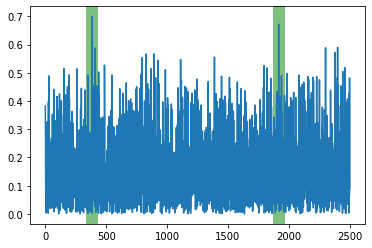

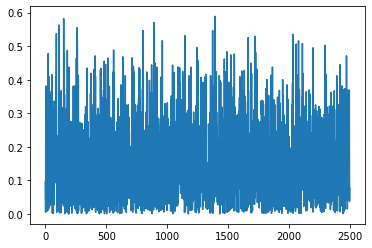

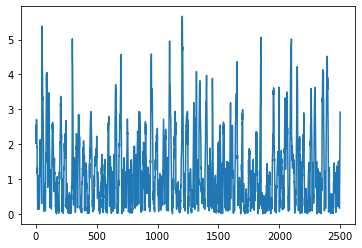

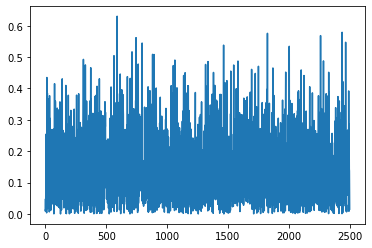

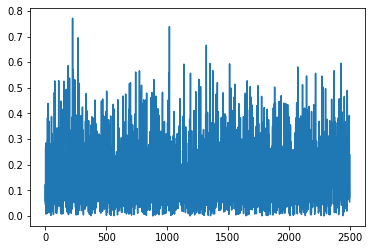

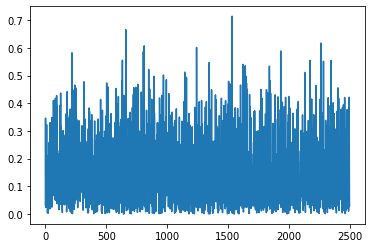

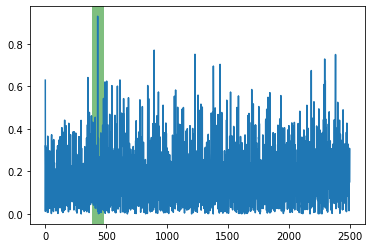

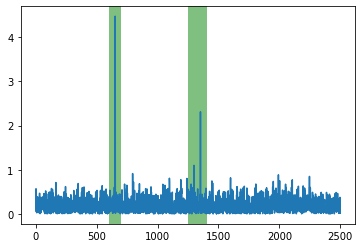

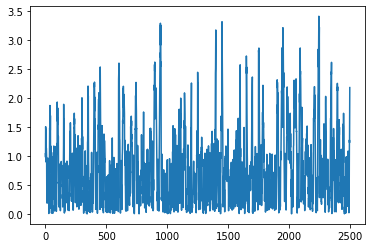

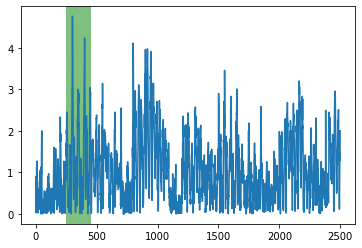

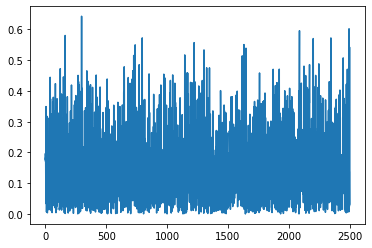

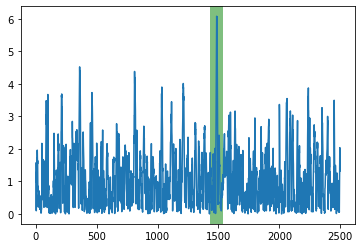

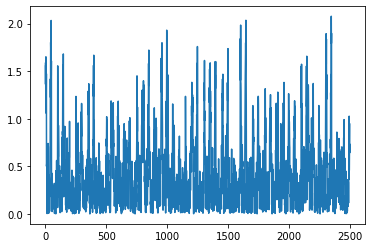

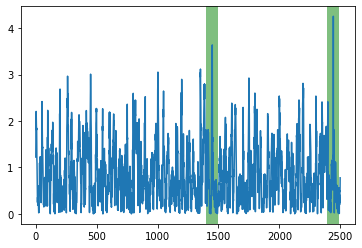

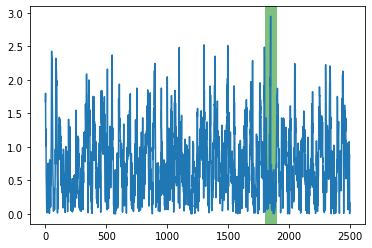

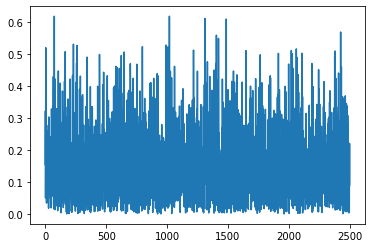

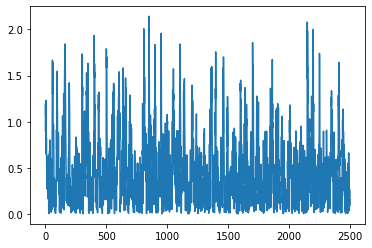

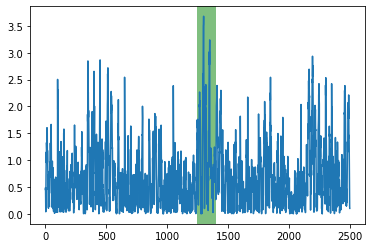

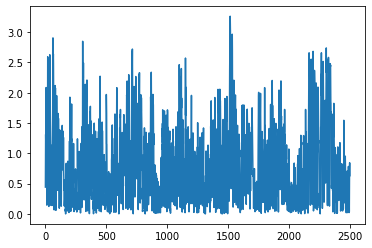

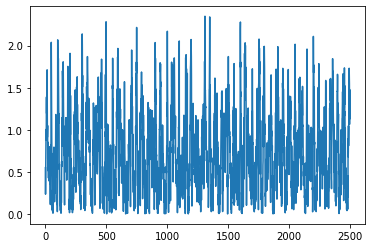

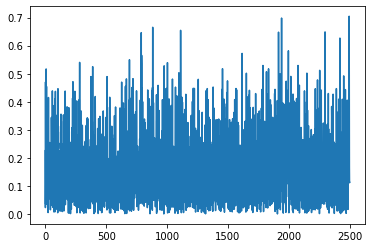

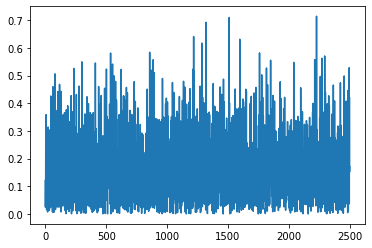

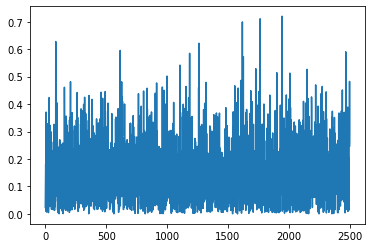

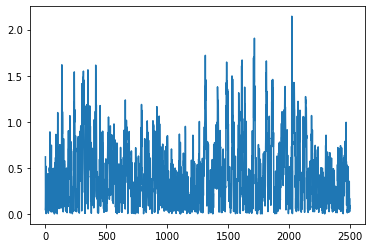

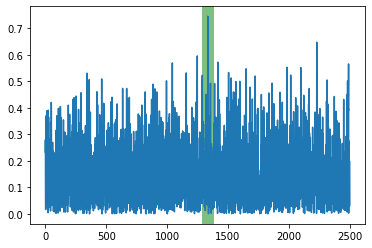

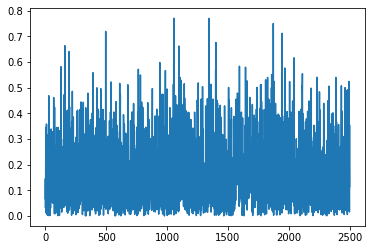

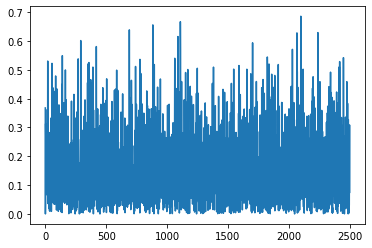

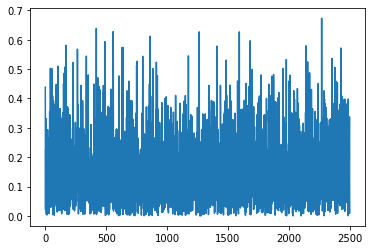

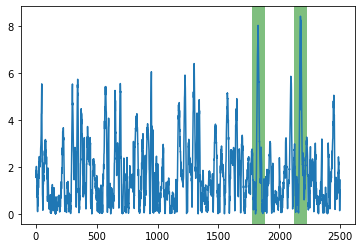

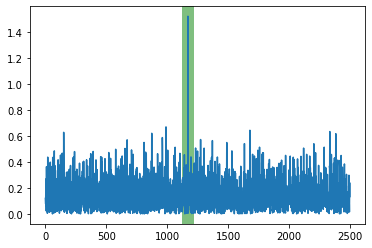

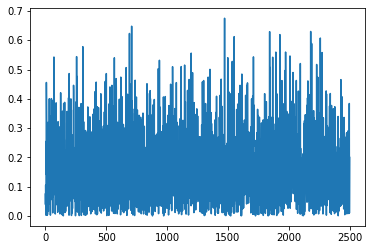

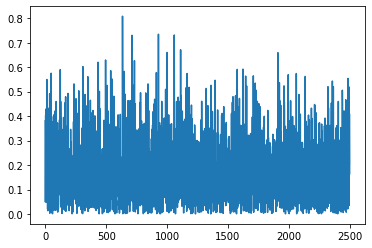

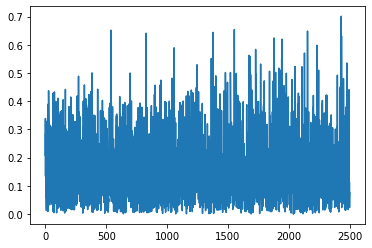

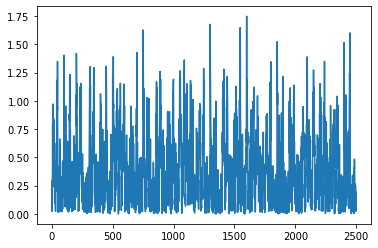

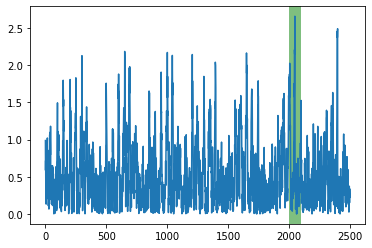

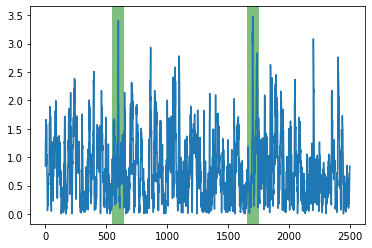

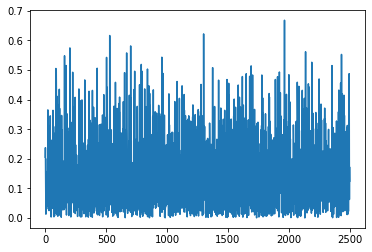

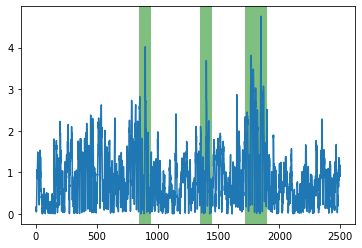

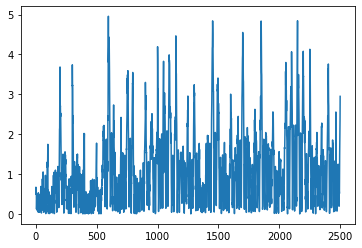

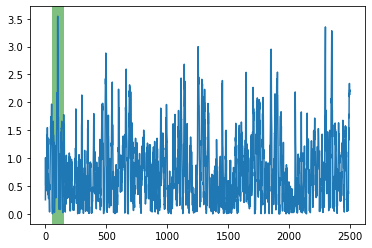

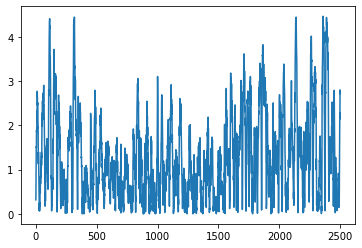

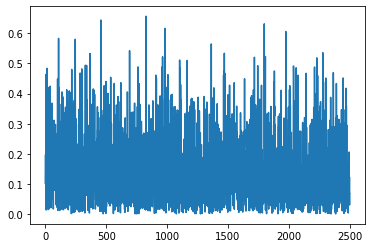

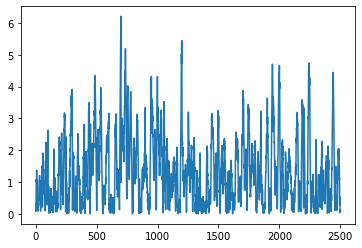

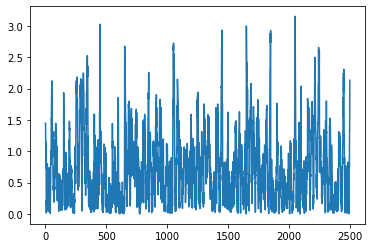

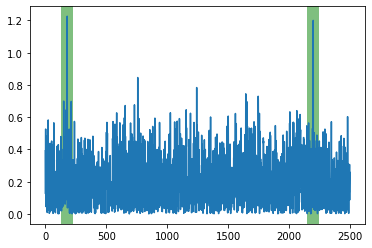

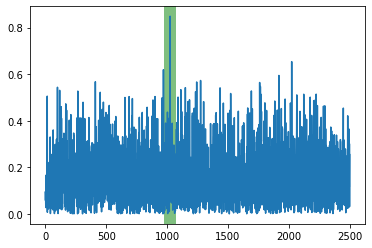

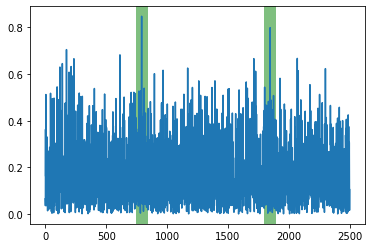

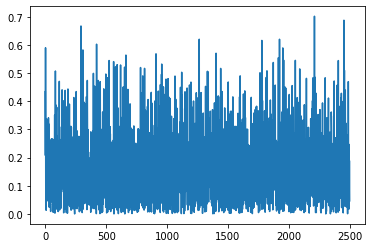

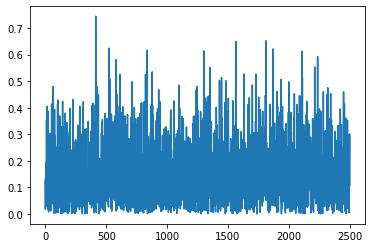

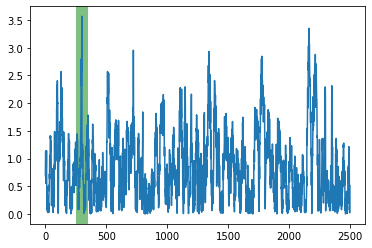

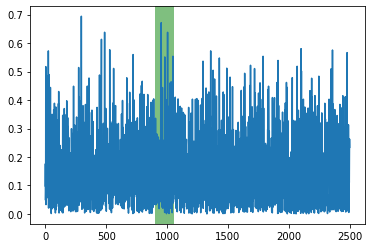

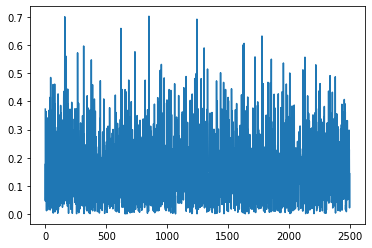

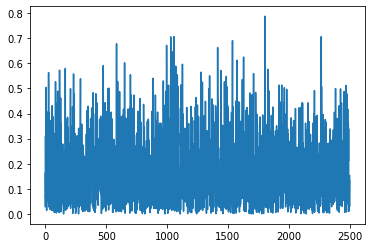

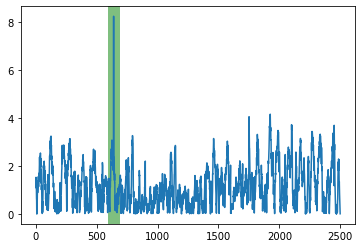

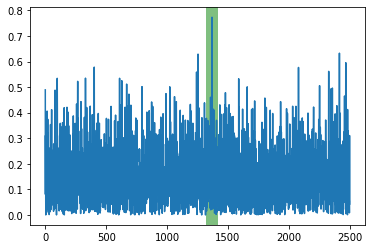

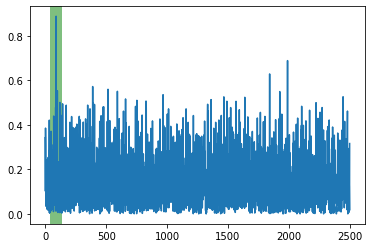

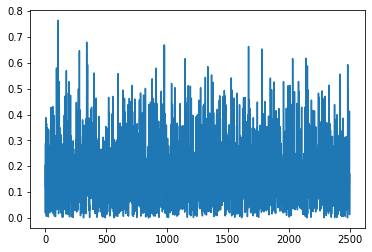

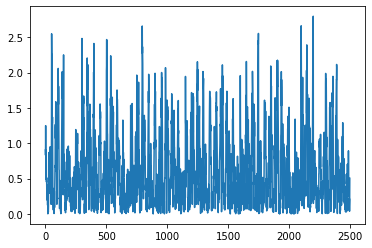

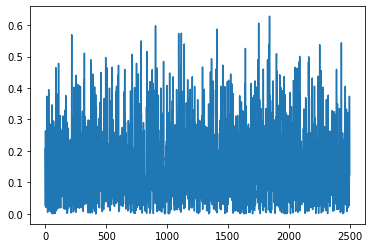

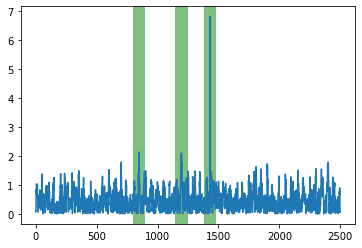

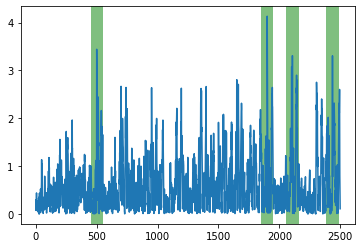

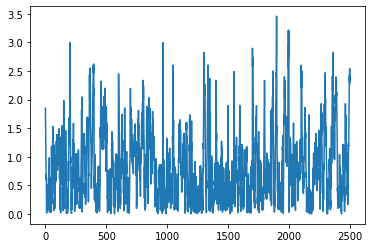

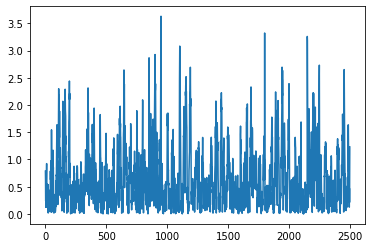

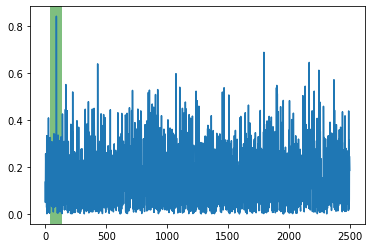

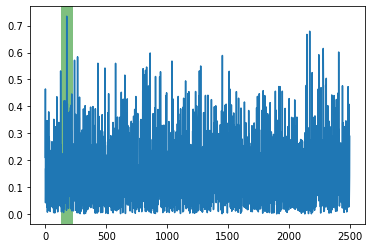

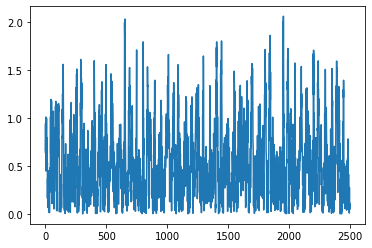

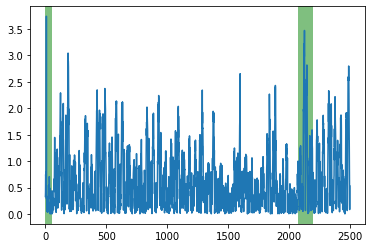

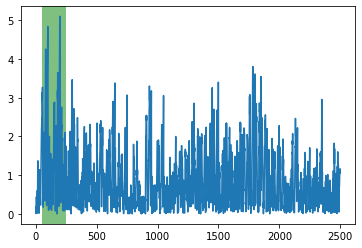

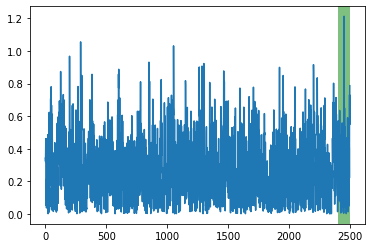

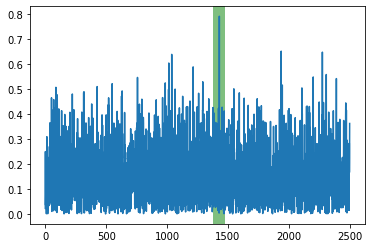

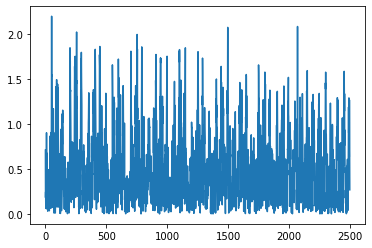

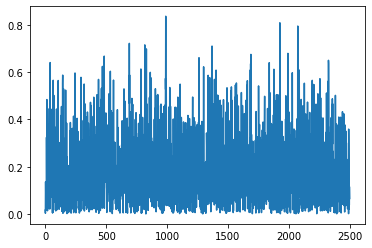

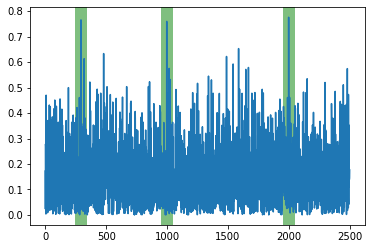

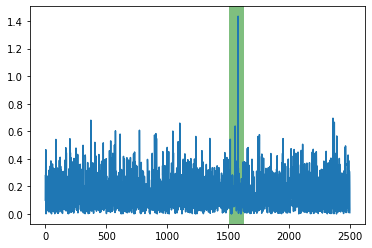

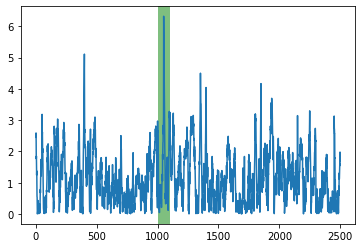

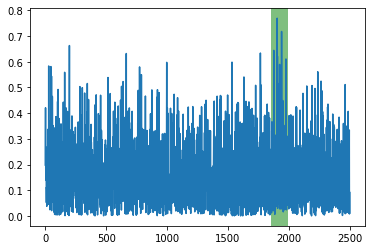

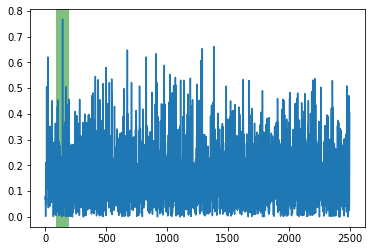

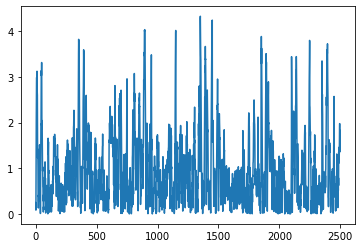

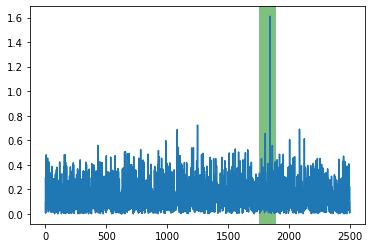

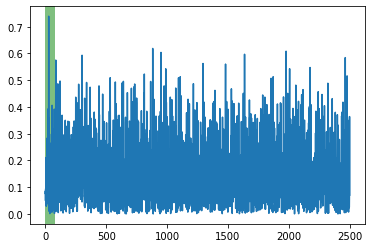

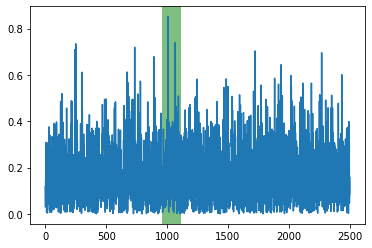

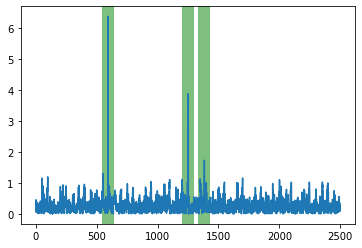

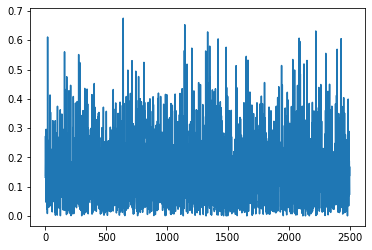

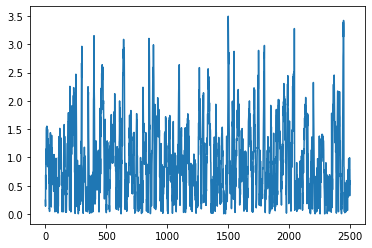

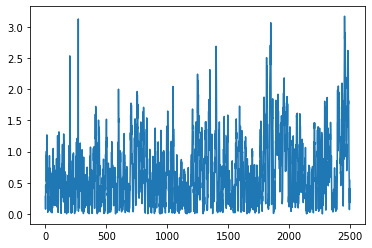

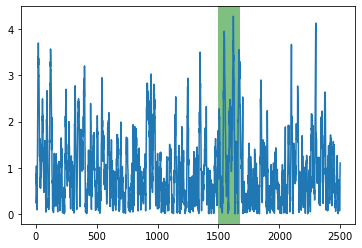

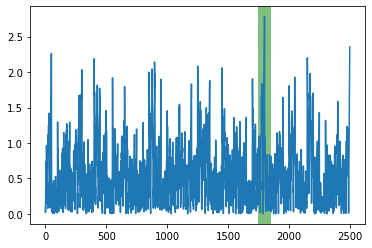

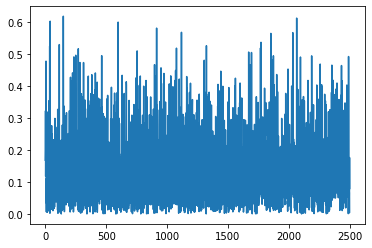

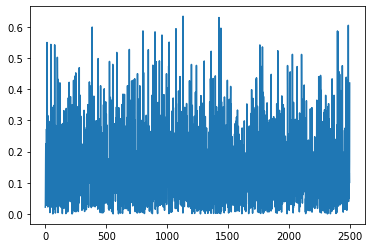

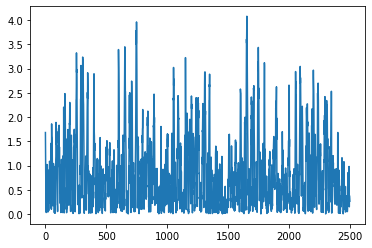

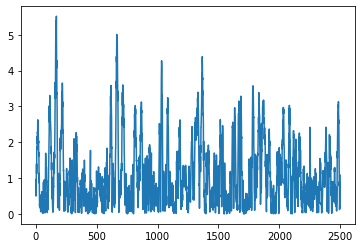

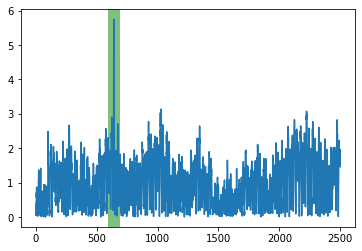

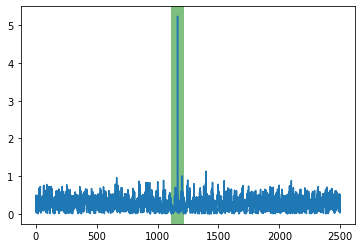

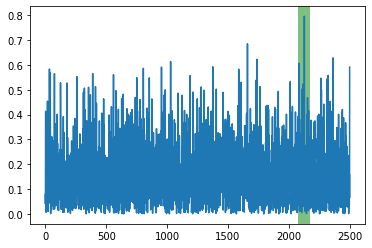

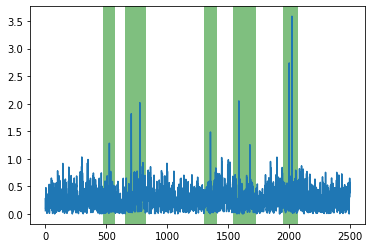

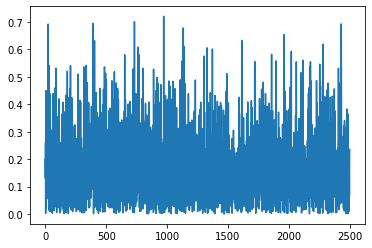

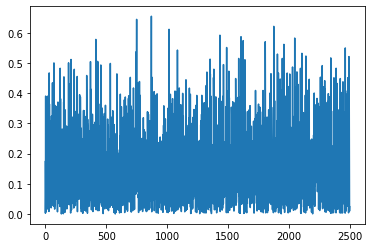

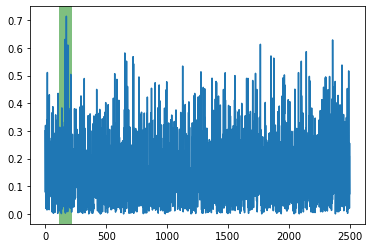

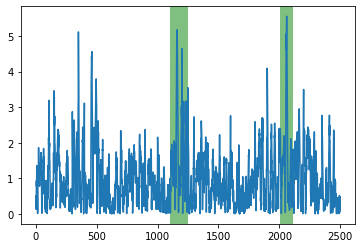

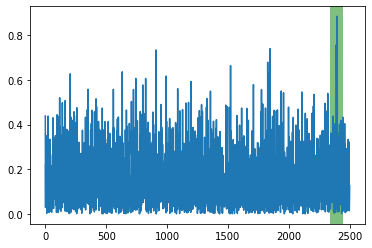

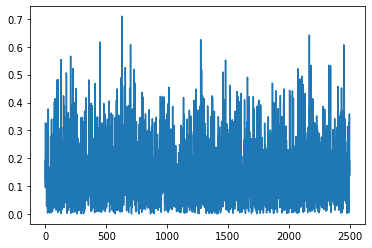

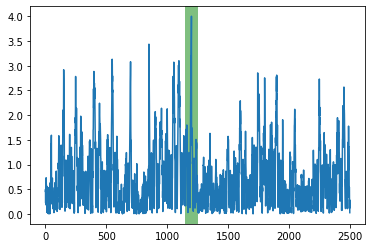

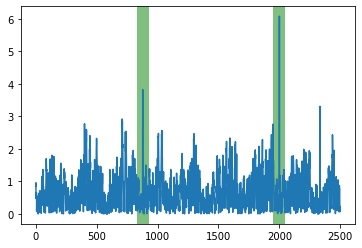

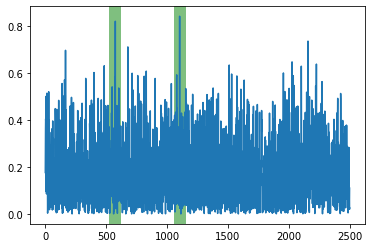

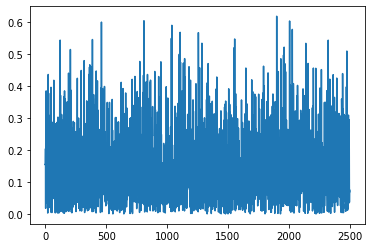

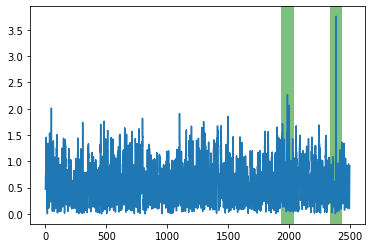

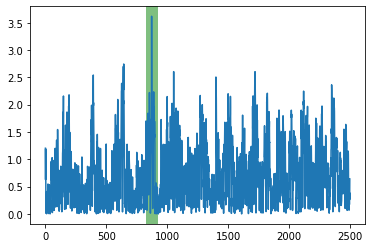

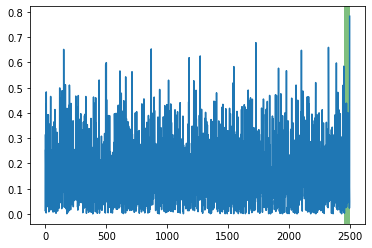

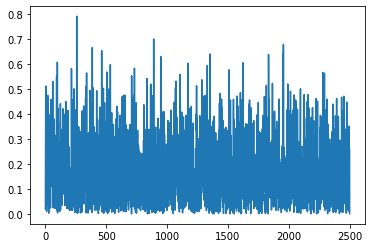

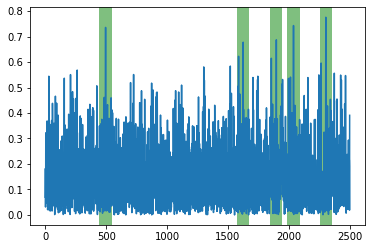

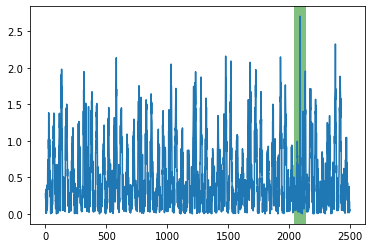

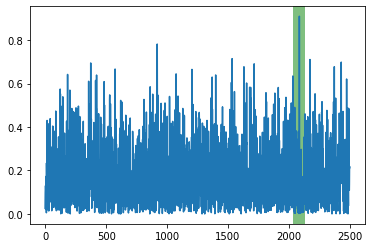

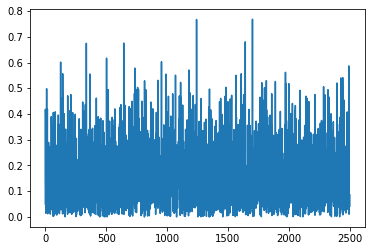

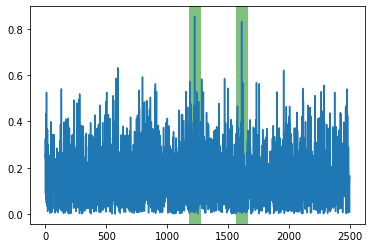

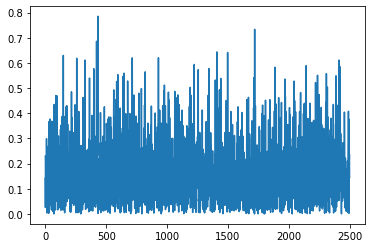

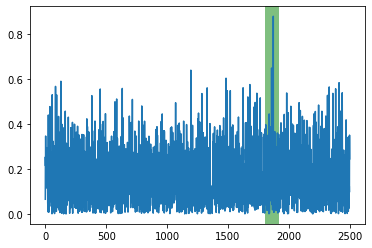

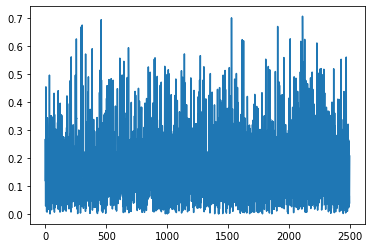

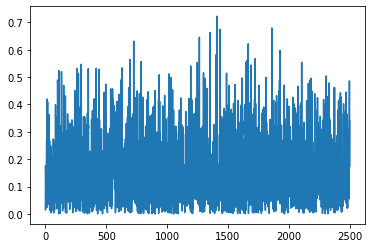

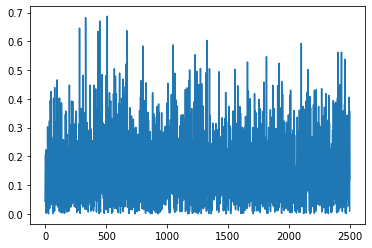

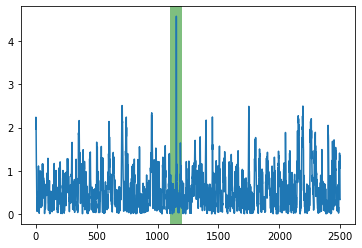

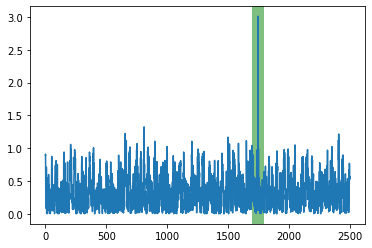

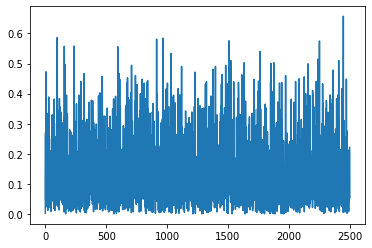

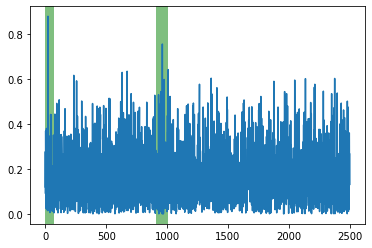

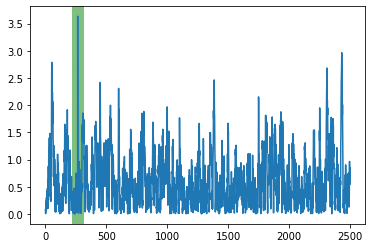

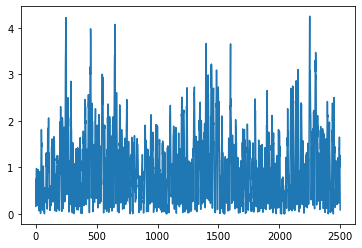

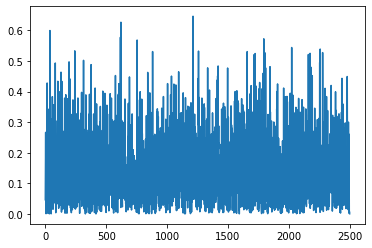

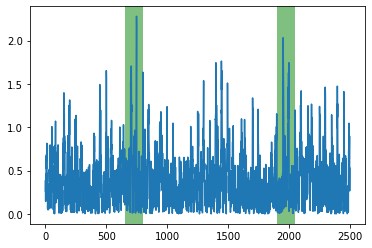

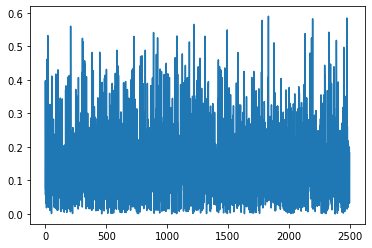

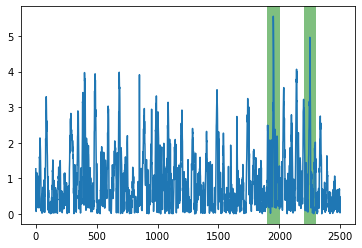

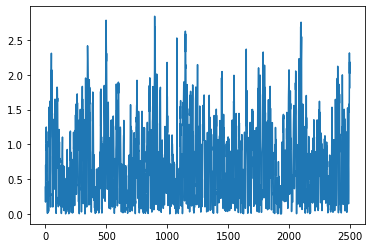

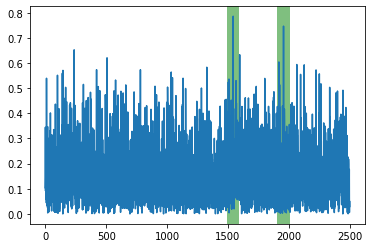

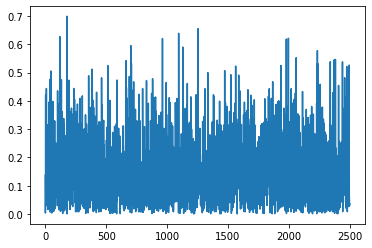

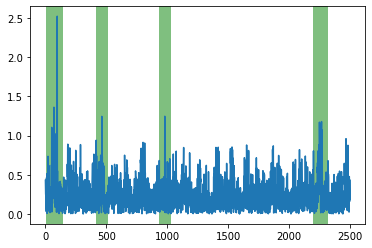

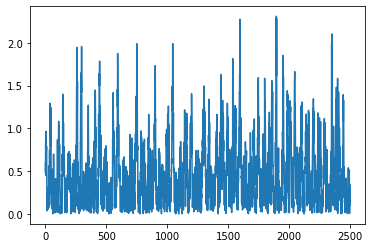

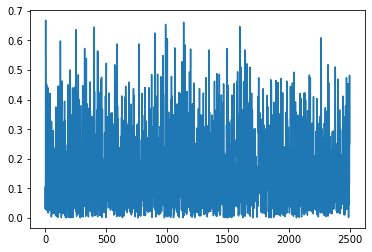

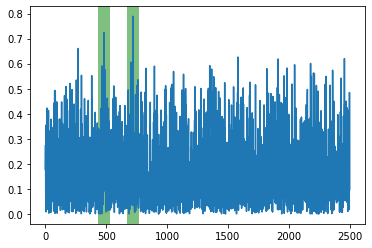

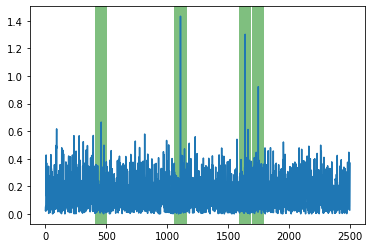

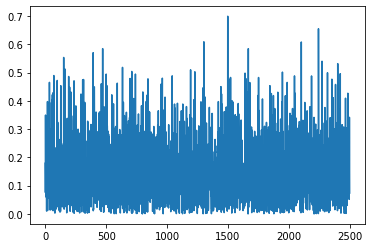

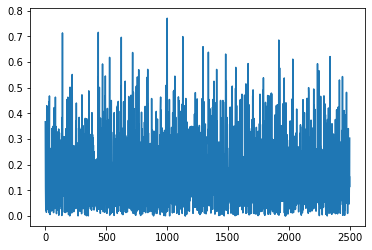

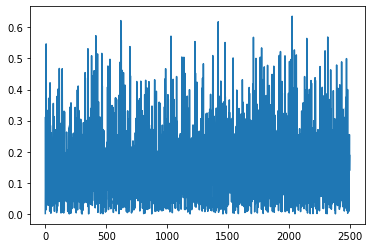

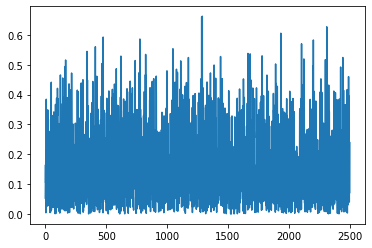

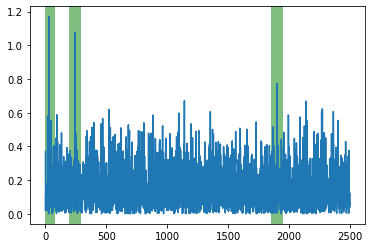

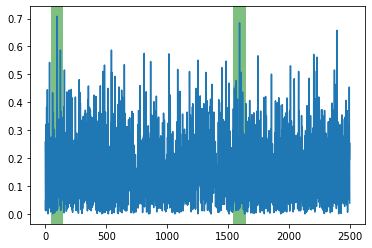

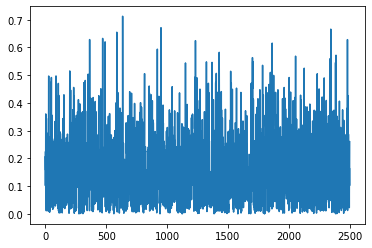

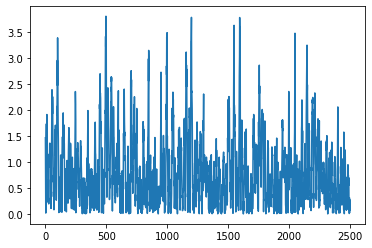

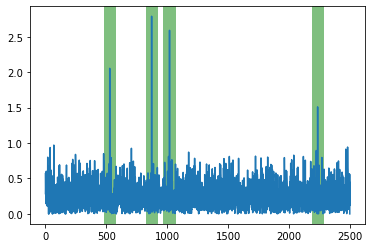

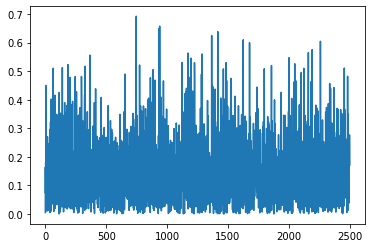

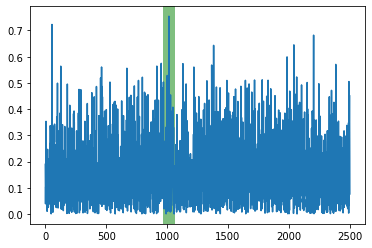

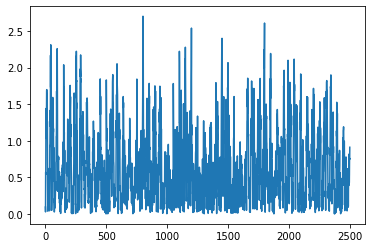

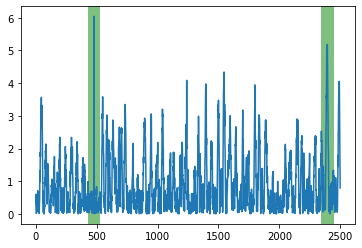

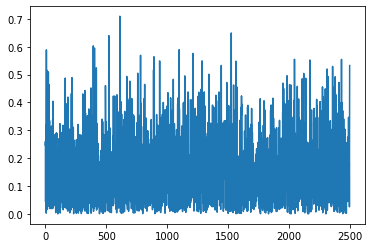

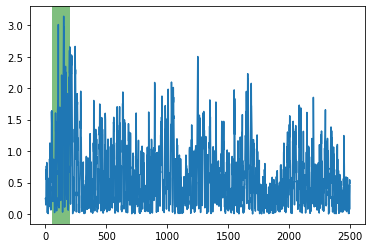

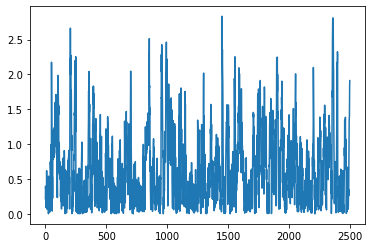

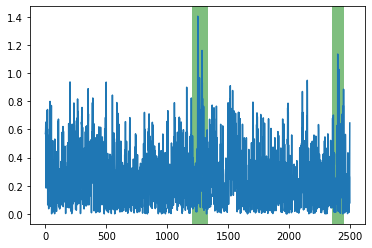

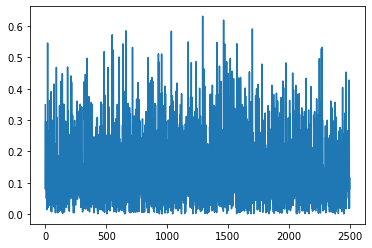

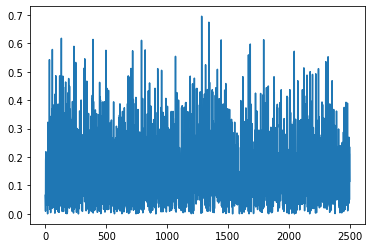

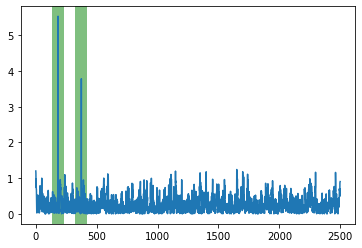

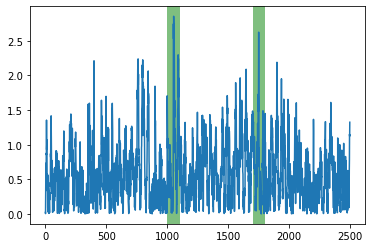

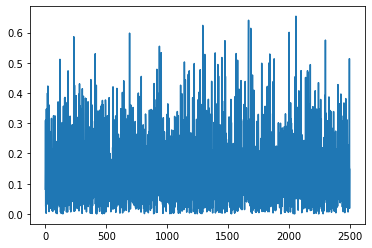

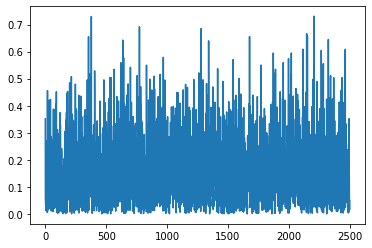

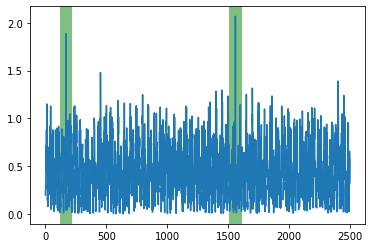

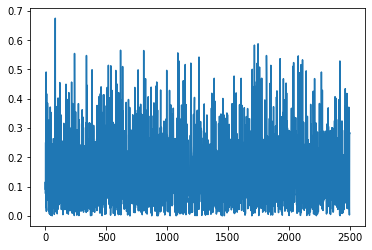

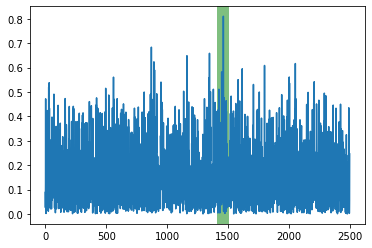

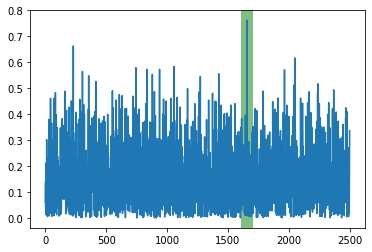

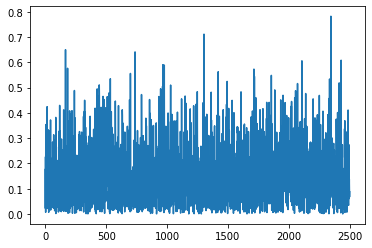

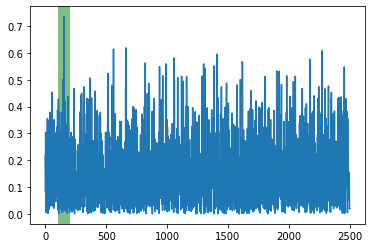

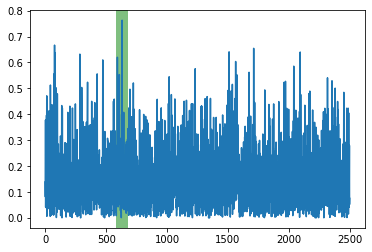

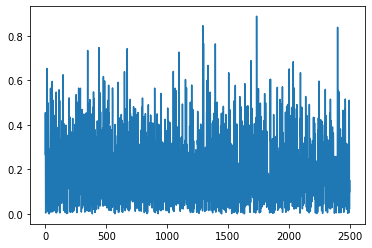

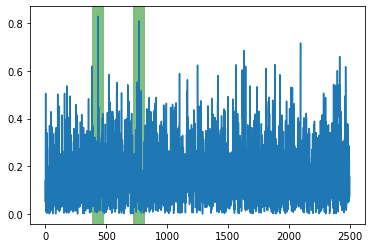

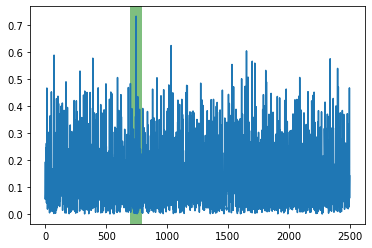

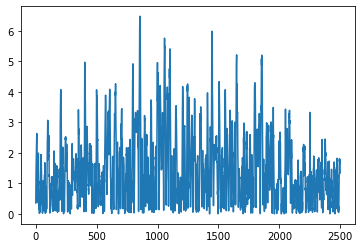

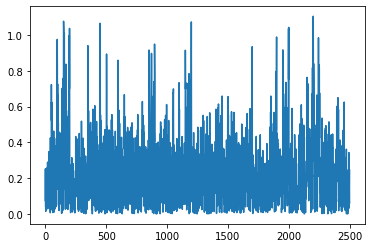

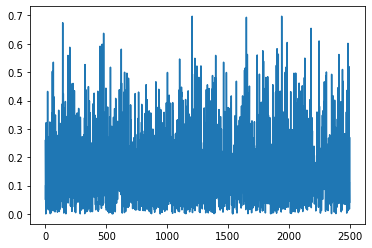

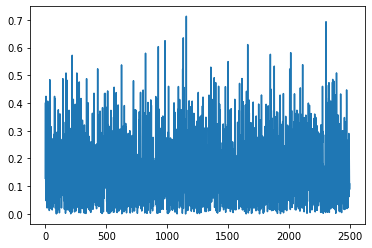

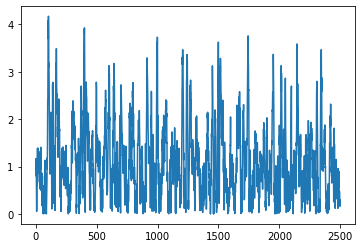

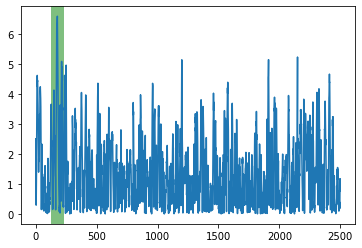

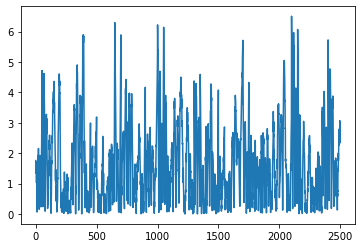

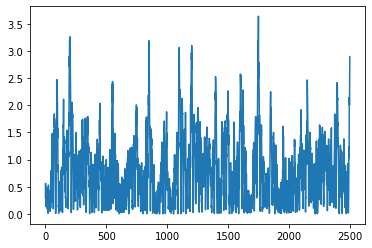

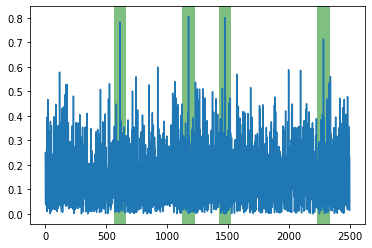

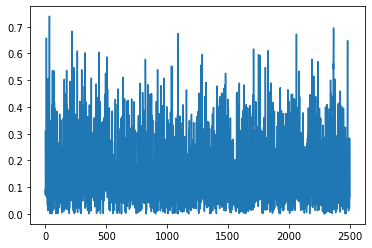

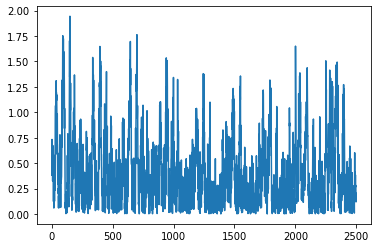

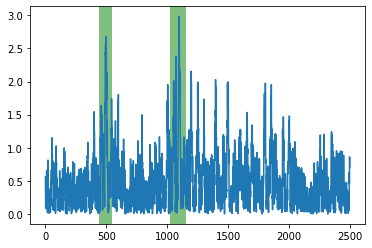

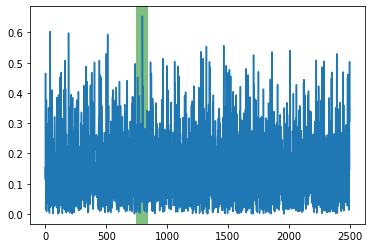

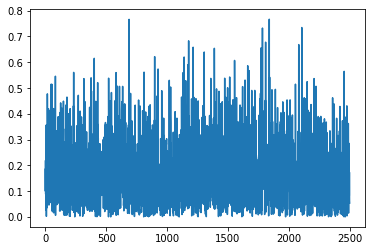

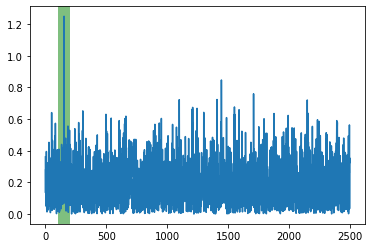

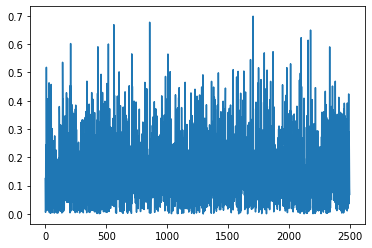

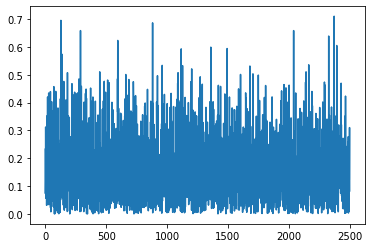

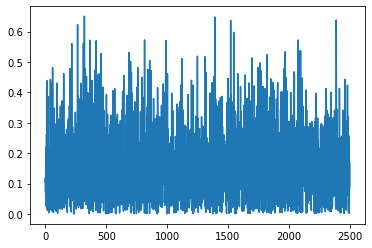

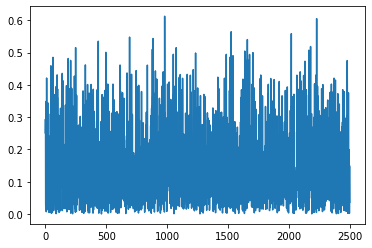

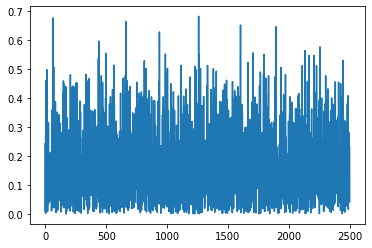

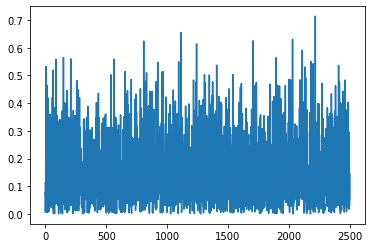

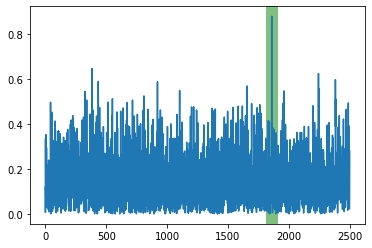

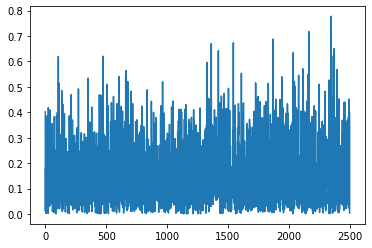

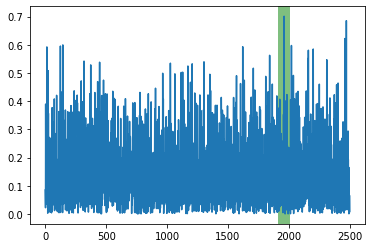

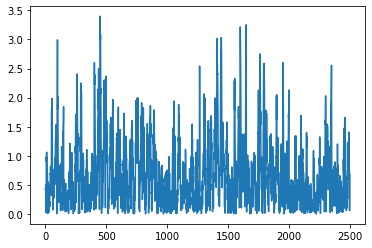

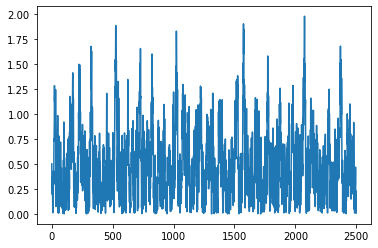

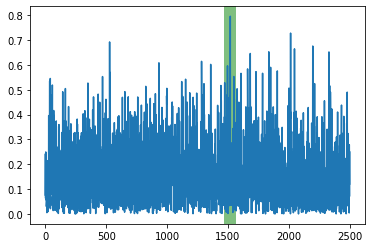

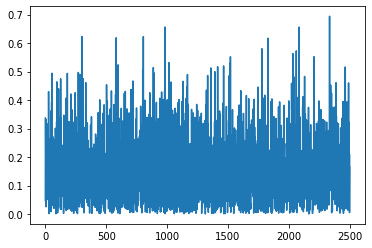

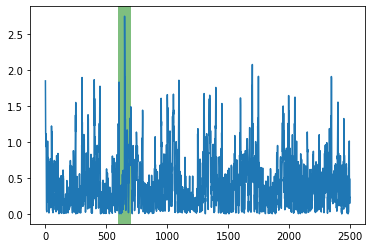

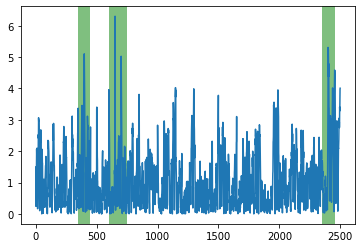

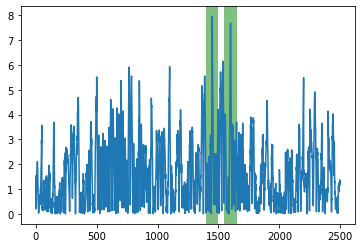

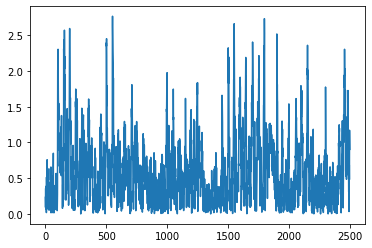

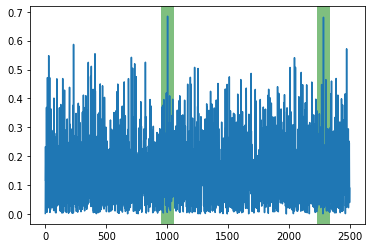

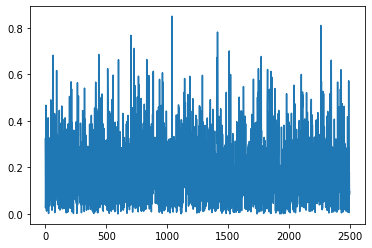

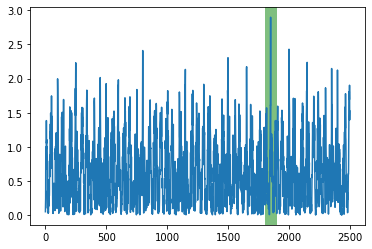

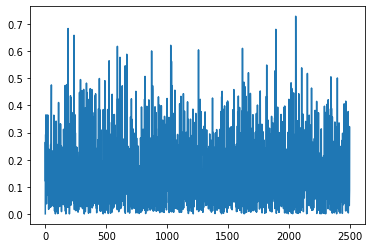

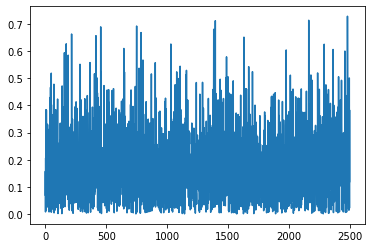

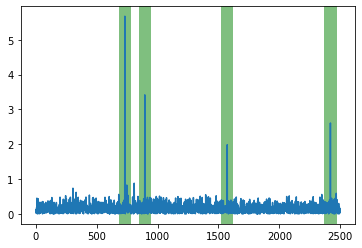

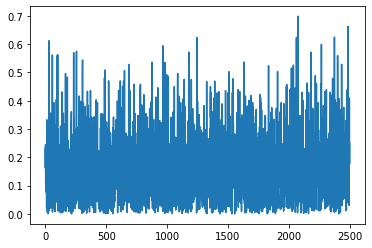

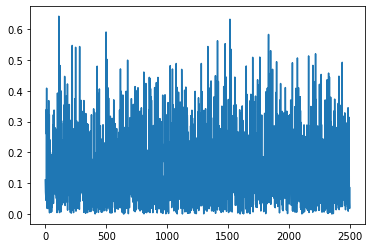

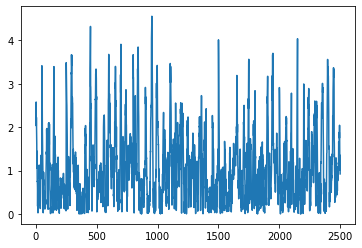

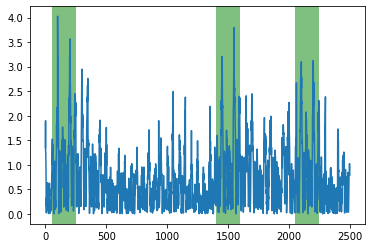

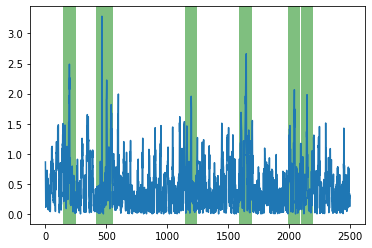

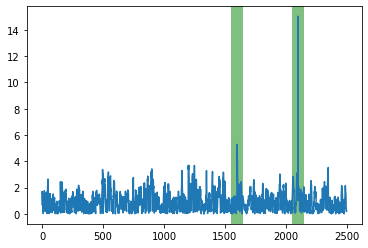

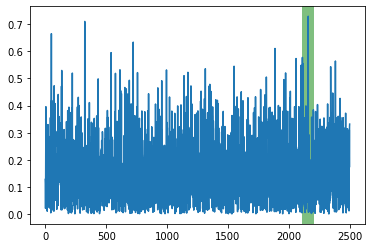

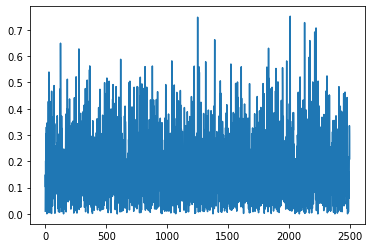

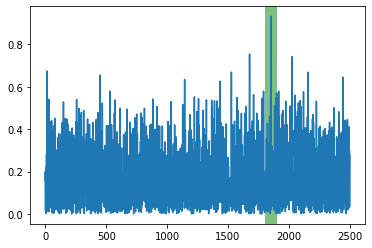

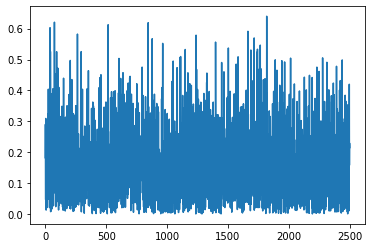

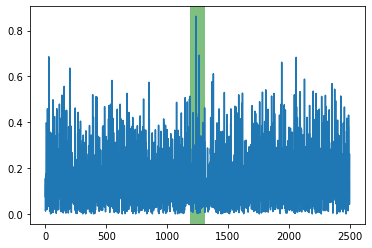

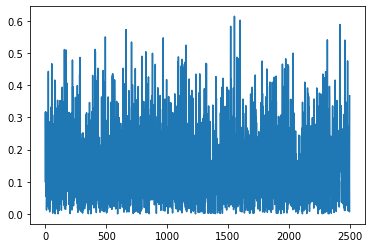

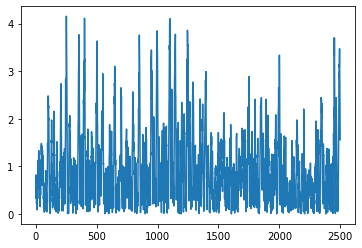

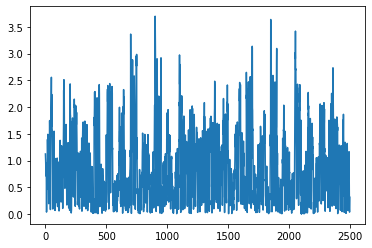

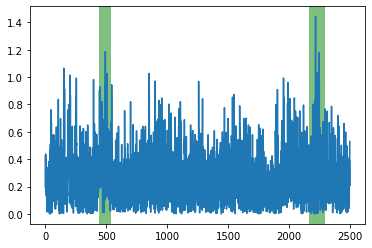

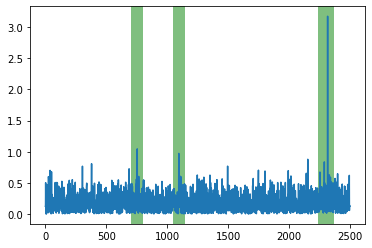

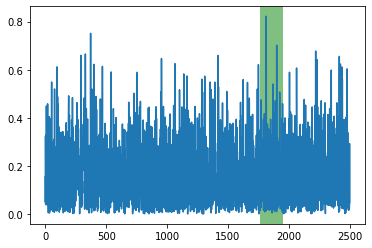

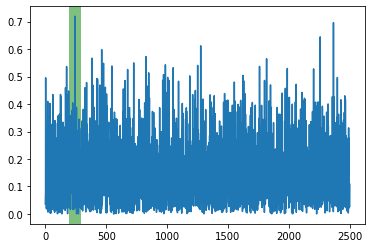

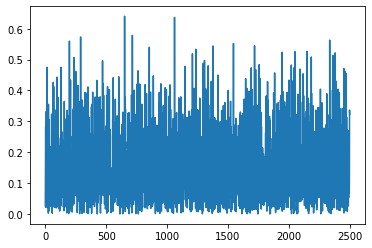

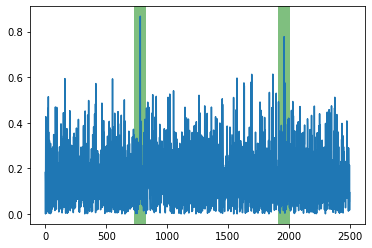

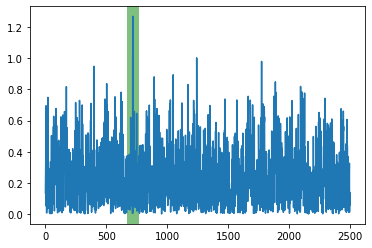

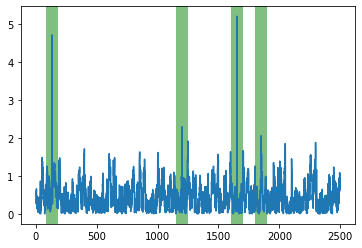

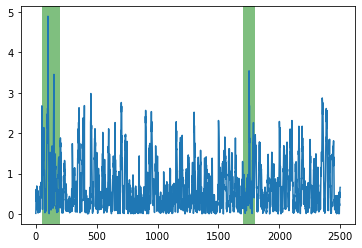

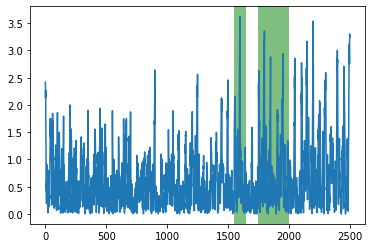

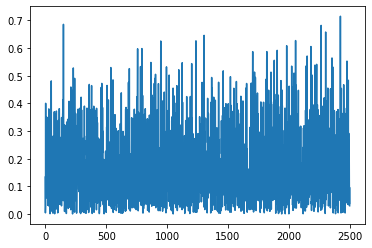

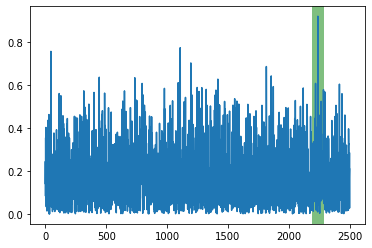

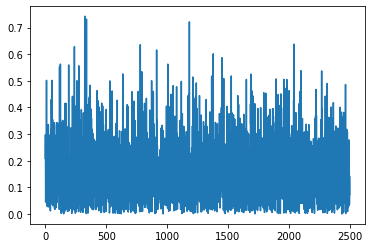

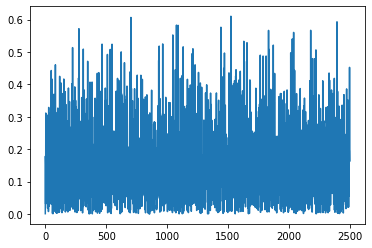

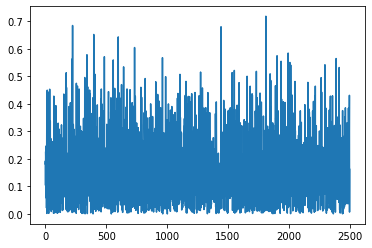

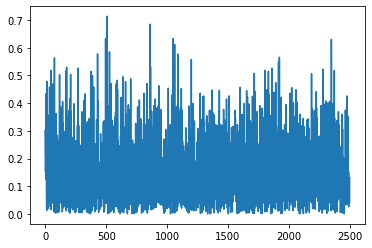

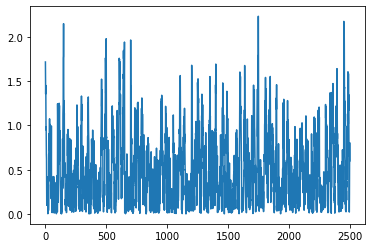

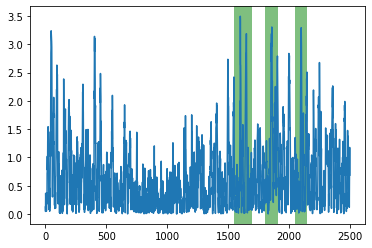

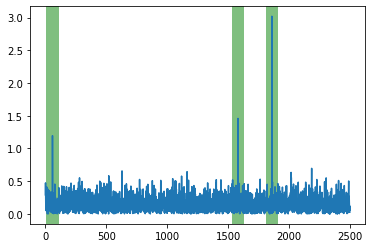

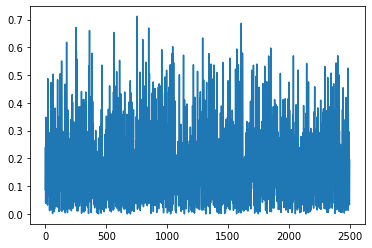

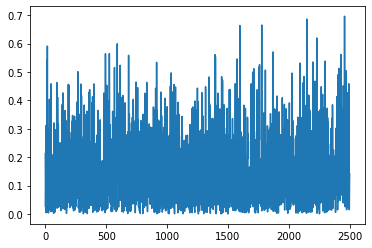

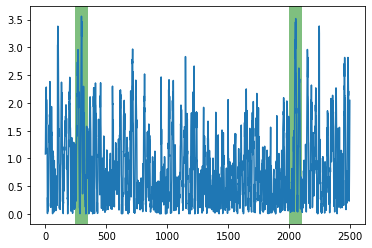

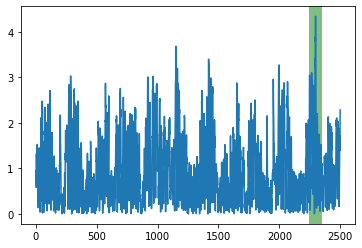

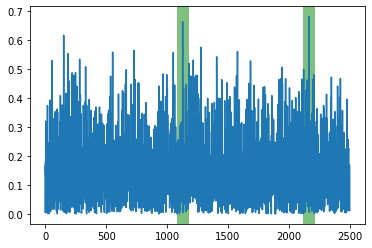

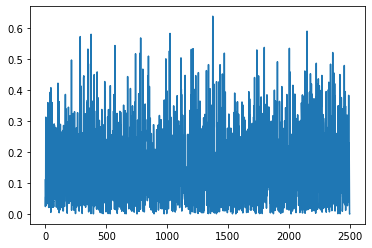

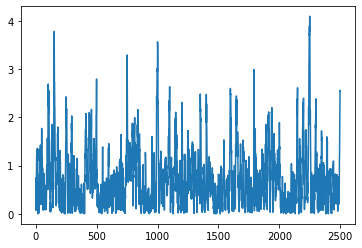

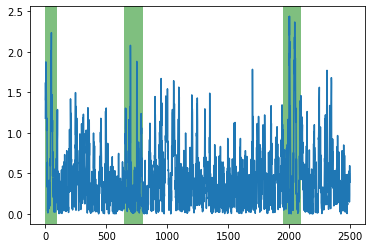

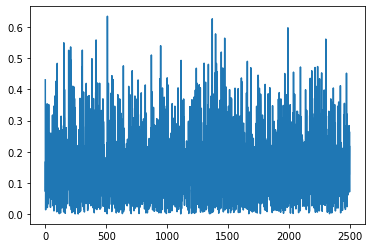

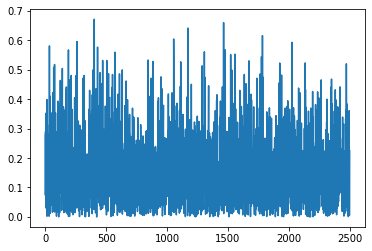

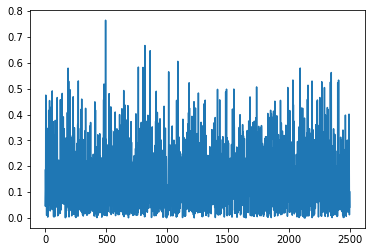

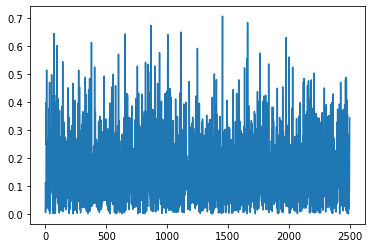

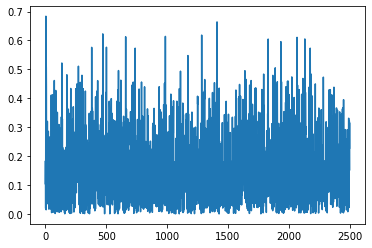

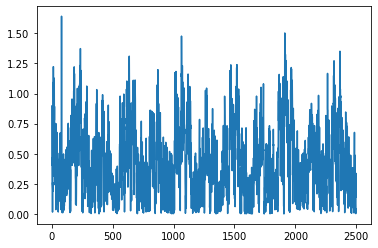

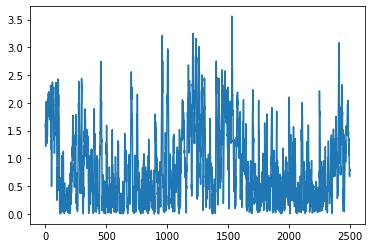

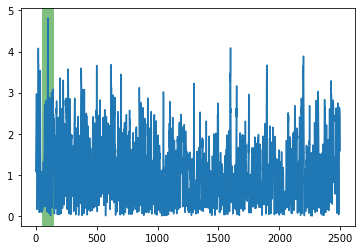

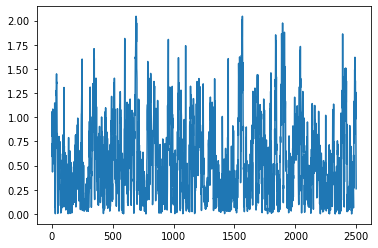

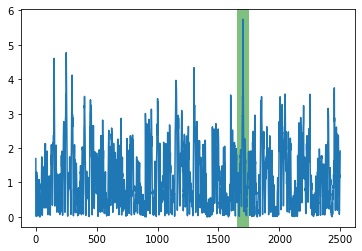

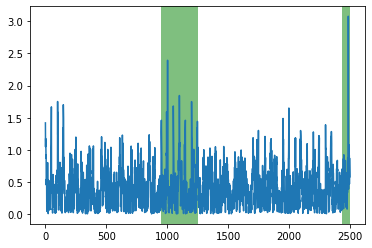

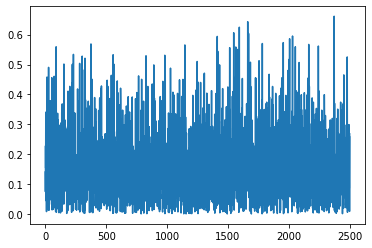

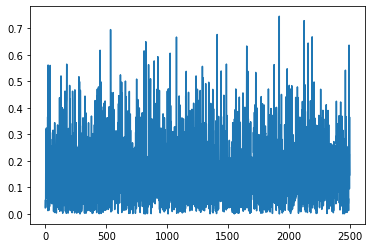

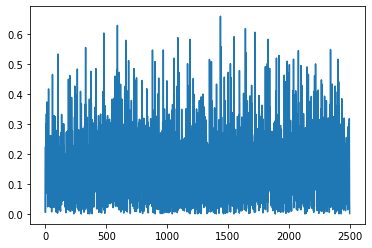

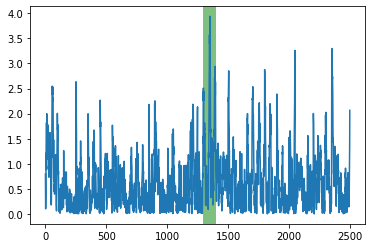

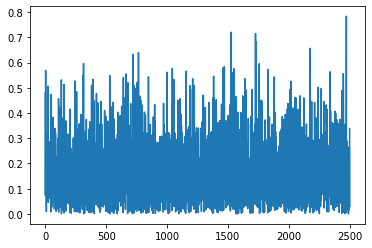

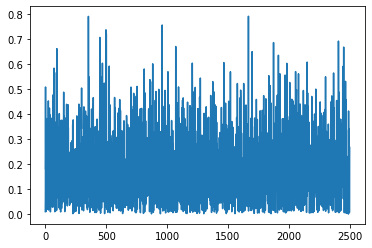

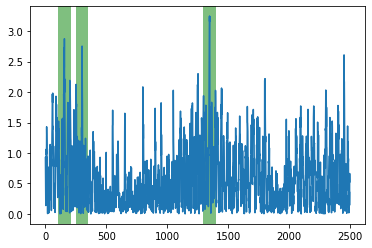

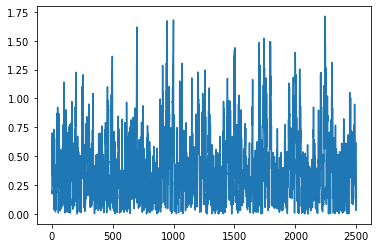

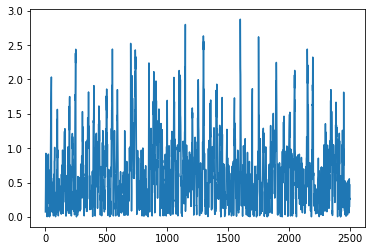

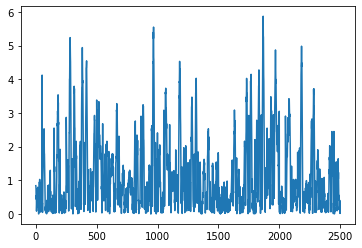

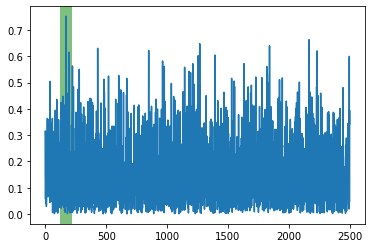

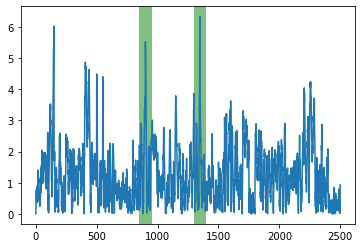

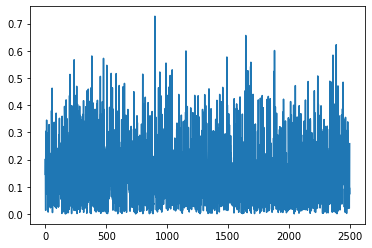

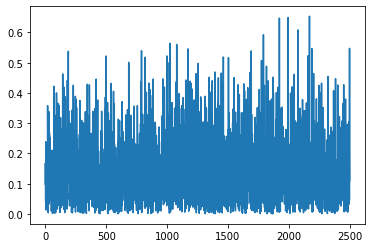

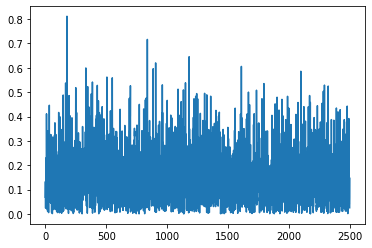

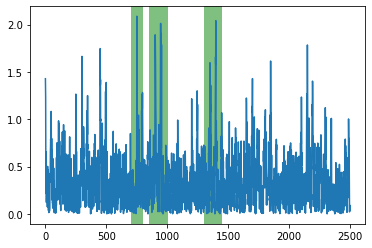

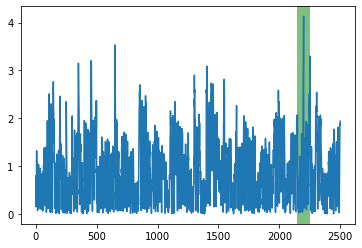

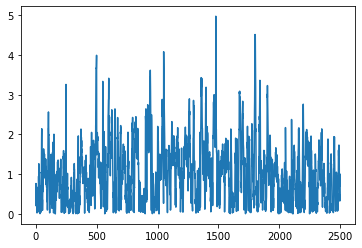

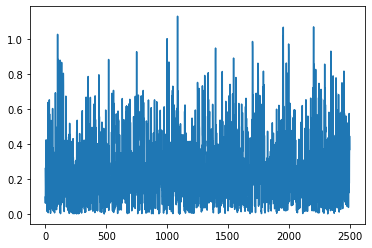

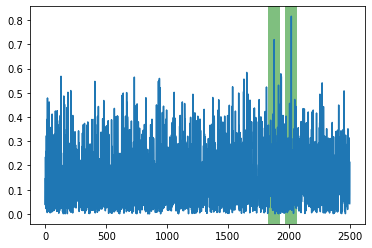

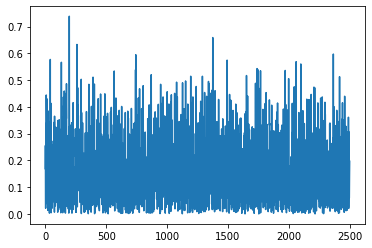

In [6]:

files = glob.glob('custom_data/**[0-9]_[0-9].csv')
datanames = [file.split('/')[1][:-4] for file in files]
score_dataframes = []
summary_dataframes = []

ranks = [None] + list(range(1,10))
datasets = {
    'custom': datanames
}

for rank in ranks:
    print(rank)
    pipelines = ['mssa']
    data = datasets
    for k, v in data.items():
        print(len(v))
    print(data)
    hyperparameters = make_hyperparams(data, rank)
    scores = benchmark(pipelines=pipelines, datasets=data, metrics=metrics, rank='f1', hyperparameters=hyperparameters, detrend=True)
    scores['rank'] = rank
    score_dataframes.append(scores)
    scores['confusion_matrix'] = [str(x) for x in scores['confusion_matrix']]
    
    score_summary = _summarize_results_datasets(scores, metrics)
    score_summary['rank'] = rank
    summary_dataframes.append(score_summary)


pd.concat(score_dataframes, ignore_index=True).to_pickle("mssa_synthetic_scores.pkl")
pd.concat(summary_dataframes, ignore_index=True).to_pickle("mssa_synthetic_summaries.pkl")

In [28]:
scores = pd.read_pickle('mssa_synthetic_scores.pkl')
summaries = pd.read_pickle('mssa_synthetic_summaries.pkl')

In [26]:
scores['category'] = scores.signal.str.split('_').str[1]
_summarize_results_datasets_category(scores)

dataset pipeline  category   fp   fn   tp        f1
0  custom     mssa  highrank  128  872   10  0.019608
1  custom     mssa   lowrank  138  666  198  0.330000

In [29]:
summaries

dataset pipeline   fp   fn   tp        f1  rank
0  custom     mssa  133  769  104  0.187387     2
1  custom     mssa  133  769  104  0.187387     2